In [ ]:
pip install notebook nsepy

In [3]:
# import require library
import pandas as pd
from pandas import read_csv
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from datetime import datetime
from pandas_datareader import data as pdr

#Web scraping of nse.
from datetime import date
from nsepy import get_history
import pickle

# Time searies library
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.graphics.tsaplots as tsa_plots

# ARIMA model 
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
import warnings
import itertools
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_predict

# KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Accuracy metrices
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
import math
# Visual 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# LSTM Model
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

from keras.callbacks import ModelCheckpoint
import itertools
from keras.layers import LSTM, GRU

# Fbprophet model
from prophet import Prophet

In [5]:
URL = 'https://www1.nseindia.com/content/indices/ind_niftyenergylist.csv'
df = pd.read_csv(URL, index_col = 'Company Name')

#web scraping of Adanigreen
symbol = "ADANIGREEN"
start = date(2018, 7, 2)
end = date(2023, 3, 2)
adanigreen = get_history(symbol=symbol, start=start, end=end)

#web scraping of ADANITRANS
symbol = "ADANITRANS"
start = date(2018, 7, 2)
end = date(2023, 3, 2)
adanitrans = get_history(symbol=symbol, start=start, end=end)

#web scraping of RELIANCE
symbol = "RELIANCE"
start = date(2018, 7, 2)
end = date(2023, 3, 2)
reliance = get_history(symbol=symbol, start=start, end=end)

In [6]:
adanitrans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 2018-07-02 to 2023-03-02
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              973 non-null    object 
 1   Series              973 non-null    object 
 2   Prev Close          973 non-null    float64
 3   Open                973 non-null    float64
 4   High                973 non-null    float64
 5   Low                 973 non-null    float64
 6   Last                973 non-null    float64
 7   Close               973 non-null    float64
 8   VWAP                973 non-null    float64
 9   Volume              973 non-null    object 
 10  Turnover            973 non-null    float64
 11  Trades              973 non-null    object 
 12  Deliverable Volume  973 non-null    object 
 13  %Deliverble         973 non-null    float64
dtypes: float64(9), object(5)
memory usage: 114.0+ KB


In [7]:
adanitrans["Volume"]=pd.to_numeric(adanitrans["Volume"])
adanitrans["Trades"]=pd.to_numeric(adanitrans["Trades"])
adanitrans["Deliverable Volume"]=pd.to_numeric(adanitrans["Deliverable Volume"])

In [8]:
adanitrans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 2018-07-02 to 2023-03-02
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              973 non-null    object 
 1   Series              973 non-null    object 
 2   Prev Close          973 non-null    float64
 3   Open                973 non-null    float64
 4   High                973 non-null    float64
 5   Low                 973 non-null    float64
 6   Last                973 non-null    float64
 7   Close               973 non-null    float64
 8   VWAP                973 non-null    float64
 9   Volume              973 non-null    int64  
 10  Turnover            973 non-null    float64
 11  Trades              973 non-null    int64  
 12  Deliverable Volume  973 non-null    int64  
 13  %Deliverble         973 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 114.0+ KB


In [9]:
company_name = ["ADANIGREEN", "ADANITRANS", "RELIANCE"]

In [10]:
company_list = [adanigreen,adanitrans,reliance]

In [11]:
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

In [12]:
#combine data of reliance, adanigreen and adanitrans
stock = pd.concat(company_list, axis=0)
stock.head(10)

Symbol Series  Prev Close   Open   High    Low   Last  Close  \
Date                                                                           
2018-07-02  ADANIGREEN     EQ       26.80  27.20  27.25  22.80  25.40  25.20   
2018-07-03  ADANIGREEN     EQ       25.20  26.95  26.95  24.50  26.60  26.35   
2018-07-04  ADANIGREEN     EQ       26.35  26.00  29.95  25.80  29.80  29.60   
2018-07-05  ADANIGREEN     EQ       29.60  29.80  31.95  28.60  29.75  29.80   
2018-07-06  ADANIGREEN     EQ       29.80  29.00  30.90  28.85  30.45  30.35   
2018-07-09  ADANIGREEN     EQ       30.35  30.45  31.40  29.55  30.65  30.95   
2018-07-10  ADANIGREEN     EQ       30.95  30.55  31.85  30.25  31.00  31.10   
2018-07-11  ADANIGREEN     EQ       31.10  31.05  33.40  30.60  31.85  31.95   
2018-07-12  ADANIGREEN     EQ       31.95  31.80  32.90  30.95  31.15  31.10   
2018-07-13  ADANIGREEN     EQ       31.10  32.50  32.70  31.20  31.30  31.45   

             VWAP   Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                   
2018-07-02  24.94  1369795  3.415722e+12    5274             1032401   
2018-07-03  25.82   519628  1.341658e+12    3205              419282   
2018-07-04  28.10  1033451  2.903786e+12    6363              592525   
2018-07-05  30.54  1546192  4.722083e+12    6516              942016   
2018-07-06  30.32   523472  1.587208e+12    3042              308139   
2018-07-09  30.90   616718  1.905792e+12    5106              432788   
2018-07-10  31.14   492511  1.533872e+12    5831              305333   
2018-07-11  32.32  1610144  5.203362e+12   12255              722659   
2018-07-12  31.99   524503  1.678036e+12    4423              277788   
2018-07-13  31.65   770830  2.439914e+12    8032              305997   

            %Deliverble company_name  
Date                                  
2018-07-02       0.7537   ADANIGREEN  
2018-07-03       0.8069   ADANIGREEN  
2018-07-04       0.5733   ADANIGREEN  
2018-07-05       0.6092   ADANIGREEN  
2018-07-06       0.5886   ADANIGREEN  
2018-07-09       0.7018   ADANIGREEN  
2018-07-10       0.6200   ADANIGREEN  
2018-07-11       0.4488   ADANIGREEN  
2018-07-12       0.5296   ADANIGREEN  
2018-07-13       0.3970   ADANIGREEN

In [13]:
# Statistical description
stock.describe().T

count          mean           std           min  \
Prev Close          3224.0  1.253227e+03  9.691040e+02  2.520000e+01   
Open                3224.0  1.255934e+03  9.713522e+02  2.600000e+01   
High                3224.0  1.276499e+03  9.859386e+02  2.695000e+01   
Low                 3224.0  1.232579e+03  9.535075e+02  2.280000e+01   
Last                3224.0  1.253900e+03  9.689695e+02  2.540000e+01   
Close               3224.0  1.253900e+03  9.689274e+02  2.520000e+01   
VWAP                3224.0  1.255024e+03  9.696758e+02  2.494000e+01   
Volume              3224.0  4.334541e+06  6.444470e+06  2.524200e+04   
Turnover            3224.0  7.208382e+14  1.183655e+15  2.709464e+11   
Trades              3224.0  1.111128e+05  1.472113e+05  3.070000e+02   
Deliverable Volume  3224.0  1.748910e+06  2.445970e+06  7.271000e+03   
%Deliverble         3224.0  4.583334e-01  1.560694e-01  6.500000e-02   

                             25%           50%           75%           max  
Prev Close          2.332750e+02  1.206250e+03  2.103925e+03  4.105400e+03  
Open                2.340750e+02  1.211500e+03  2.110400e+03  4.165000e+03  
High                2.389500e+02  1.230000e+03  2.134450e+03  4.236750e+03  
Low                 2.295500e+02  1.191875e+03  2.077250e+03  3.991100e+03  
Last                2.331500e+02  1.209800e+03  2.104613e+03  4.135000e+03  
Close               2.335875e+02  1.206475e+03  2.104525e+03  4.105400e+03  
VWAP                2.341800e+02  1.207605e+03  2.107540e+03  4.105570e+03  
Volume              4.400188e+05  1.279365e+06  6.394213e+06  6.523089e+07  
Turnover            1.188181e+13  1.350672e+14  1.120102e+15  1.473434e+16  
Trades              9.140250e+03  3.750150e+04  1.857745e+05  1.428490e+06  
Deliverable Volume  1.957100e+05  5.475490e+05  2.736953e+06  3.920848e+07  
%Deliverble         3.507000e-01  4.544000e-01  5.557500e-01  1.000000e+00

In [14]:
# Check for duplicates
stock.duplicated().value_counts()

False    3224
dtype: int64

In [15]:
# Information about variables/ features
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3224 entries, 2018-07-02 to 2023-03-02
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              3224 non-null   object 
 1   Series              3224 non-null   object 
 2   Prev Close          3224 non-null   float64
 3   Open                3224 non-null   float64
 4   High                3224 non-null   float64
 5   Low                 3224 non-null   float64
 6   Last                3224 non-null   float64
 7   Close               3224 non-null   float64
 8   VWAP                3224 non-null   float64
 9   Volume              3224 non-null   int64  
 10  Turnover            3224 non-null   float64
 11  Trades              3224 non-null   int64  
 12  Deliverable Volume  3224 non-null   int64  
 13  %Deliverble         3224 non-null   float64
 14  company_name        3224 non-null   object 
dtypes: float64(9), int64(3), object(3)
memory usa

In [16]:
#check for null values
stock.isnull().sum() # number of null values

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
company_name          0
dtype: int64

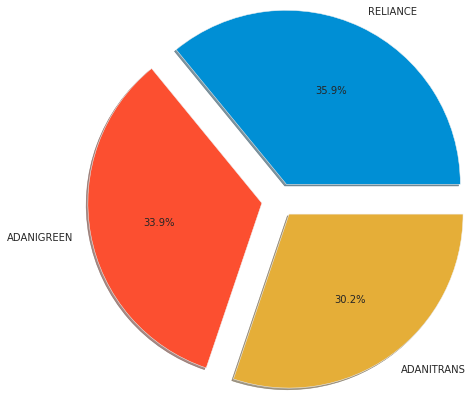

In [17]:
# count of company data 
explode=[0.2,0.2,0.2]
stock["Symbol"].value_counts().plot(kind="pie",autopct='%1.1f%%',shadow=True,explode=explode, radius=2)
plt.savefig('pie.png')
plt.show()

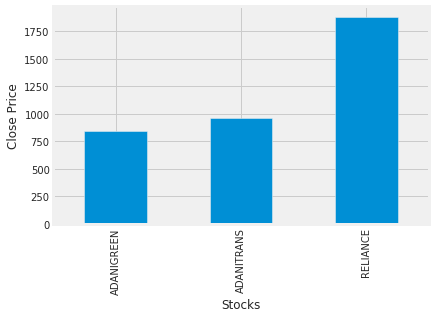

In [18]:
# Average Close price
stock.groupby(by="Symbol")["Close"].mean().plot(kind="bar")
plt.xlabel("Stocks")
plt.ylabel("Close Price")
plt.show()

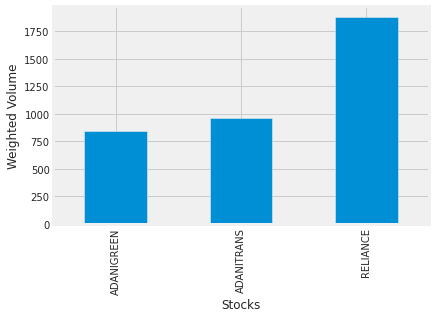

In [19]:
# Average weighted volumn
stock.groupby(by="Symbol")["VWAP"].mean().plot(kind="bar")
plt.xlabel("Stocks")
plt.ylabel("Weighted Volume")
plt.show()

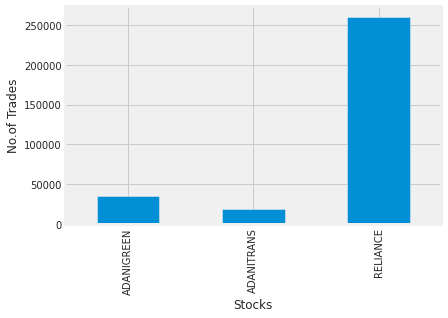

In [20]:
# Average Number of traders
stock.groupby(by="Symbol")["Trades"].mean().plot(kind="bar")
plt.xlabel("Stocks")
plt.ylabel("No.of Trades")
plt.show()

In [21]:
# reset the index 
reliance_1=reliance.reset_index()
adanigreen_1=adanigreen.reset_index()
adanitrans_1=adanitrans.reset_index()

company_name = ["ADANIGREEN", "ADANITRANS", "RELIANCE"]
company_list_1 = [adanigreen_1,adanitrans_1,reliance_1]

for company, com_name in zip(company_list_1, company_name):
    company["company_name"] = com_name

stock_1 = pd.concat(company_list_1, axis=0)
stock_1.head(10)

Date      Symbol Series  Prev Close   Open   High    Low   Last  \
0  2018-07-02  ADANIGREEN     EQ       26.80  27.20  27.25  22.80  25.40   
1  2018-07-03  ADANIGREEN     EQ       25.20  26.95  26.95  24.50  26.60   
2  2018-07-04  ADANIGREEN     EQ       26.35  26.00  29.95  25.80  29.80   
3  2018-07-05  ADANIGREEN     EQ       29.60  29.80  31.95  28.60  29.75   
4  2018-07-06  ADANIGREEN     EQ       29.80  29.00  30.90  28.85  30.45   
5  2018-07-09  ADANIGREEN     EQ       30.35  30.45  31.40  29.55  30.65   
6  2018-07-10  ADANIGREEN     EQ       30.95  30.55  31.85  30.25  31.00   
7  2018-07-11  ADANIGREEN     EQ       31.10  31.05  33.40  30.60  31.85   
8  2018-07-12  ADANIGREEN     EQ       31.95  31.80  32.90  30.95  31.15   
9  2018-07-13  ADANIGREEN     EQ       31.10  32.50  32.70  31.20  31.30   

   Close   VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0  25.20  24.94  1369795  3.415722e+12    5274             1032401   
1  26.35  25.82   519628  1.341658e+12    3205              419282   
2  29.60  28.10  1033451  2.903786e+12    6363              592525   
3  29.80  30.54  1546192  4.722083e+12    6516              942016   
4  30.35  30.32   523472  1.587208e+12    3042              308139   
5  30.95  30.90   616718  1.905792e+12    5106              432788   
6  31.10  31.14   492511  1.533872e+12    5831              305333   
7  31.95  32.32  1610144  5.203362e+12   12255              722659   
8  31.10  31.99   524503  1.678036e+12    4423              277788   
9  31.45  31.65   770830  2.439914e+12    8032              305997   

   %Deliverble company_name  
0       0.7537   ADANIGREEN  
1       0.8069   ADANIGREEN  
2       0.5733   ADANIGREEN  
3       0.6092   ADANIGREEN  
4       0.5886   ADANIGREEN  
5       0.7018   ADANIGREEN  
6       0.6200   ADANIGREEN  
7       0.4488   ADANIGREEN  
8       0.5296   ADANIGREEN  
9       0.3970   ADANIGREEN

In [22]:
# convert Date column to datetime dtype.
stock_1["Date"]=pd.to_datetime(stock_1["Date"])
stock_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3224 entries, 0 to 1157
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3224 non-null   datetime64[ns]
 1   Symbol              3224 non-null   object        
 2   Series              3224 non-null   object        
 3   Prev Close          3224 non-null   float64       
 4   Open                3224 non-null   float64       
 5   High                3224 non-null   float64       
 6   Low                 3224 non-null   float64       
 7   Last                3224 non-null   float64       
 8   Close               3224 non-null   float64       
 9   VWAP                3224 non-null   float64       
 10  Volume              3224 non-null   int64         
 11  Turnover            3224 non-null   float64       
 12  Trades              3224 non-null   int64         
 13  Deliverable Volume  3224 non-null   int64       

In [23]:
# Extract only year from table
df1=stock_1.copy()
df1['year'] = stock_1['Date'].dt.year

<Axes: xlabel='Symbol,year'>

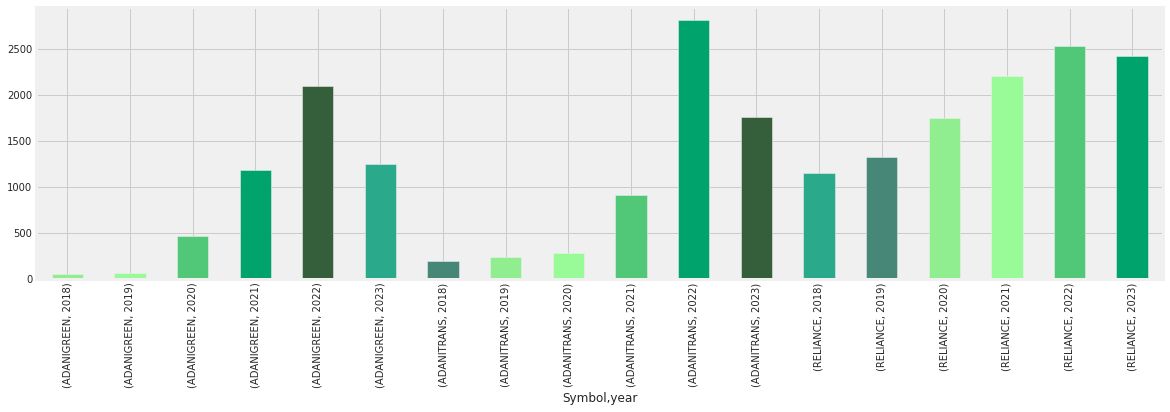

In [24]:
# Average close price per year for each company
plt.figure(figsize=(18,5))
df1.groupby(by=["Symbol","year"])["Close"].mean().plot(kind="bar",color=['#90EE90', '#98FB98', '#50C878', '#00A36C', '#355E3B', '#2AAA8A',"#478778"])

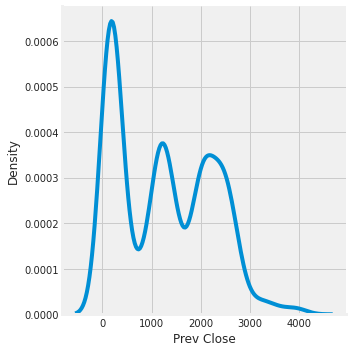

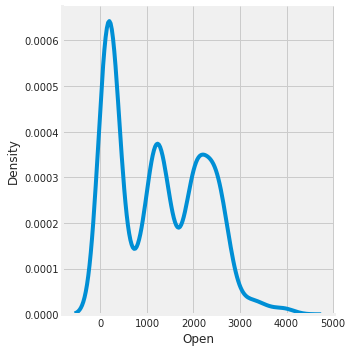

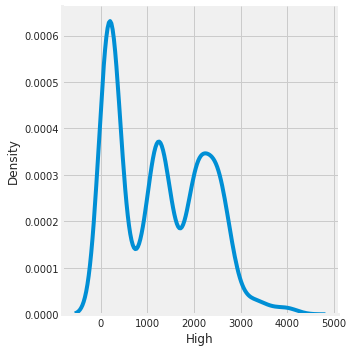

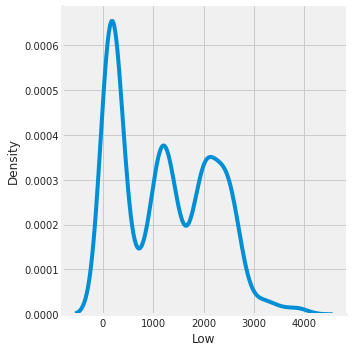

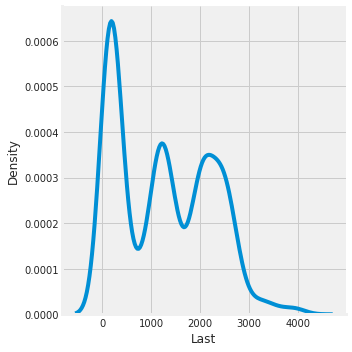

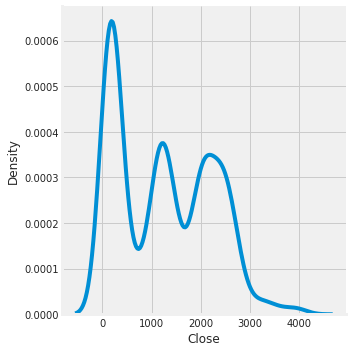

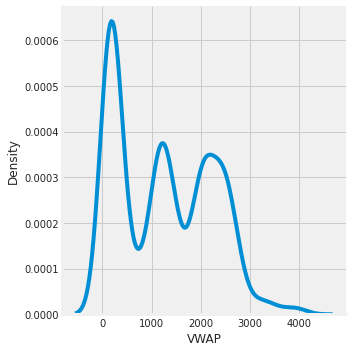

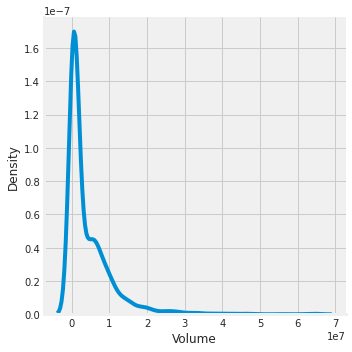

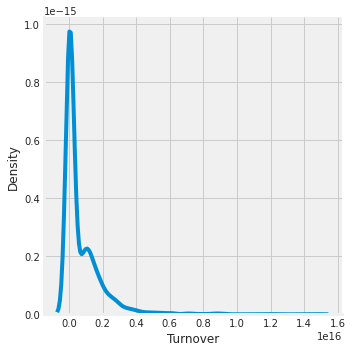

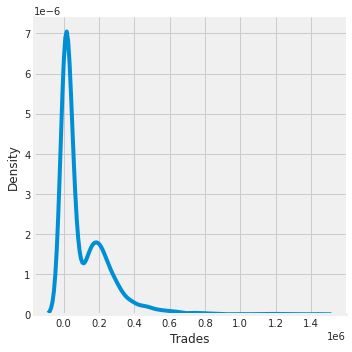

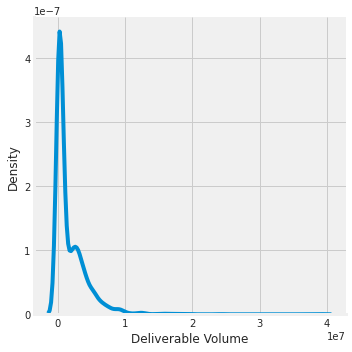

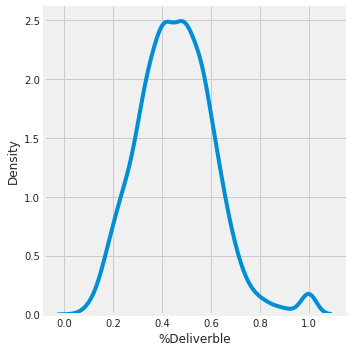

In [25]:
df1.reset_index(inplace=True)
# Distribution plot of Variables
sns.displot(data=df1,x="Prev Close",kind="kde")
sns.displot(data=df1,x="Open",kind="kde")
sns.displot(data=df1,x="High",kind="kde")
sns.displot(data=df1,x="Low",kind="kde")
sns.displot(data=df1,x="Last",kind="kde")
sns.displot(data=df1,x="Close",kind="kde")
sns.displot(data=df1,x="VWAP",kind="kde")
sns.displot(data=df1,x="Volume",kind="kde")
sns.displot(data=df1,x="Turnover",kind="kde")
sns.displot(data=df1,x="Trades",kind="kde")
sns.displot(data=df1,x="Deliverable Volume",kind="kde")
sns.displot(data=df1,x="%Deliverble",kind="kde")


Text(0.5, 0.98, 'Boxen Plot of different companies stock')

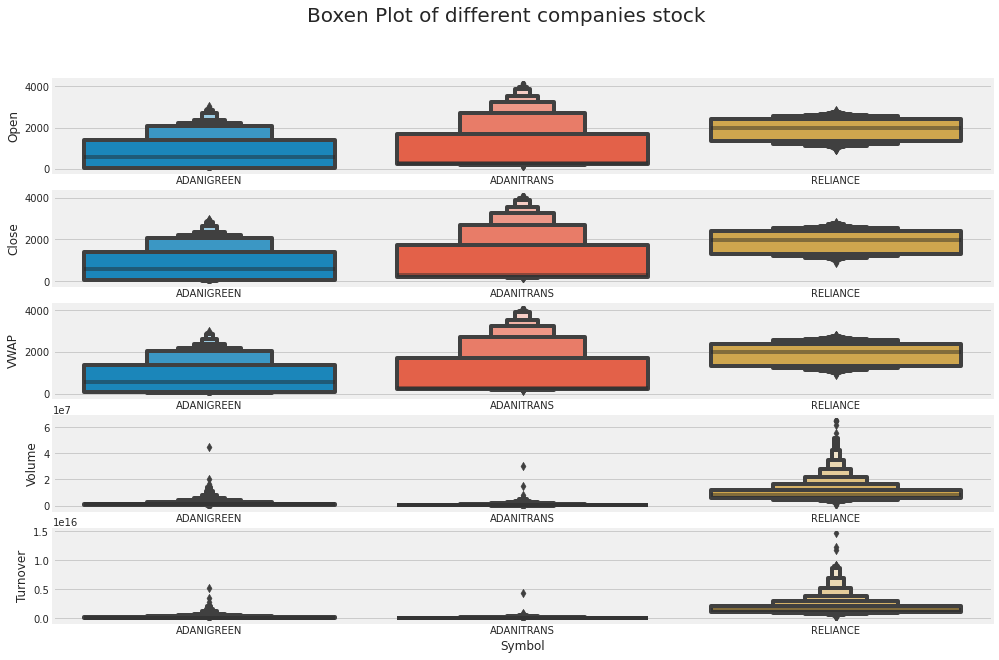

In [26]:
# Boxenplot for variables
fig,axis = plt.subplots(5,figsize=(15,10))
sns.boxenplot(x=df1["Symbol"],y=df1["Open"],ax=axis[0])
sns.boxenplot(x=df1["Symbol"],y=df1["Close"],ax=axis[1])
sns.boxenplot(x=df1["Symbol"],y=df1["VWAP"],ax=axis[2])
sns.boxenplot(x=df1["Symbol"],y=df1["Volume"],ax=axis[3])
sns.boxenplot(x=df1["Symbol"],y=df1["Turnover"],ax=axis[4])
plt.suptitle("Boxen Plot of different companies stock",size=20)


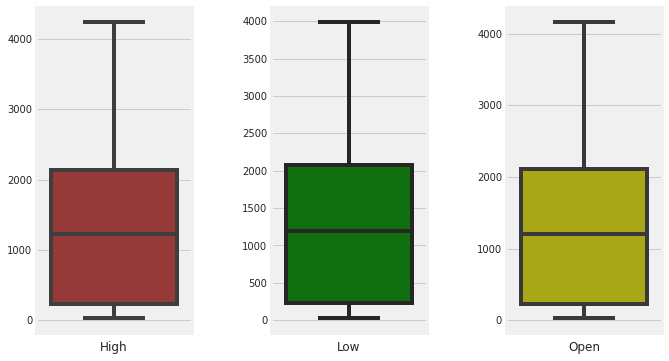

In [27]:
# Box plot for high, low and open variable
fig,ax = plt.subplots(1,3,figsize=(10,6))
plt.subplots_adjust(wspace=0.5)
sns.boxplot(data = df1['High'],ax=ax[0],color = 'brown',)
ax[0].set_xlabel('High') 
sns.boxplot(data = df1['Low'],ax=ax[1],color = 'g',)
ax[1].set_xlabel('Low') 
sns.boxplot(data = df1['Open'],ax=ax[2],color = 'y',)
ax[2].set_xlabel('Open')
for subplot in ax:
    subplot.set_xticklabels([])
                      
plt.show()                      
                                                          

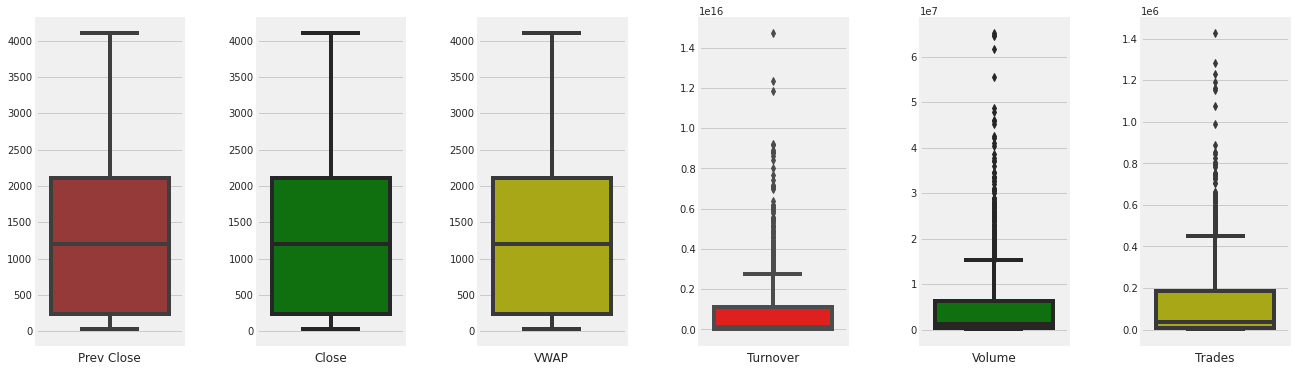

In [28]:
# Box plot for Prev Close, Close, Turnover, VWAP, Volume and Trades variable
fig,ax = plt.subplots(1,6,figsize=(20,6))
plt.subplots_adjust(wspace=0.5)
sns.boxplot(data = df1['Prev Close'],ax=ax[0],color = 'brown',)
ax[0].set_xlabel('Prev Close') 
sns.boxplot(data = df1['Close'],ax=ax[1],color = 'g',)
ax[1].set_xlabel('Close') 
sns.boxplot(data = df1['VWAP'],ax=ax[2],color = 'y',)
ax[2].set_xlabel('VWAP')
sns.boxplot(data = df1['Turnover'],ax=ax[3],color = 'r',)
ax[3].set_xlabel('Turnover') 
sns.boxplot(data = df1['Volume'],ax=ax[4],color = 'g',)
ax[4].set_xlabel('Volume') 
sns.boxplot(data = df1['Trades'],ax=ax[5],color = 'y',)
ax[5].set_xlabel('Trades')
for subplot in ax:
    subplot.set_xticklabels([])
                      
plt.show()                      


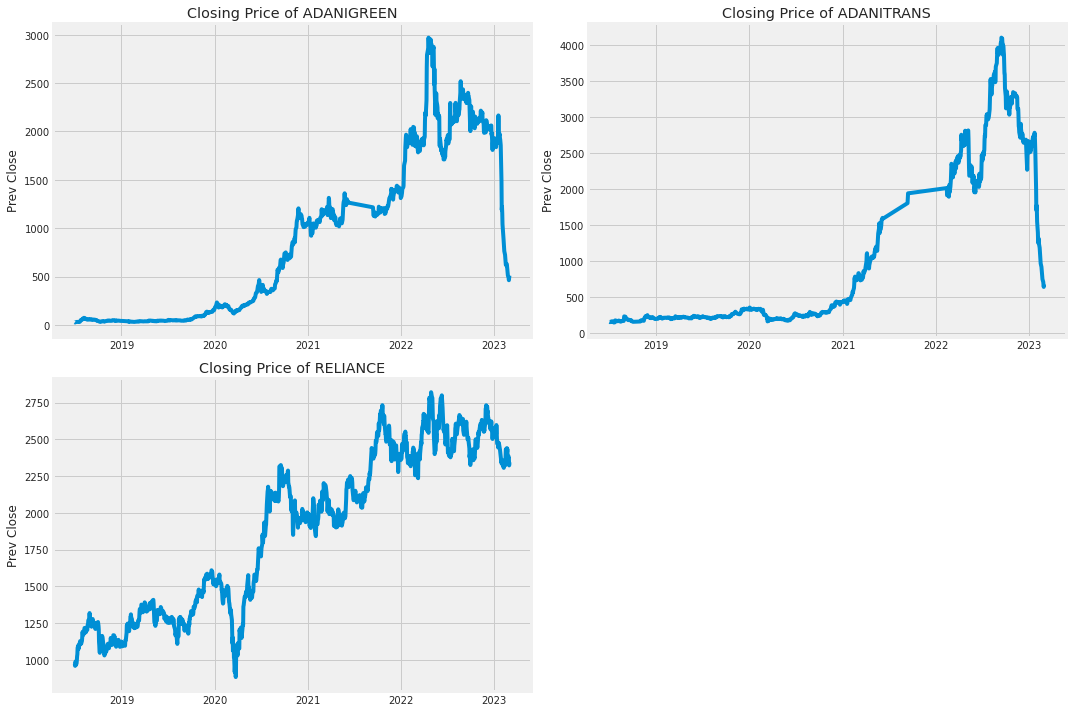

In [29]:
# Closing price for each company
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Prev Close'].plot()
    plt.ylabel('Prev Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_name[i - 1]}")
    
plt.tight_layout()

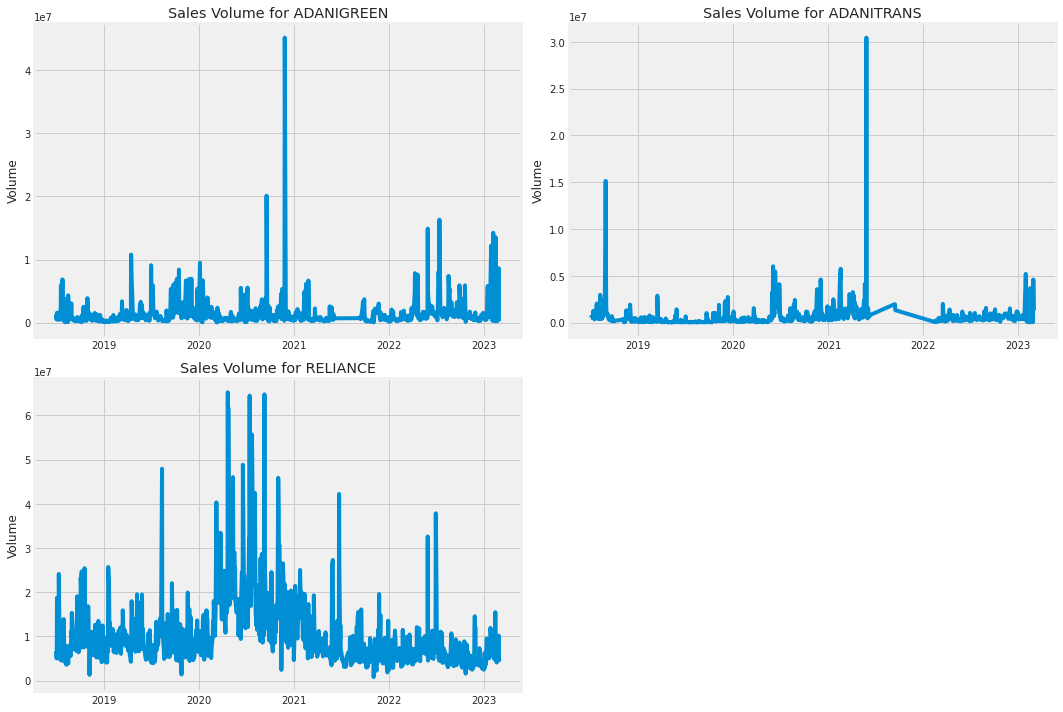

In [30]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_name[i - 1]}")
    
plt.tight_layout()

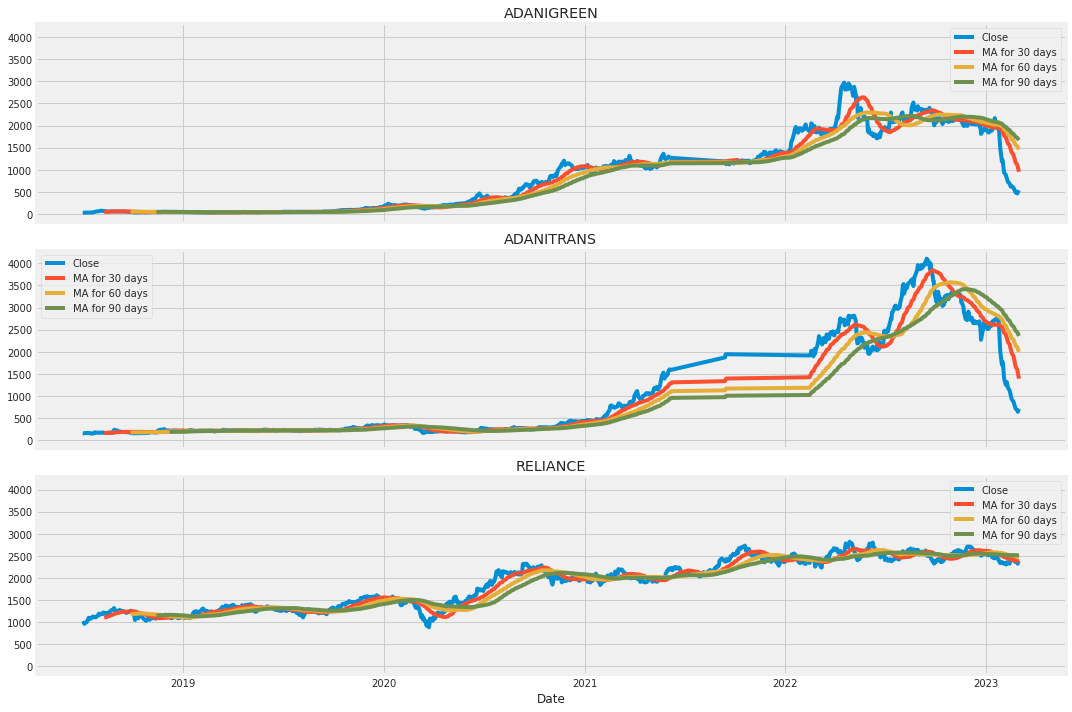

In [31]:
# Moving average plot
ma_day = [30, 60, 90]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(3, sharex=True, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(15)

adanigreen[['Close', 'MA for 30 days', 'MA for 60 days', 'MA for 90 days']].plot(ax=axes[0])
axes[0].set_title('ADANIGREEN')

adanitrans[['Close', 'MA for 30 days', 'MA for 60 days', 'MA for 90 days']].plot(ax=axes[1])
axes[1].set_title('ADANITRANS')

reliance[['Close', 'MA for 30 days', 'MA for 60 days', 'MA for 90 days']].plot(ax=axes[2])
axes[2].set_title('RELIANCE')

fig.tight_layout()

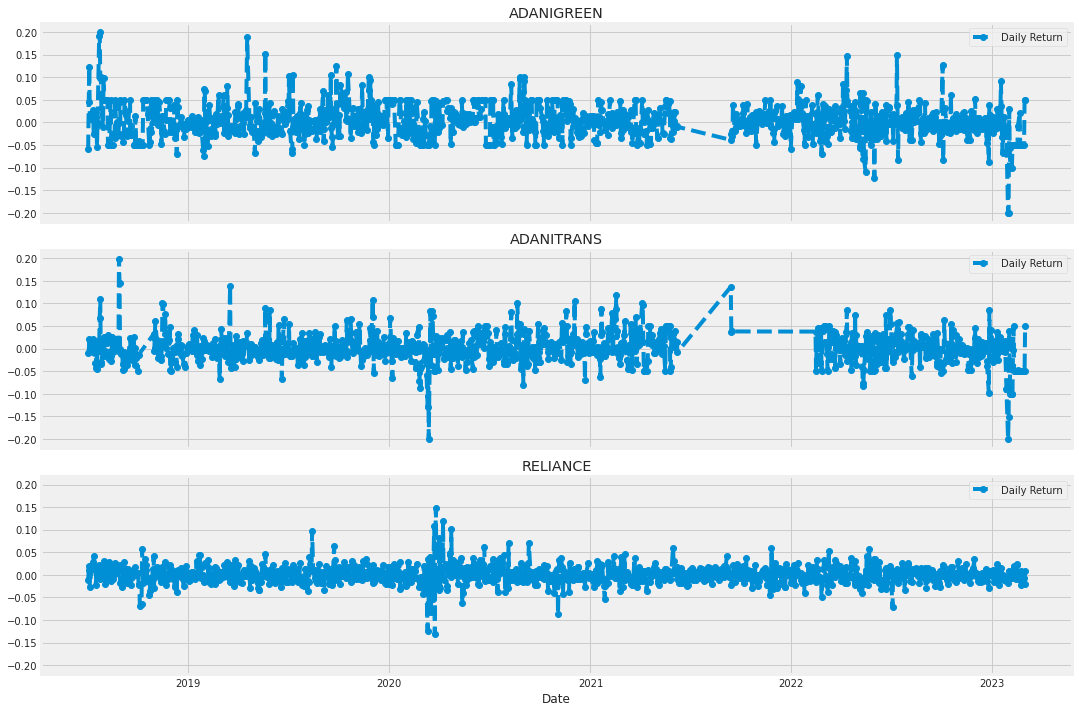

In [32]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Prev Close'].pct_change()

# Then we'll plot the daily return percentage
fig, (axes) = plt.subplots(3, sharex=True, sharey=True)
fig.set_figheight(10)
fig.set_figwidth(15)

adanigreen['Daily Return'].plot(ax=axes[0], legend=True, linestyle='--', marker='o')
axes[0].set_title('ADANIGREEN')

adanitrans['Daily Return'].plot(ax=axes[1], legend=True, linestyle='--', marker='o')
axes[1].set_title('ADANITRANS')

reliance['Daily Return'].plot(ax=axes[2], legend=True, linestyle='--', marker='o')
axes[2].set_title('RELIANCE')

fig.tight_layout()

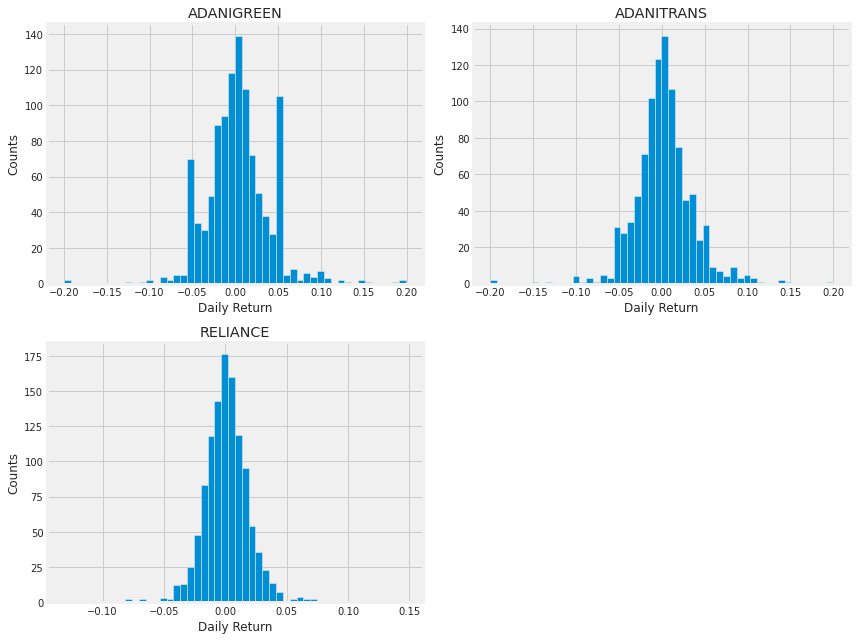

In [33]:
# histogram for daily returns
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [34]:
a=adanigreen['Prev Close']
b=adanitrans['Prev Close']
c=reliance['Prev Close']

df1=pd.DataFrame(a)
df2=pd.DataFrame(b)
df3=pd.DataFrame(c)

result = pd.concat([df1, df2, df3], axis=1)

result.set_axis(["ADANIGREEN", "ADANITRANS", "RELIANCE"], axis="columns", inplace=True)
result

ADANIGREEN  ADANITRANS  RELIANCE
Date                                        
2018-07-02       26.80      156.15    972.45
2018-07-03       25.20      154.75    960.60
2018-07-04       26.35      153.65    971.30
2018-07-05       29.60      156.85    990.10
2018-07-06       29.80      159.10    964.50
...                ...         ...       ...
2021-09-03         NaN         NaN   2294.40
2021-09-06         NaN         NaN   2388.50
2021-09-07         NaN         NaN   2425.60
2021-09-08         NaN         NaN   2440.90
2021-09-09         NaN         NaN   2431.35

[1158 rows x 3 columns]

In [35]:
tech_rets = result.pct_change()
tech_rets.head()

ADANIGREEN  ADANITRANS  RELIANCE
Date                                        
2018-07-02         NaN         NaN       NaN
2018-07-03   -0.059701   -0.008966 -0.012186
2018-07-04    0.045635   -0.007108  0.011139
2018-07-05    0.123340    0.020827  0.019356
2018-07-06    0.006757    0.014345 -0.025856

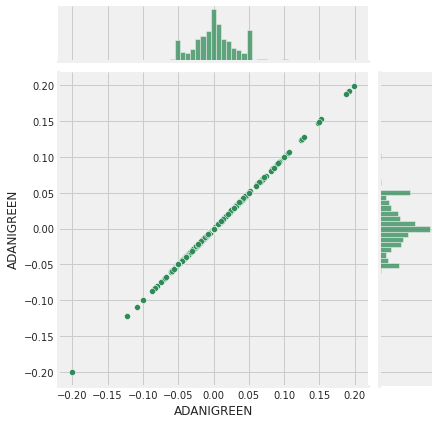

In [36]:
# Comparing ADANIGREEN to itself should show a perfectly linear relationship
sns.jointplot(x='ADANIGREEN', y='ADANIGREEN', data=tech_rets, kind='scatter', color='seagreen')

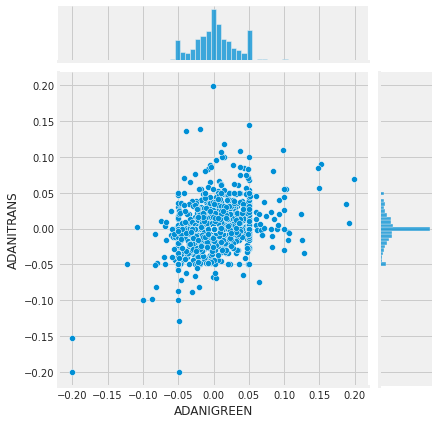

In [37]:
# We'll use joinplot to compare the daily returns of ADANIGREEN and ADANITRANS
sns.jointplot(x='ADANIGREEN', y='ADANITRANS', data=tech_rets, kind='scatter')

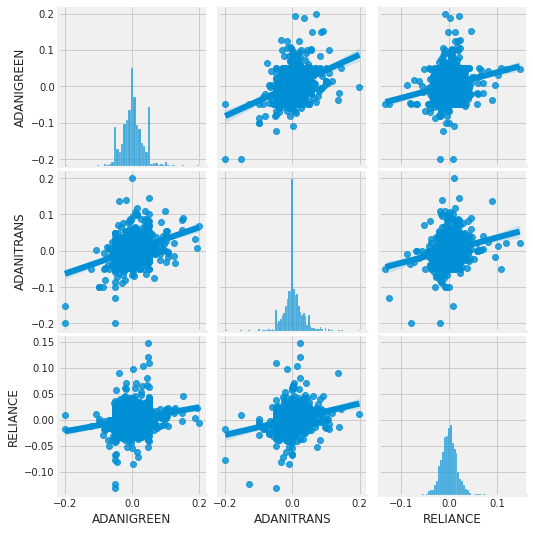

In [38]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

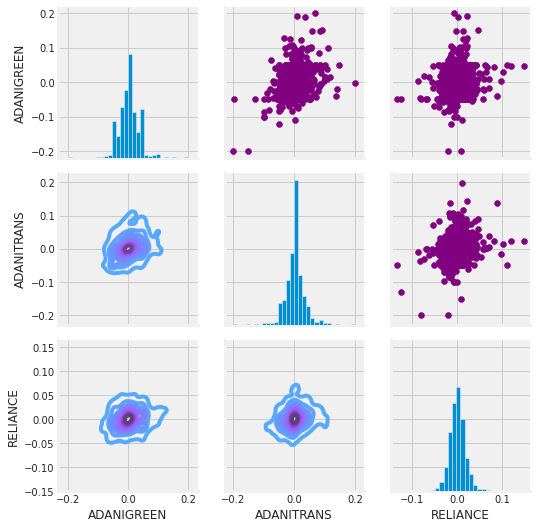

In [39]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

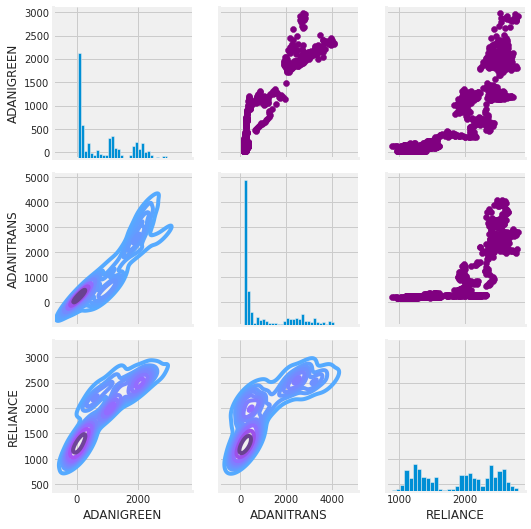

In [40]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(result)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

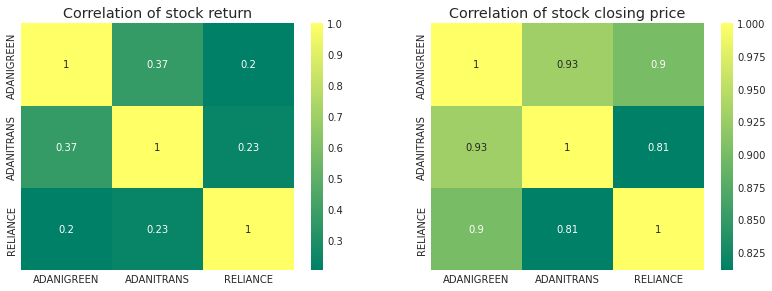

In [41]:
# Heatmap 
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(result.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

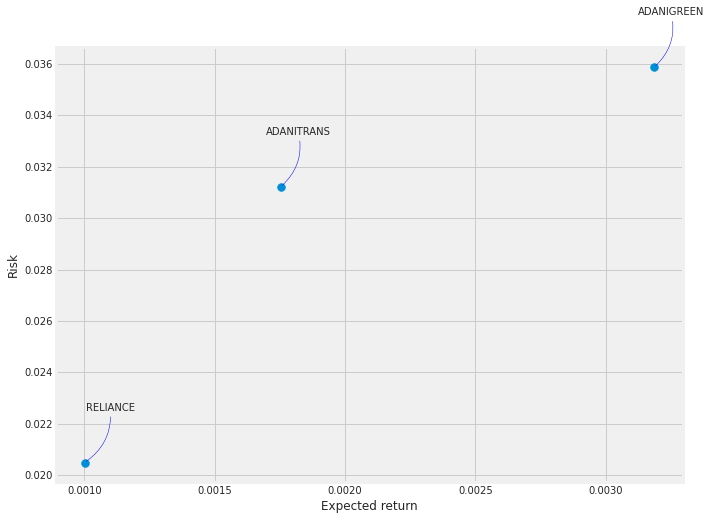

In [42]:
#There are many ways we can quantify risk, one of the most basic ways using the information 
#we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

 # Market Capatization

<ipython-input-43-af8a79a4e1c8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['MarktCap'] = data1['Open'] * data1['Volume']
<ipython-input-43-af8a79a4e1c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['MarktCap'] = data2['Open'] * data2['Volume']
<ipython-input-43-af8a79a4e1c8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

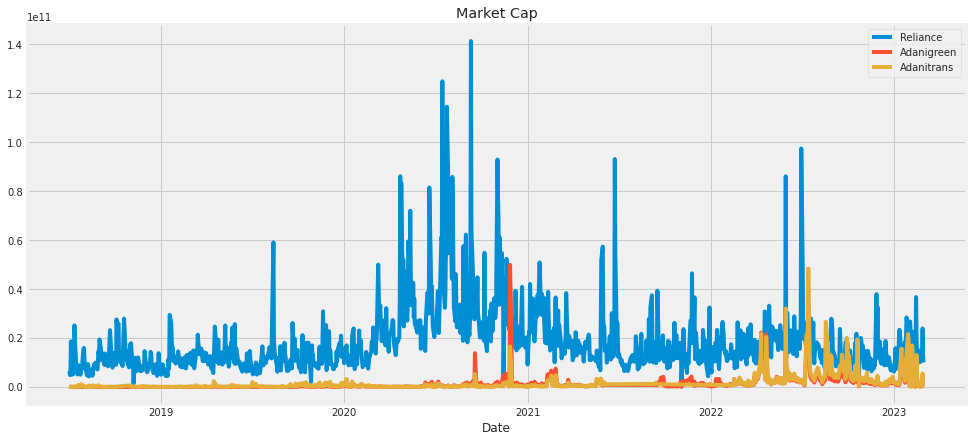

In [43]:
# Calculation of market and plot
data=stock.copy()
data1=data.loc[data["Symbol"]=="RELIANCE"]
data2=data.loc[data["Symbol"]=="ADANIGREEN"]
data3=data.loc[data["Symbol"]=="ADANITRANS"]

data1['MarktCap'] = data1['Open'] * data1['Volume']
data2['MarktCap'] = data2['Open'] * data2['Volume']
data3['MarktCap'] = data3['Open'] * data2['Volume']
data1['MarktCap'].plot(label = 'Reliance', figsize = (15,7))
data2['MarktCap'].plot(label = 'Adanigreen')
data3['MarktCap'].plot(label = 'Adanitrans')
plt.title('Market Cap')
plt.legend()

# Candlesticks for each plot

In [44]:
import plotly.graph_objects as go
import plotly.express as px

# candlesticks for reliance
candle_stick = go.Figure(data=[go.Candlestick(x=reliance_1["Date"],open=reliance_1["Open"], high=reliance_1["High"],
                                        low=reliance_1["Low"], close=reliance_1["Close"])])
candle_stick.update_layout(title = "Reliance Stock Price Analysis", xaxis_rangeslider_visible=True)
candle_stick.show()

In [45]:
# candlesticks for adanigreen
candle_stick = go.Figure(data=[go.Candlestick(x=adanigreen_1["Date"],open=adanigreen_1["Open"], high=adanigreen_1["High"],
                                        low=adanigreen_1["Low"], close=adanigreen_1["Close"])])
candle_stick.update_layout(title = "ADANIGREEN Stock Price Analysis", xaxis_rangeslider_visible=True)
candle_stick.show()

In [46]:
# candlesticks for adanitrans
candle_stick = go.Figure(data=[go.Candlestick(x=adanitrans_1["Date"],open=adanitrans_1["Open"], high=adanitrans_1["High"],
                                        low=adanitrans_1["Low"], close=adanitrans_1["Close"])])
candle_stick.update_layout(title = "ADANRANS Stock Analysis", xaxis_rangeslider_visible=True)
candle_stick.show()

<ipython-input-47-2e40527a8844>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-2e40527a8844>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-2e40527a8844>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



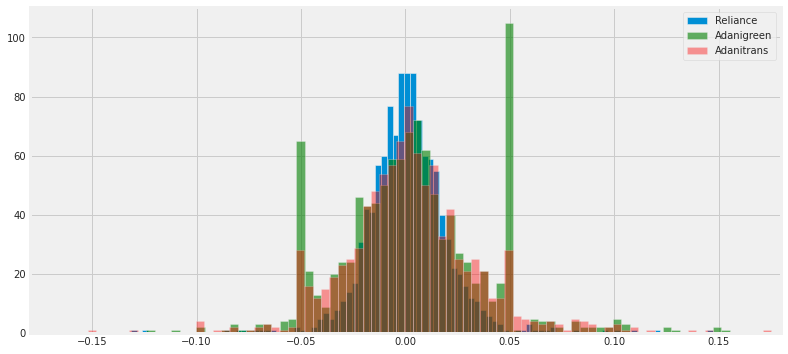

In [47]:
#volitile stock
data1["return"]=(data1["Close"]/data1["Close"].shift(1))-1
data2["return"]=(data2["Close"]/data2["Close"].shift(1))-1
data3["return"]=(data3["Close"]/data3["Close"].shift(1))-1

data1["return"].hist(label="Reliance",bins=100,alpha=1,figsize=(12,6))
data2["return"].hist(label="Adanigreen",bins=100,color="g",alpha=0.6)
data3["return"].hist(label="Adanitrans",bins=100,color="r",alpha=0.4)
plt.xlim(-0.18,0.18)
plt.legend()
plt.show()

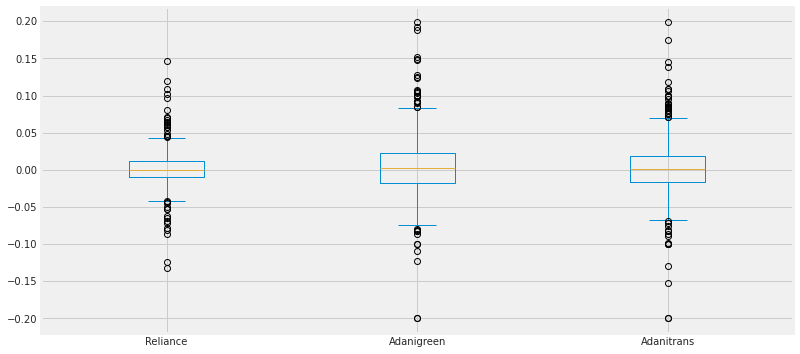

In [48]:
# Box plot of daily return
box_df=pd.concat([data1["return"],data2["return"],data3["return"]],axis=1)
box_df.columns=["Reliance","Adanigreen","Adanitrans"]
box_df.plot(kind="box",figsize=(12,6))
plt.show()

# Cummulative Return

In [49]:
data1["cummulative_return"]=(1+data1["return"]).cumprod()
data2["cummulative_return"]=(1+data2["return"]).cumprod()
data3["cummulative_return"]=(1+data3["return"]).cumprod()

<ipython-input-49-404cf52aa6f6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-404cf52aa6f6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-404cf52aa6f6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



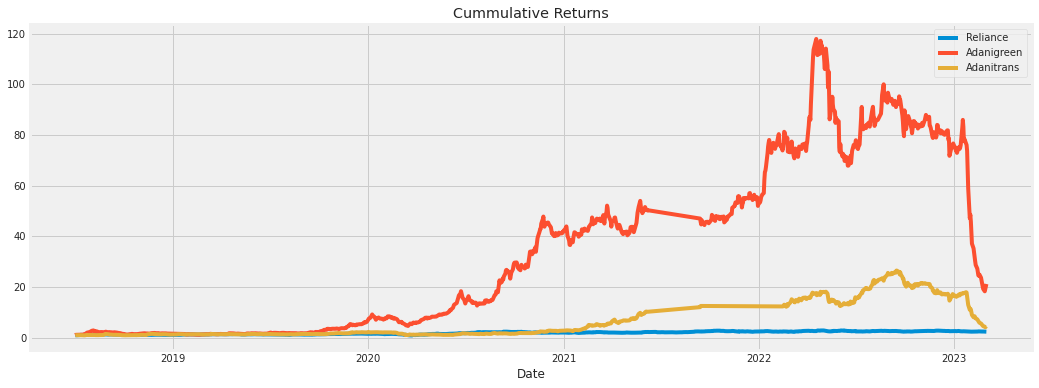

In [50]:
data1["cummulative_return"].plot(label="Reliance",figsize=(16,6))
data2["cummulative_return"].plot(label="Adanigreen")
data3["cummulative_return"].plot(label="Adanitrans")
plt.title("Cummulative Returns")
plt.legend()
plt.show()

# Bollinger Band Plot

In [51]:
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_dark"

# Bollinger band plot for reliance
data1_close=data1[["Close"]]

sma = data1_close.rolling(window=20).mean()
rstd = data1_close.rolling(window=20).std()

upper_band = sma + 2 * rstd
lower_band = sma - 2 * rstd

upper_band = upper_band.rename(columns={'Close': 'upper'})
lower_band = lower_band.rename(columns={'Close': 'lower'})

bb=data1_close.join(upper_band)
bb = data1_close.join(upper_band).join(lower_band)

buyers = bb[bb['Close'] <= bb['lower']]
sellers = bb[bb['Close'] >= bb['upper']]

fig = go.Figure()
fig.add_trace(go.Scatter(x=lower_band.index, y=lower_band['lower'], 
                         name='Lower Band', 
                         line_color='rgba(173,204,255,0.2)'
                        ))
fig.add_trace(go.Scatter(x=upper_band.index, y=upper_band['upper'], 
                         name='Upper Band', 
                         fill='tonexty', 
                         fillcolor='rgba(173,204,255,0.2)', 
                         line_color='rgba(173,204,255,0.2)'
                        ))
fig.add_trace(go.Scatter(x=data1_close.index, y=data1_close['Close'], 
                         name='Close', 
                         line_color='#636EFA'
                        ))
fig.add_trace(go.Scatter(x=sma.index, y=sma['Close'], 
                         name='SMA', 
                         line_color='#FECB52'
                        ))
fig.add_trace(go.Scatter(x=buyers.index, y=buyers['Close'], 
                         name='Buyers', 
                         mode='markers',
                         marker=dict(
                             color='#00CC96',
                             size=10,
                             )
                         ))
fig.add_trace(go.Scatter(x=sellers.index, y=sellers['Close'], 
                         name='Sellers', 
                         mode='markers', 
                         marker=dict(
                             color='#EF553B',
                             size=10,
                             )
                         ))
fig.update_layout(
    title="Bollinger Bands Reliance",
    xaxis_title="Year",
    yaxis_title="Stock Price",
    legend_title="Legends",
    font=dict(
        family="Courier New, monospace",
        size=18
    )
)
fig.show()



In [52]:
# Bollinger band plot for Adanigreen

data1_close=data2[["Close"]]

upper_band = sma + 2 * rstd
lower_band = sma - 2 * rstd

upper_band = upper_band.rename(columns={'Close': 'upper'})
lower_band = lower_band.rename(columns={'Close': 'lower'})

bb=data1_close.join(upper_band)
bb = data1_close.join(upper_band).join(lower_band)

buyers = bb[bb['Close'] <= bb['lower']]
sellers = bb[bb['Close'] >= bb['upper']]

fig = go.Figure()
fig.add_trace(go.Scatter(x=lower_band.index, y=lower_band['lower'], 
                         name='Lower Band', 
                         line_color='rgba(173,204,255,0.2)'
                        ))
fig.add_trace(go.Scatter(x=upper_band.index, y=upper_band['upper'], 
                         name='Upper Band', 
                         fill='tonexty', 
                         fillcolor='rgba(173,204,255,0.2)', 
                         line_color='rgba(173,204,255,0.2)'
                        ))
fig.add_trace(go.Scatter(x=data1_close.index, y=data1_close['Close'], 
                         name='Close', 
                         line_color='#636EFA'
                        ))
fig.add_trace(go.Scatter(x=sma.index, y=sma['Close'], 
                         name='SMA', 
                         line_color='#FECB52'
                        ))
fig.add_trace(go.Scatter(x=buyers.index, y=buyers['Close'], 
                         name='Buyers', 
                         mode='markers',
                         marker=dict(
                             color='#00CC96',
                             size=10,
                             )
                         ))
fig.add_trace(go.Scatter(x=sellers.index, y=sellers['Close'], 
                         name='Sellers', 
                         mode='markers', 
                         marker=dict(
                             color='#EF553B',
                             size=10,
                             )
                         ))
fig.update_layout(
    title="Bollinger Bands Adanigreen",
    xaxis_title="Year",
    yaxis_title="Stock Price",
    legend_title="Legends",
    font=dict(
        family="Courier New, monospace",
        size=18
    )
)
fig.show()



In [53]:
# Bollinger band plot for Adanitrans

data1_close=data3[["Close"]]

upper_band = sma + 2 * rstd
lower_band = sma - 2 * rstd

upper_band = upper_band.rename(columns={'Close': 'upper'})
lower_band = lower_band.rename(columns={'Close': 'lower'})

bb=data1_close.join(upper_band)
bb = data1_close.join(upper_band).join(lower_band)

buyers = bb[bb['Close'] <= bb['lower']]
sellers = bb[bb['Close'] >= bb['upper']]

fig = go.Figure()
fig.add_trace(go.Scatter(x=lower_band.index, y=lower_band['lower'], 
                         name='Lower Band', 
                         line_color='rgba(173,204,255,0.2)'
                        ))
fig.add_trace(go.Scatter(x=upper_band.index, y=upper_band['upper'], 
                         name='Upper Band', 
                         fill='tonexty', 
                         fillcolor='rgba(173,204,255,0.2)', 
                         line_color='rgba(173,204,255,0.2)'
                        ))
fig.add_trace(go.Scatter(x=data1_close.index, y=data1_close['Close'], 
                         name='Close', 
                         line_color='#636EFA'
                        ))
fig.add_trace(go.Scatter(x=sma.index, y=sma['Close'], 
                         name='SMA', 
                         line_color='#FECB52'
                        ))
fig.add_trace(go.Scatter(x=buyers.index,y=buyers['Close'], 
                         name='Buyers', 
                         mode='markers',
                         marker=dict(
                             color='#00CC96',
                             size=10,
                             )
                         ))
fig.add_trace(go.Scatter(x=sellers.index, y=sellers['Close'], 
                         name='Sellers', 
                         mode='markers', 
                         marker=dict(
                             color='#EF553B',
                             size=10,
                             )
                         ))
fig.update_layout(
    title="Bollinger Bands Adanitrans",
    xaxis_title="Year",
    yaxis_title="Stock Price",
    legend_title="Legends",
    font=dict(
        family="Courier New, monospace",
        size=18
    )
)
fig.show()



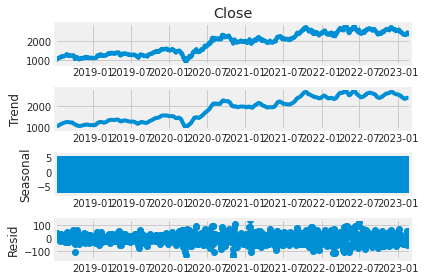

In [60]:
decompose_ts_add = seasonal_decompose(reliance['Close'], period = 12)
decompose_ts_add.plot()
plt.show()



In [61]:
log_reliance=reliance.drop(["Symbol","Series","company_name","MA for 30 days","MA for 60 days","MA for 90 days","Daily Return"],axis=1)
log_reliance=np.log(log_reliance)
log_reliance.head(2)

Prev Close      Open      High       Low      Last     Close  \
Date                                                                       
2018-07-02    6.879819  6.879716  6.879716  6.863803  6.866985  6.867558   
2018-07-03    6.867558  6.872128  6.885970  6.867298  6.879562  6.878635   

                VWAP     Volume   Turnover     Trades  Deliverable Volume  \
Date                                                                        
2018-07-02  6.869160  15.711768  34.093848  11.336463           15.239949   
2018-07-03  6.879459  15.438311  33.830695  11.673819           14.408516   

            %Deliverble  
Date                     
2018-07-02    -0.471765  
2018-07-03    -1.029739

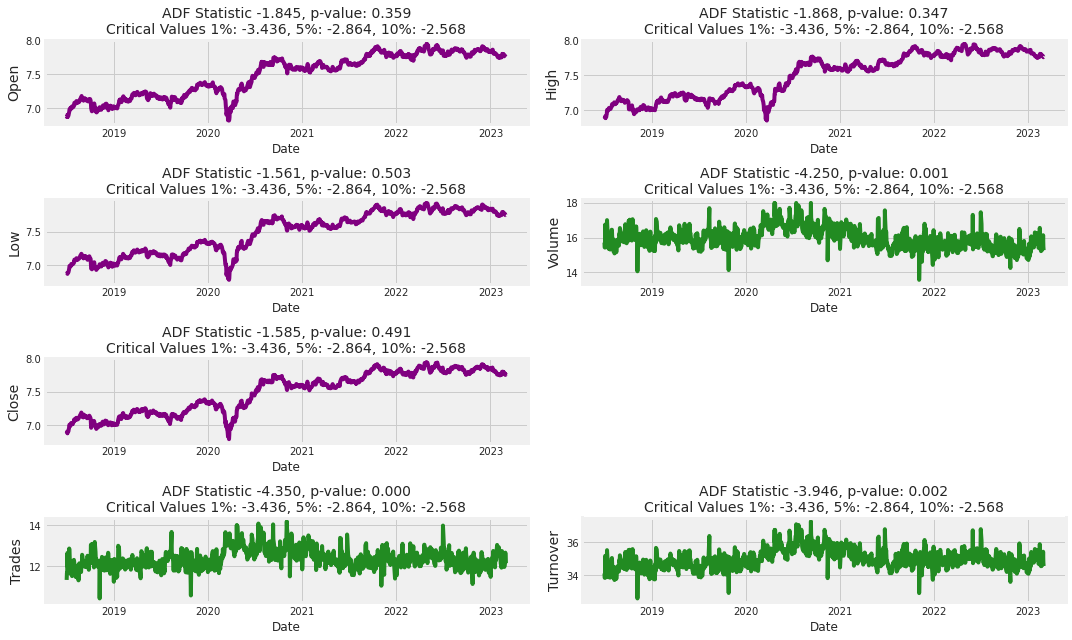

In [62]:
f, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=log_reliance.index, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(log_reliance['Open'].values, 'Open', ax[0, 0])
visualize_adfuller_results(log_reliance['High'].values, 'High', ax[0,1])
visualize_adfuller_results(log_reliance['Low'].values, 'Low', ax[1,0])
visualize_adfuller_results(log_reliance['Volume'].values, 'Volume', ax[1,1])
visualize_adfuller_results(log_reliance['Close'].values, 'Close', ax[2, 0])
visualize_adfuller_results(log_reliance['Turnover'].values, 'Turnover', ax[3, 1])
visualize_adfuller_results(log_reliance['Trades'].values, 'Trades', ax[3, 0])


f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

(-10.104518004165245, 1.038378638808185e-17, 10, 1146, {'1%': -3.4360690296267338, '5%': -2.864065327292836, '10%': -2.568114547237679}, -5626.275239506822)
Close


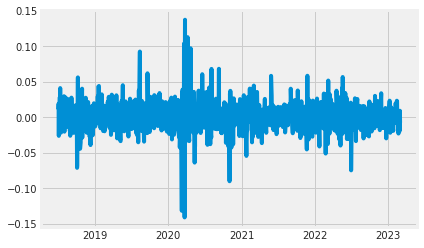

(-33.14159982829166, 0.0, 0, 1156, {'1%': -3.4360194465416387, '5%': -2.8640434537995523, '10%': -2.5681028978640104}, -5626.488906111097)
Open


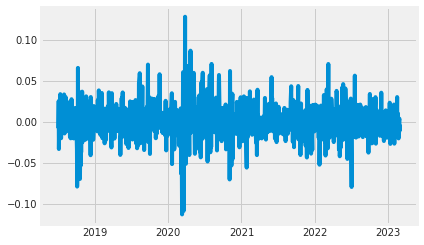

(-7.522489853437534, 3.7587459428055126e-11, 18, 1138, {'1%': -3.4361093249345402, '5%': -2.8640831032339706, '10%': -2.5681240143809787}, -5857.288978106941)
Low


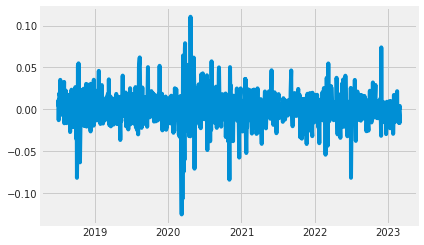

(-31.04673866204314, 0.0, 0, 1156, {'1%': -3.4360194465416387, '5%': -2.8640434537995523, '10%': -2.5681028978640104}, -5929.058485028259)
High


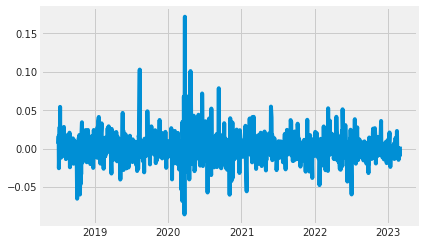

In [65]:
log_reliance["diff_reliance_close"] = log_reliance["Close"].diff(periods=1)
print(adfuller(log_reliance["diff_reliance_close"].dropna()))
print("Close")
plt.plot(log_reliance["diff_reliance_close"])
plt.show()

log_reliance["diff_reliance_Open"] = log_reliance["Open"].diff(periods=1)
print(adfuller(log_reliance["diff_reliance_Open"].dropna()))
print("Open")
plt.plot(log_reliance["diff_reliance_Open"])
plt.show()

log_reliance["diff_reliance_Low"] = log_reliance["Low"].diff(periods=1)
print(adfuller(log_reliance["diff_reliance_Low"].dropna()))
print("Low")
plt.plot(log_reliance["diff_reliance_Low"])
plt.show()

log_reliance["diff_reliance_High"] = log_reliance["High"].diff(periods=1)
print(adfuller(log_reliance["diff_reliance_High"].dropna()))
print("High")
plt.plot(log_reliance["diff_reliance_High"])
plt.show()


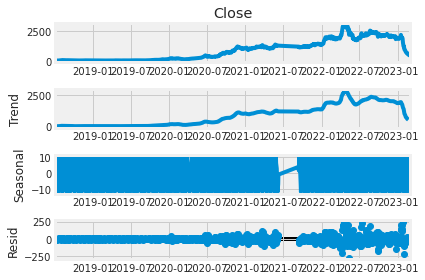

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(adanigreen['Close'], period = 12)
decompose_ts_add.plot()
plt.show()



In [68]:
log_adanigreen=adanigreen.drop(["Symbol","Series","company_name","MA for 30 days","MA for 60 days","MA for 90 days","Daily Return"],axis=1)
log_adanigreen=np.log(log_adanigreen)
log_adanigreen.head()

Prev Close      Open      High       Low      Last     Close  \
Date                                                                       
2018-07-02    3.288402  3.303217  3.305054  3.126761  3.234749  3.226844   
2018-07-03    3.226844  3.293983  3.293983  3.198673  3.280911  3.271468   
2018-07-04    3.271468  3.258097  3.399529  3.250374  3.394508  3.387774   
2018-07-05    3.387774  3.394508  3.464172  3.353407  3.392829  3.394508   
2018-07-06    3.394508  3.367296  3.430756  3.362110  3.416086  3.412797   

                VWAP     Volume   Turnover    Trades  Deliverable Volume  \
Date                                                                       
2018-07-02  3.216473  14.130172  28.859410  8.570544           13.847398   
2018-07-03  3.251149  13.160868  27.924927  8.072467           12.946299   
2018-07-04  3.335770  13.848414  28.697037  8.758255           13.292148   
2018-07-05  3.419037  14.251306  29.183271  8.782016           13.755778   
2018-07-06  3.411808  13.168239  28.092998  8.020270           12.638306   

            %Deliverble  
Date                     
2018-07-02    -0.282761  
2018-07-03    -0.214556  
2018-07-04    -0.556346  
2018-07-05    -0.495609  
2018-07-06    -0.530008

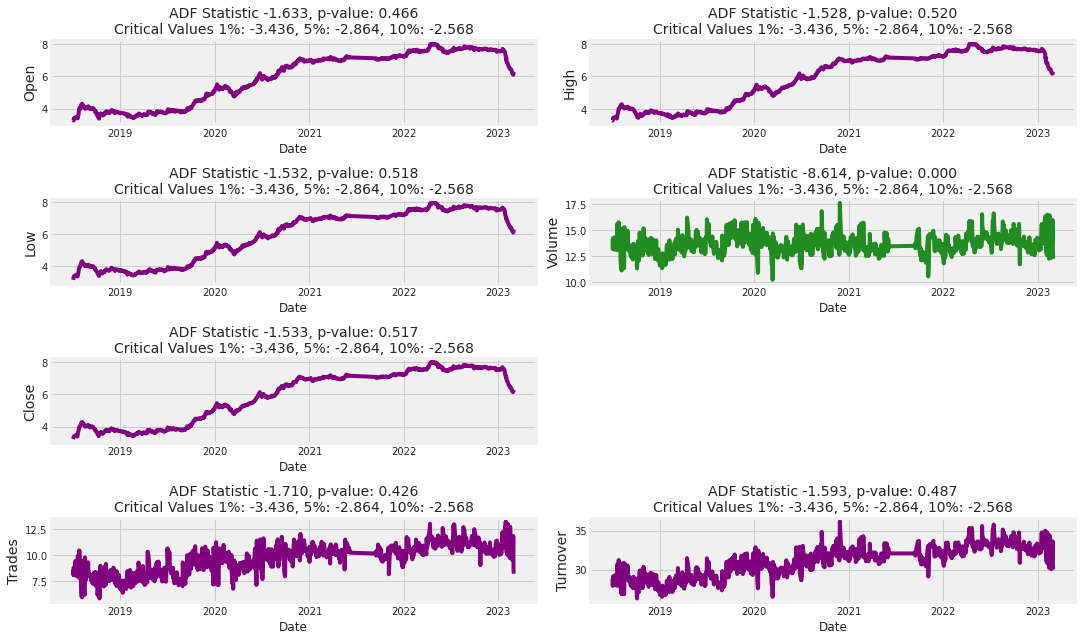

In [69]:
f, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=log_adanigreen.index, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(log_adanigreen['Open'].values, 'Open', ax[0, 0])
visualize_adfuller_results(log_adanigreen['High'].values, 'High', ax[0,1])
visualize_adfuller_results(log_adanigreen['Low'].values, 'Low', ax[1,0])
visualize_adfuller_results(log_adanigreen['Volume'].values, 'Volume', ax[1,1])
visualize_adfuller_results(log_adanigreen['Close'].values, 'Close', ax[2, 0])
visualize_adfuller_results(log_adanigreen['Turnover'].values, 'Turnover', ax[3, 1])
visualize_adfuller_results(log_adanigreen['Trades'].values, 'Trades', ax[3, 0])


f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

(-7.979764052153908, 2.6426564780808737e-12, 9, 1082, {'1%': -3.4364081161854747, '5%': -2.8642149051061954, '10%': -2.5681942108302214}, -4174.1032465685275)
Close


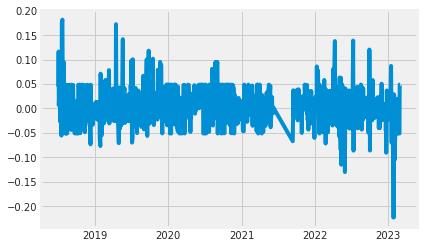

(-14.251065251304102, 1.4807757184817443e-26, 3, 1088, {'1%': -3.4363746281360426, '5%': -2.864200133611212, '10%': -2.568186343567528}, -3719.834665715117)
Open


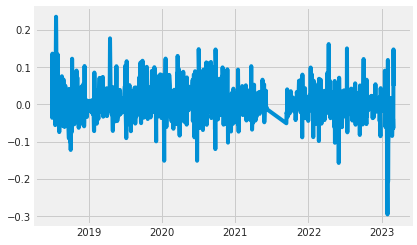

(-11.939998830355664, 4.56675231476333e-22, 4, 1087, {'1%': -3.436380183743342, '5%': -2.8642025841870655, '10%': -2.568187648736553}, -3954.272992951277)
Low


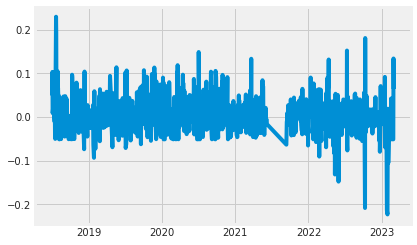

(-14.939198420052398, 1.330417785898647e-27, 2, 1089, {'1%': -3.436369082756128, '5%': -2.8641976875421524, '10%': -2.5681850407995137}, -4121.25669792078)
High


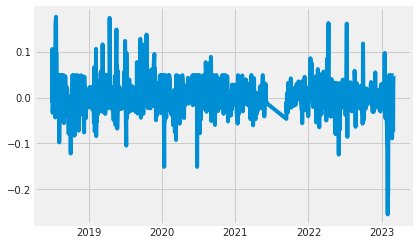

(-10.787722574990566, 2.172576643428709e-19, 20, 1071, {'1%': -3.436470487817901, '5%': -2.8642424166404, '10%': -2.5682088634756735}, 2160.0157861197686)
Trades


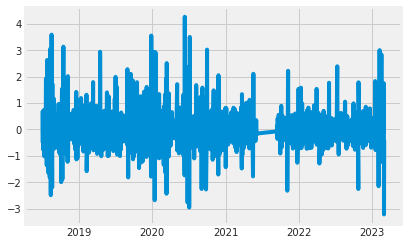

(-11.054926549077008, 4.972397152238625e-20, 20, 1071, {'1%': -3.436470487817901, '5%': -2.8642424166404, '10%': -2.5682088634756735}, 2547.9371464212422)
Turnover


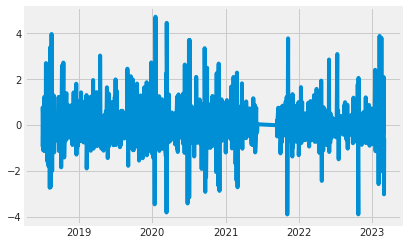

In [70]:
log_adanigreen["diff_adanigreen_close"] = log_adanigreen["Close"].diff(periods=1)
print(adfuller(log_adanigreen["diff_adanigreen_close"].dropna()))
print("Close")
plt.plot(log_adanigreen["diff_adanigreen_close"])
plt.show()

log_adanigreen["diff_adanigreen_Open"] = log_adanigreen["Open"].diff(periods=1)
print(adfuller(log_adanigreen["diff_adanigreen_Open"].dropna()))
print("Open")
plt.plot(log_adanigreen["diff_adanigreen_Open"])
plt.show()

log_adanigreen["diff_adanigreen_Low"] = log_adanigreen["Low"].diff(periods=1)
print(adfuller(log_adanigreen["diff_adanigreen_Low"].dropna()))
print("Low")
plt.plot(log_adanigreen["diff_adanigreen_Low"])
plt.show()

log_adanigreen["diff_adanigreen_High"] = log_adanigreen["High"].diff(periods=1)
print(adfuller(log_adanigreen["diff_adanigreen_High"].dropna()))
print("High")
plt.plot(log_adanigreen["diff_adanigreen_High"])
plt.show()

log_adanigreen["diff_adanigreen_Trades"] = log_adanigreen["Trades"].diff(periods=1)
print(adfuller(log_adanigreen["diff_adanigreen_Trades"].dropna()))
print("Trades")
plt.plot(log_adanigreen["diff_adanigreen_Trades"])
plt.show()

log_adanigreen["diff_adanigreen_Turnover"] = log_adanigreen["Turnover"].diff(periods=1)
print(adfuller(log_adanigreen["diff_adanigreen_Turnover"].dropna()))
print("Turnover")
plt.plot(log_adanigreen["diff_adanigreen_Turnover"])
plt.show()



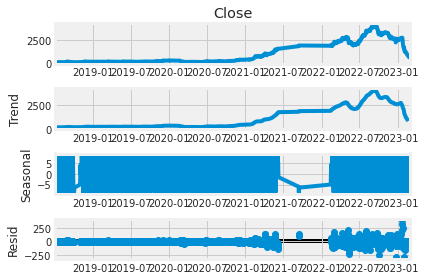

In [71]:
decompose_ts_add = seasonal_decompose(adanitrans['Close'], period = 12)
decompose_ts_add.plot()
plt.show()



In [72]:
log_adanitrans=adanitrans.drop(["Symbol","Series","company_name","MA for 30 days","MA for 60 days","MA for 90 days","Daily Return"],axis=1)
log_adanitrans=np.log(log_adanitrans)
log_adanitrans.head()

Prev Close      Open      High       Low      Last     Close  \
Date                                                                       
2018-07-02    5.050817  5.067646  5.084815  5.015291  5.038575  5.041811   
2018-07-03    5.041811  5.036953  5.042134  4.999237  5.033049  5.034677   
2018-07-04    5.034677  5.018934  5.072044  5.018934  5.055609  5.055290   
2018-07-05    5.055290  5.044715  5.075174  5.044715  5.066385  5.069533   
2018-07-06    5.069533  5.062595  5.091908  5.057201  5.073610  5.077047   

                VWAP     Volume   Turnover    Trades  Deliverable Volume  \
Date                                                                       
2018-07-02  5.041035  13.195545  29.749483  8.541886           11.403925   
2018-07-03  5.028410  13.295595  29.836913  8.485290           11.511855   
2018-07-04  5.035913  13.293760  29.842581  8.164795           11.105138   
2018-07-05  5.060124  13.249889  29.822966  8.355380           11.367229   
2018-07-06  5.076485  13.346463  29.935850  8.554874           11.494130   

            %Deliverble  
Date                     
2018-07-02    -1.791559  
2018-07-03    -1.783791  
2018-07-04    -2.188364  
2018-07-05    -1.882560  
2018-07-06    -1.852147

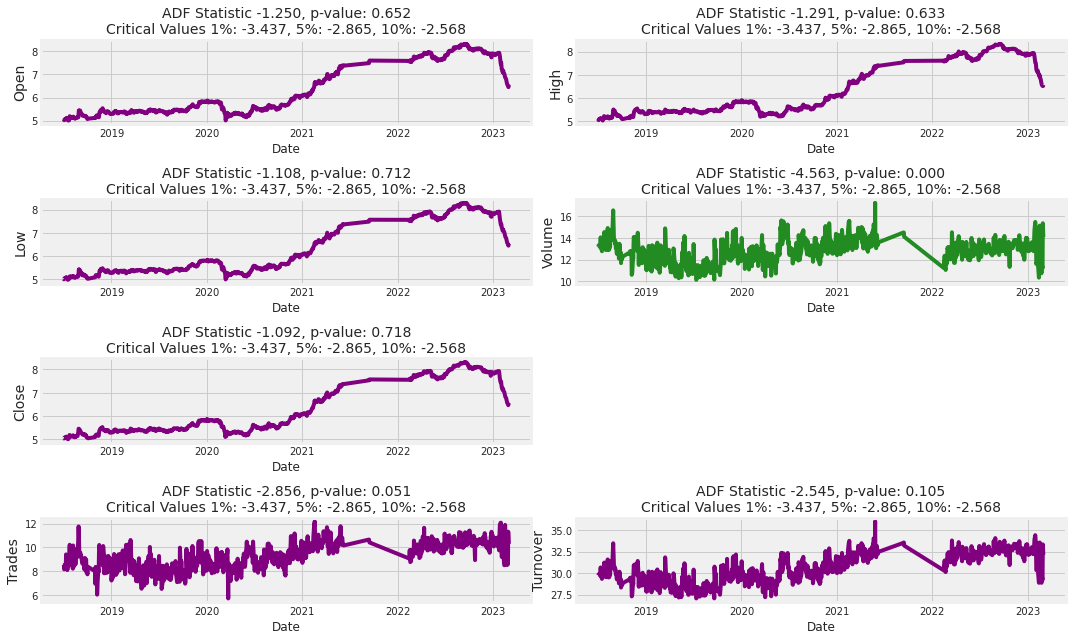

In [73]:
f, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=log_adanitrans.index, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(log_adanitrans['Open'].values, 'Open', ax[0, 0])
visualize_adfuller_results(log_adanitrans['High'].values, 'High', ax[0,1])
visualize_adfuller_results(log_adanitrans['Low'].values, 'Low', ax[1,0])
visualize_adfuller_results(log_adanitrans['Volume'].values, 'Volume', ax[1,1])
visualize_adfuller_results(log_adanitrans['Close'].values, 'Close', ax[2, 0])
visualize_adfuller_results(log_adanitrans['Turnover'].values, 'Turnover', ax[3, 1])
visualize_adfuller_results(log_adanitrans['Trades'].values, 'Trades', ax[3, 0])


f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

(-24.59688572910874, 0.0, 0, 971, {'1%': -3.437102493904439, '5%': -2.8645211564578115, '10%': -2.568357325328449}, -3759.636710204665)
Close


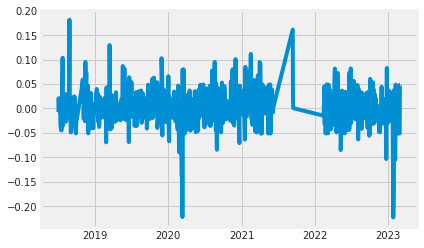

(-6.9891911559789035, 7.824658768142663e-10, 10, 961, {'1%': -3.4371729482129885, '5%': -2.8645522259969534, '10%': -2.568373874086242}, -3522.290243572679)
Open


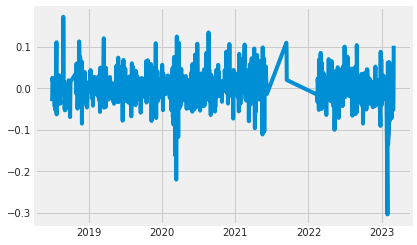

(-24.87019054261452, 0.0, 0, 971, {'1%': -3.437102493904439, '5%': -2.8645211564578115, '10%': -2.568357325328449}, -3687.863181853636)
Low


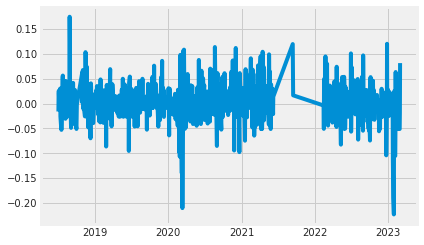

(-6.60250036945923, 6.681292441422265e-09, 12, 959, {'1%': -3.43718721587049, '5%': -2.8645585177815187, '10%': -2.568377225331392}, -3733.038455489698)
High


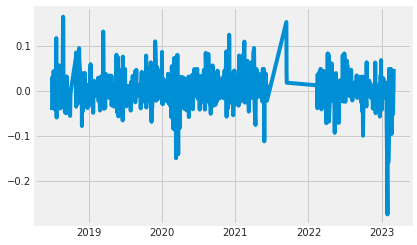

(-11.858801813146021, 6.925213642200925e-22, 13, 958, {'1%': -3.4371943720994165, '5%': -2.8645616735407002, '10%': -2.568378906211183}, 1722.31973260986)
Trades


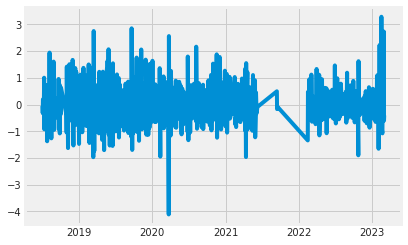

(-17.38140471539438, 5.070394249323641e-30, 6, 965, {'1%': -3.4371445907959832, '5%': -2.864539720789528, '10%': -2.5683672133480093}, 2121.254475272039)
Turnover


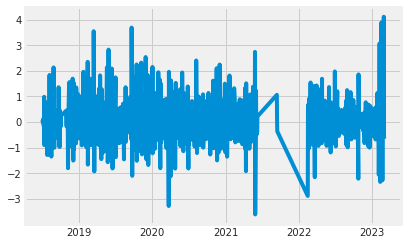

In [74]:
log_adanitrans["diff_adanitrans_close"] = log_adanitrans["Close"].diff(periods=1)
print(adfuller(log_adanitrans["diff_adanitrans_close"].dropna()))
print("Close")
plt.plot(log_adanitrans["diff_adanitrans_close"])
plt.show()

log_adanitrans["diff_adanitrans_Open"] = log_adanitrans["Open"].diff(periods=1)
print(adfuller(log_adanitrans["diff_adanitrans_Open"].dropna()))
print("Open")
plt.plot(log_adanitrans["diff_adanitrans_Open"])
plt.show()

log_adanitrans["diff_adanitrans_Low"] = log_adanitrans["Low"].diff(periods=1)
print(adfuller(log_adanitrans["diff_adanitrans_Low"].dropna()))
print("Low")
plt.plot(log_adanitrans["diff_adanitrans_Low"])
plt.show()

log_adanitrans["diff_adanitrans_High"] = log_adanitrans["High"].diff(periods=1)
print(adfuller(log_adanitrans["diff_adanitrans_High"].dropna()))
print("High")
plt.plot(log_adanitrans["diff_adanitrans_High"])
plt.show()

log_adanitrans["diff_adanitrans_Trades"] = log_adanitrans["Trades"].diff(periods=1)
print(adfuller(log_adanitrans["diff_adanitrans_Trades"].dropna()))
print("Trades")
plt.plot(log_adanitrans["diff_adanitrans_Trades"])
plt.show()

log_adanitrans["diff_adanitrans_Turnover"] = log_adanitrans["Turnover"].diff(periods=1)
print(adfuller(log_adanitrans["diff_adanitrans_Turnover"].dropna()))
print("Turnover")
plt.plot(log_adanitrans["diff_adanitrans_Turnover"])
plt.show()



In [75]:
print(log_reliance.head(1))
print(log_adanigreen.head(1))
print(log_adanitrans.head(1))

            Prev Close      Open      High       Low      Last     Close  \
Date                                                                       
2018-07-02    6.879819  6.879716  6.879716  6.863803  6.866985  6.867558   

               VWAP     Volume   Turnover     Trades  Deliverable Volume  \
Date                                                                       
2018-07-02  6.86916  15.711768  34.093848  11.336463           15.239949   

            %Deliverble  diff_reliance_close  diff_reliance_Open  \
Date                                                               
2018-07-02    -0.471765                  NaN                 NaN   

            diff_reliance_Low  diff_reliance_High  
Date                                               
2018-07-02                NaN                 NaN  
            Prev Close      Open      High       Low      Last     Close  \
Date                                                                       
2018-07-02    3.288402  3.303

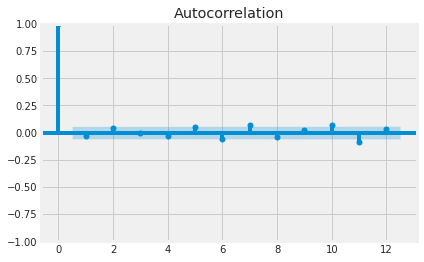

In [78]:
tsa_plots.plot_acf(log_reliance['diff_reliance_close'].dropna(),lags=12)
plt.show()

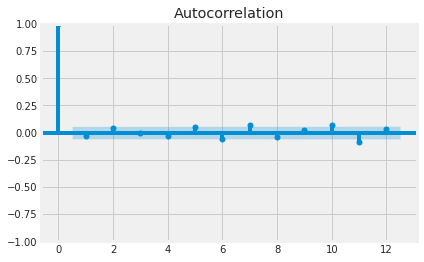

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



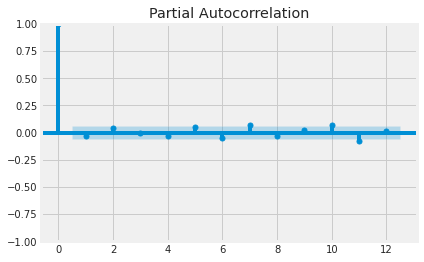

In [79]:
tsa_plots.plot_acf(log_reliance['diff_reliance_close'].dropna(),lags=12)
plt.show()

tsa_plots.plot_pacf(log_reliance['diff_reliance_close'].dropna(),lags=12)
plt.show()

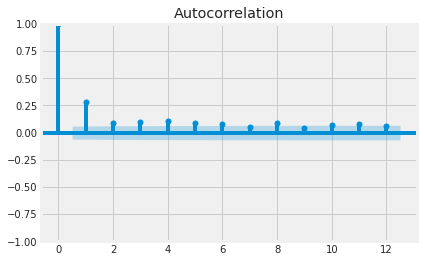

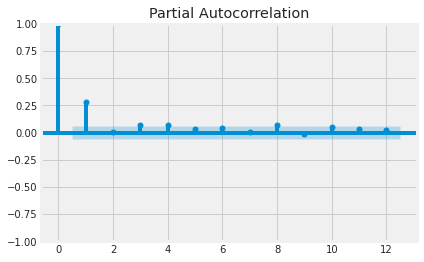

In [80]:
tsa_plots.plot_acf(log_adanigreen['diff_adanigreen_close'].dropna(),lags=12)
plt.show()

tsa_plots.plot_pacf(log_adanigreen['diff_adanigreen_close'].dropna(),lags=12)
plt.show()

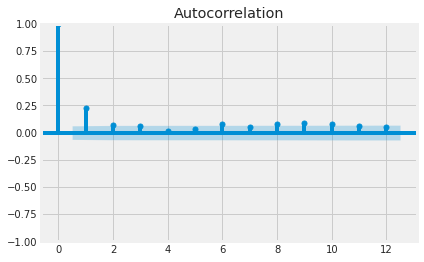

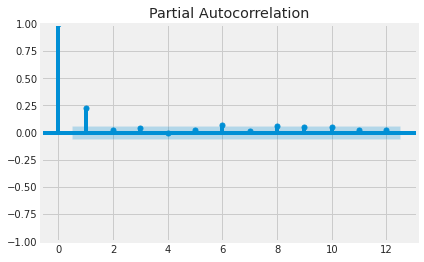

In [81]:
tsa_plots.plot_acf(log_adanitrans['diff_adanitrans_close'].dropna(),lags=12)
plt.show()

tsa_plots.plot_pacf(log_adanitrans['diff_adanitrans_close'].dropna(),lags=12)
plt.show()

In [82]:
m_r_data=log_reliance["diff_reliance_close"].dropna()
print("shape of new reliance data",m_r_data.shape)

m_ag_data=log_adanigreen["diff_adanigreen_close"].dropna()
print("shape of new adanigreen data",m_ag_data.shape)

m_at_data=log_adanitrans["diff_adanitrans_close"].dropna()
print("shape of new adanitrans data",m_at_data.shape)

shape of new reliance data (1157,)
shape of new adanigreen data (1092,)
shape of new adanitrans data (972,)


In [83]:
reliance_train_set, reliance_test_set= np.split(m_r_data, [int(.8 *len(m_r_data))])
reliance_train_set.to_csv("reliance_tain",header=False)
reliance_test_set.to_csv("reliance_validaton",header=False)
print(reliance_train_set.shape , reliance_test_set.shape)
reliance_train_set=reliance_train_set.values
reliance_test_set=reliance_test_set.values

adanigreen_train_set, adanigreen_test_set= np.split(m_ag_data, [int(.8 *len(m_ag_data))])
adanigreen_train_set.to_csv("adanigreen_train",header=False)
adanigreen_test_set.to_csv("adanigreen_validation",header=False)
print(adanigreen_train_set.shape , adanigreen_test_set.shape)
adanigreen_train_set=adanigreen_train_set.values
adanigreen_test_set=adanigreen_test_set.values

adanitrans_train_set, adanitrans_test_set= np.split(m_at_data, [int(.8 *len(m_at_data))])
adanitrans_train_set.to_csv("adanitrans_train",header=False)
adanitrans_test_set.to_csv("adanitrans_validation",header=False)
print(adanitrans_train_set.shape , adanitrans_test_set.shape)
adanitrans_train_set=adanitrans_train_set.values
adanitrans_test_set=adanitrans_test_set.values


(925,) (232,)
(873,) (219,)
(777,) (195,)


# ARIMA MODEL
## ARIMA for Reliance

In [86]:
# grid search ARIMA parameters for a time series
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE

def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # make predictions
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[i])
    
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [87]:
# evaluate combinations of p, d and q values for an ARIMA model

def evaluate_models(dataset, p_values, d_values, q_values):
    
    dataset = dataset.astype('float32')
    
    best_score, best_cfg = float('inf'), None
    
    for p,d,q in itertools.product(p_values, d_values, q_values):
    #for p in p_values:
    #    for d in d_values:
    #        for q in q_values:
    
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA %s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
train=reliance_train_set
p_values=range(0,4)
d_values=range(0,2)
q_values=range(0,4)
warnings.filterwarnings("ignore")
evaluate_models(train, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.018
ARIMA(0, 0, 1) RMSE=0.018
ARIMA(0, 0, 2) RMSE=0.018
ARIMA(0, 0, 3) RMSE=0.018
ARIMA(0, 1, 0) RMSE=0.024
ARIMA(0, 1, 1) RMSE=0.018
ARIMA(0, 1, 2) RMSE=0.018
ARIMA(0, 1, 3) RMSE=0.018
ARIMA(1, 0, 0) RMSE=0.018
ARIMA(1, 0, 1) RMSE=0.018
ARIMA(1, 0, 2) RMSE=0.018
ARIMA(1, 0, 3) RMSE=0.018
ARIMA(1, 1, 0) RMSE=0.022
ARIMA(1, 1, 1) RMSE=0.018
ARIMA(1, 1, 2) RMSE=0.018
ARIMA(1, 1, 3) RMSE=0.018
ARIMA(2, 0, 0) RMSE=0.018
ARIMA(2, 0, 1) RMSE=0.018
ARIMA(2, 0, 2) RMSE=0.018
ARIMA(2, 0, 3) RMSE=0.018
ARIMA(2, 1, 0) RMSE=0.021
ARIMA(2, 1, 1) RMSE=0.018
ARIMA(2, 1, 2) RMSE=0.018
ARIMA(3, 0, 0) RMSE=0.018
ARIMA(3, 0, 1) RMSE=0.018
ARIMA(3, 0, 2) RMSE=0.018
ARIMA(3, 0, 3) RMSE=0.018
ARIMA(3, 1, 0) RMSE=0.021
ARIMA(3, 1, 1) RMSE=0.018
ARIMA(3, 1, 2) RMSE=0.018
ARIMA(3, 1, 3) RMSE=0.018
Best ARIMA (0, 0, 0) RMSE=0.018


In [ ]:
train

array([ 1.10772912e-02,  1.91705677e-02, -2.61961158e-02,  1.34396091e-02,
        1.98016244e-02,  2.82795195e-02,  1.26908945e-02,  4.10684024e-02,
        1.59937419e-02, -2.16920270e-02,  1.48950207e-02,  1.83074741e-04,
        1.11951656e-02,  2.13126491e-02, -7.42572166e-03, -8.38100144e-03,
        3.77341987e-03, -4.04349549e-03,  1.71394510e-02,  1.88937127e-02,
        2.96077073e-02,  5.33984913e-03, -2.03336527e-02,  7.33384944e-03,
        1.32094512e-02, -7.06835659e-03,  2.78963924e-02,  2.05284011e-04,
       -1.13536715e-02, -1.37967823e-02,  1.90974407e-02, -8.12810314e-03,
        2.45368279e-03,  2.55483110e-02,  9.91104362e-03,  1.76826970e-02,
        6.32130729e-03,  1.08992905e-02,  2.10695402e-02, -1.89811301e-02,
       -1.53780306e-02, -2.60735727e-02, -1.01182667e-02,  1.03598515e-02,
       -1.21105593e-02,  2.76500495e-02,  1.35435141e-02, -1.79530952e-02,
       -1.45578156e-02,  1.18867354e-02,  5.18827462e-04, -2.19851133e-02,
       -7.16320781e-03, -

In [ ]:
# prepare data
X = train
X = X.astype('float32')

In [ ]:
# # fit model
model = ARIMA(X, order=(0,1,1))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 232)
forecast

array([0.00108575, 0.00108575, 0.00108575, 0.00108575, 0.00108575,
       0.00108575, 0.00108575, 0.00108575, 0.00108575, 0.00108575,
       0.00108575, 0.00108575, 0.00108575, 0.00108575, 0.00108575,
       0.00108575, 0.00108575, 0.00108575, 0.00108575, 0.00108575,
       0.00108575, 0.00108575, 0.00108575, 0.00108575, 0.00108575,
       0.00108575, 0.00108575, 0.00108575, 0.00108575, 0.00108575,
       0.00108575, 0.00108575, 0.00108575, 0.00108575, 0.00108575,
       0.00108575, 0.00108575, 0.00108575, 0.00108575, 0.00108575,
       0.00108575, 0.00108575, 0.00108575, 0.00108575, 0.00108575,
       0.00108575, 0.00108575, 0.00108575, 0.00108575, 0.00108575,
       0.00108575, 0.00108575, 0.00108575, 0.00108575, 0.00108575,
       0.00108575, 0.00108575, 0.00108575, 0.00108575, 0.00108575,
       0.00108575, 0.00108575, 0.00108575, 0.00108575, 0.00108575,
       0.00108575, 0.00108575, 0.00108575, 0.00108575, 0.00108575,
       0.00108575, 0.00108575, 0.00108575, 0.00108575, 0.00108

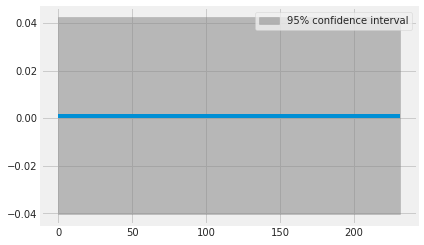

In [ ]:
# save finalized model to file
# load data
train = pd.read_csv("/content/reliance_tain", header=0, index_col=0, parse_dates=True)
train

# prepare data
X = train.values
X = X.astype('float32')

# # fit model
model = ARIMA(X, order=(0,0,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 232)
forecast

plot_predict(model_fit,1,232)
plt.show()

In [ ]:
#Error on the test data
val = pd.read_csv("/content/reliance_validaton", header=None)
val.columns=["Date","close"]
val.set_index("Date",inplace=True)
rmse = sqrt(mean_squared_error(val["close"], forecast))
rmse


0.015617244264468581

In [ ]:
r2_score(val["close"],forecast)
print("Accuracy of the model is :",100*r2_score(val["close"],forecast))

Accuracy of the model is : -1.043509463834602


## ARIMA for Adanitrans

In [ ]:
train=adanitrans_train_set
p_values=range(0,2)
d_values=range(0,2)
q_values=range(0,2)

In [ ]:
warnings.filterwarnings("ignore")
evaluate_models(train, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.036
ARIMA(0, 0, 1) RMSE=0.036
ARIMA(0, 1, 0) RMSE=0.046
ARIMA(0, 1, 1) RMSE=0.036
ARIMA(1, 0, 0) RMSE=0.036
ARIMA(1, 0, 1) RMSE=0.036
ARIMA(1, 1, 0) RMSE=0.041
ARIMA(1, 1, 1) RMSE=0.036
Best ARIMA (1, 0, 0) RMSE=0.036


For order (1,0,0)


In [ ]:
# save finalized model to file
# load data
train = pd.read_csv("/content/adanitrans_train", header=0, index_col=0, parse_dates=True)
train

-0.007133622988211741
2018-07-03                       
2018-07-04               0.020613
2018-07-05               0.014243
2018-07-06               0.007514
2018-07-09               0.007768
2018-07-10              -0.007144
...                           ...
2022-05-18              -0.007485
2022-05-19              -0.022267
2022-05-20               0.020084
2022-05-23              -0.049565
2022-05-24              -0.001228

[776 rows x 1 columns]

In [ ]:
# prepare data
X = train.values
X = X.astype('float32')

In [ ]:
# fit model
model = ARIMA(X, order=(1,0,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 195)
forecast

array([0.00260489, 0.00328201, 0.00340161, 0.00342274, 0.00342647,
       0.00342713, 0.00342725, 0.00342727, 0.00342727, 0.00342727,
       0.00342727, 0.00342727, 0.00342727, 0.00342727, 0.00342727,
       0.00342727, 0.00342727, 0.00342727, 0.00342727, 0.00342727,
       0.00342727, 0.00342727, 0.00342727, 0.00342727, 0.00342727,
       0.00342727, 0.00342727, 0.00342727, 0.00342727, 0.00342727,
       0.00342727, 0.00342727, 0.00342727, 0.00342727, 0.00342727,
       0.00342727, 0.00342727, 0.00342727, 0.00342727, 0.00342727,
       0.00342727, 0.00342727, 0.00342727, 0.00342727, 0.00342727,
       0.00342727, 0.00342727, 0.00342727, 0.00342727, 0.00342727,
       0.00342727, 0.00342727, 0.00342727, 0.00342727, 0.00342727,
       0.00342727, 0.00342727, 0.00342727, 0.00342727, 0.00342727,
       0.00342727, 0.00342727, 0.00342727, 0.00342727, 0.00342727,
       0.00342727, 0.00342727, 0.00342727, 0.00342727, 0.00342727,
       0.00342727, 0.00342727, 0.00342727, 0.00342727, 0.00342

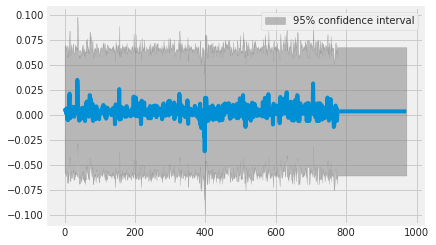

In [ ]:
plot_predict(model_fit,1,972)
plt.show()

In [ ]:
#Error on the test data
val = pd.read_csv("/content/adanitrans_validation", header=None)
val.columns=["Date","close"]
val.set_index("Date",inplace=True)
rmse = sqrt(mean_squared_error(val["close"], forecast))
rmse


0.039910440827223496

In [ ]:
r2_score(val["close"],forecast)
print("Accuracy of the model is :",100*r2_score(val["close"],forecast))

Accuracy of the model is : -5.619022138207863


# Adanigreen

For order (0,0,0)

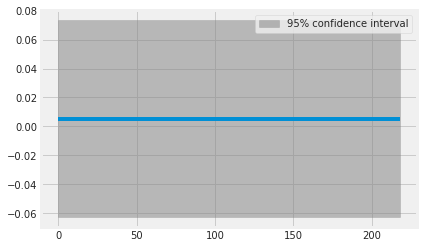

In [ ]:
# save finalized model to file
# load data
train = pd.read_csv("/content/adanigreen_train", header=0, index_col=0, parse_dates=True)
train

# prepare data
X = train.values
X = X.astype('float32')

# # fit model
model = ARIMA(X, order=(0,0,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 219)
forecast

from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,219)
plt.show()

In [ ]:
#Error on the test data
val = pd.read_csv("/content/adanigreen_validation", header=None)
val.columns=["Date","close"]
#val.rename(columns={"0":"Date","1":"close"},inplace=True)
val.set_index("Date",inplace=True)
rmse = sqrt(mean_squared_error(val["close"], forecast))
rmse


0.043499142138906835

# KNN MODEL 
## KNN for Reliance

In [103]:
reliance["month"] = reliance.Date.dt.month
reliance["week"] = reliance.Date.dt.isocalendar().week
reliance["day"] = reliance.Date.dt.isocalendar().day
reliance["day_of_week"] = reliance.Date.dt.dayofweek
reliance.drop(['Date'], axis=1, inplace=True)
reliance

Prev Close     Open     High      Low     Last    Close     VWAP  \
Date                                                                           
2018-07-02      972.45   972.35   972.35   957.00   960.05   960.60   962.14   
2018-07-03      960.60   965.00   978.45   960.35   972.20   971.30   972.10   
2018-07-04      971.30   971.80   992.00   971.00   991.00   990.10   982.92   
2018-07-05      990.10   997.00  1008.40   958.60   964.65   964.50   988.25   
2018-07-06      964.50   964.75   983.00   964.50   977.50   977.55   977.82   
...                ...      ...      ...      ...      ...      ...      ...   
2023-02-24     2367.50  2372.00  2396.15  2368.00  2387.90  2383.70  2381.54   
2023-02-27     2383.70  2382.00  2389.65  2351.70  2365.05  2367.85  2366.20   
2023-02-28     2367.85  2356.10  2367.00  2313.65  2319.95  2322.55  2333.98   
2023-03-01     2322.55  2344.00  2345.50  2323.25  2345.40  2343.90  2336.64   
2023-03-02     2343.90  2337.00  2351.65  2321.60  2329.40  2326.05  2333.58   

              Volume      Turnover  MA for 30 days  MA for 60 days  \
Date                                                                 
2018-07-02   6660916  6.408702e+14             NaN             NaN   
2018-07-03   5067261  4.925884e+14             NaN             NaN   
2018-07-04   5000724  4.915326e+14             NaN             NaN   
2018-07-05  18719353  1.849940e+15             NaN             NaN   
2018-07-06   9161266  8.958075e+14             NaN             NaN   
...              ...           ...             ...             ...   
2023-02-24   4353814  1.036880e+15     2389.991667     2485.760833   
2023-02-27   5168667  1.223009e+15     2386.666667     2479.855833   
2023-02-28  10150245  2.369044e+15     2382.615000     2473.857500   
2023-03-01   5330852  1.245628e+15     2378.118333     2468.085833   
2023-03-02   4307425  1.005173e+15     2373.163333     2462.678333   

            MA for 90 days  Daily Return  month  week  day  day_of_week  
Date                                                                     
2018-07-02             NaN           NaN      7    27    1            0  
2018-07-03             NaN     -0.012186      7    27    2            1  
2018-07-04             NaN      0.011139      7    27    3            2  
2018-07-05             NaN      0.019356      7    27    4            3  
2018-07-06             NaN     -0.025856      7    27    5            4  
...                    ...           ...    ...   ...  ...          ...  
2023-02-24     2516.198333     -0.004792      2     8    5            4  
2023-02-27     2514.797778      0.006843      2     9    1            0  
2023-02-28     2512.819444     -0.006649      2     9    2            1  
2023-03-01     2511.400556     -0.019131      3     9    3            2  
2023-03-02     2509.691667      0.009192      3     9    4            3  

[1158 rows x 17 columns]

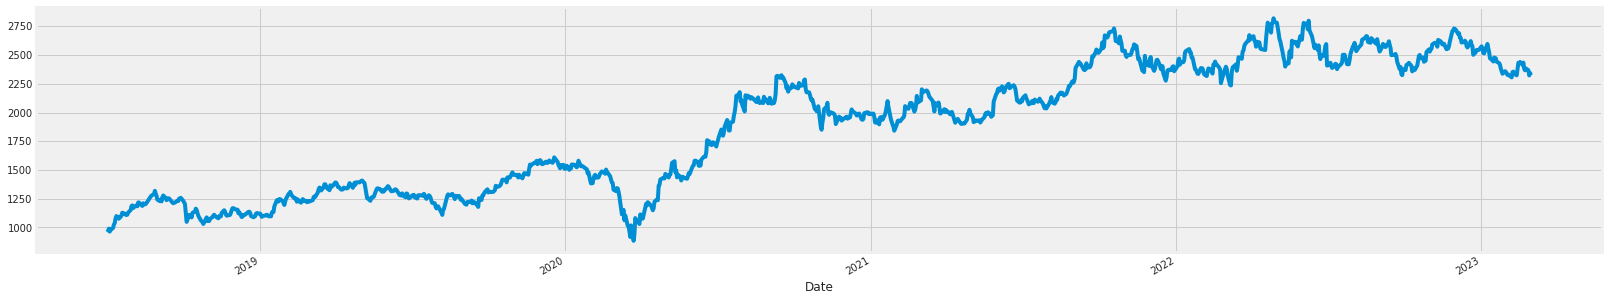

In [104]:
reliance.Close.plot(figsize=(25, 5))
plt.show()

<ipython-input-105-3ff6bec25867>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




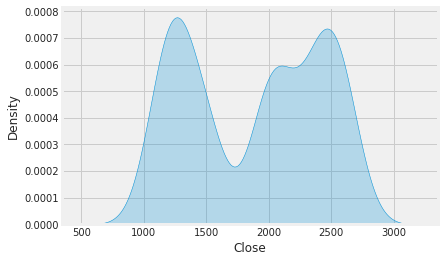

In [105]:
sns.kdeplot(reliance.Close, shade=True)
plt.show()

In [107]:
indx = reliance.index
cols = reliance.columns
(indx, cols)

(DatetimeIndex(['2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05',
                '2018-07-06', '2018-07-09', '2018-07-10', '2018-07-11',
                '2018-07-12', '2018-07-13',
                ...
                '2023-02-17', '2023-02-20', '2023-02-21', '2023-02-22',
                '2023-02-23', '2023-02-24', '2023-02-27', '2023-02-28',
                '2023-03-01', '2023-03-02'],
               dtype='datetime64[ns]', name='Date', length=1158, freq=None),
 Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume',
        'Turnover', 'MA for 30 days', 'MA for 60 days', 'MA for 90 days',
        'Daily Return', 'month', 'week', 'day', 'day_of_week'],
       dtype='object'))

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(reliance)
data = pd.DataFrame(data, index=indx, columns=cols)
reliance= data
reliance

Prev Close      Open      High       Low      Last     Close  \
Date                                                                       
2018-07-02    0.045666  0.028944  0.011725  0.042582  0.035982  0.039544   
2018-07-03    0.039544  0.025155  0.014925  0.044335  0.042314  0.045072   
2018-07-04    0.045072  0.028661  0.022034  0.049910  0.052110  0.054784   
2018-07-05    0.054784  0.041651  0.030638  0.043419  0.038379  0.041559   
2018-07-06    0.041559  0.025026  0.017312  0.046507  0.045076  0.048300   
...                ...       ...       ...       ...       ...       ...   
2023-02-24    0.766324  0.750432  0.758676  0.781151  0.780042  0.774693   
2023-02-27    0.774693  0.755586  0.755266  0.772619  0.768134  0.766505   
2023-02-28    0.766505  0.742236  0.743383  0.752702  0.744633  0.743104   
2023-03-01    0.743104  0.735998  0.732104  0.757727  0.757895  0.754133   
2023-03-02    0.754133  0.732390  0.735330  0.756864  0.749557  0.744912   

                VWAP    Volume  Turnover  MA for 30 days  MA for 60 days  \
Date                                                                       
2018-07-02  0.032641  0.091145  0.034148             NaN             NaN   
2018-07-03  0.037816  0.066416  0.023986             NaN             NaN   
2018-07-04  0.043438  0.065384  0.023914             NaN             NaN   
2018-07-05  0.046207  0.278261  0.117008             NaN             NaN   
2018-07-06  0.040788  0.129944  0.051619             NaN             NaN   
...              ...       ...       ...             ...             ...   
2023-02-24  0.770148  0.055345  0.061287        0.828289        0.904285   
2023-02-27  0.762178  0.067990  0.074043        0.826169        0.900413   
2023-02-28  0.745437  0.145291  0.152583        0.823587        0.896479   
2023-03-01  0.746819  0.070506  0.075593        0.820720        0.892695   
2023-03-02  0.745229  0.054625  0.059114        0.817562        0.889149   

            MA for 90 days  Daily Return     month      week       day  \
Date                                                                     
2018-07-02             NaN           NaN  0.545455  0.500000  0.000000   
2018-07-03             NaN      0.428220  0.545455  0.500000  0.166667   
2018-07-04             NaN      0.511905  0.545455  0.500000  0.333333   
2018-07-05             NaN      0.541385  0.545455  0.500000  0.500000   
2018-07-06             NaN      0.379173  0.545455  0.500000  0.666667   
...                    ...           ...       ...       ...       ...   
2023-02-24        0.958648      0.454747  0.090909  0.134615  0.666667   
2023-02-27        0.957677      0.496491  0.090909  0.153846  0.000000   
2023-02-28        0.956307      0.448084  0.090909  0.153846  0.166667   
2023-03-01        0.955324      0.403300  0.181818  0.153846  0.333333   
2023-03-02        0.954140      0.504921  0.181818  0.153846  0.500000   

            day_of_week  
Date                     
2018-07-02     0.000000  
2018-07-03     0.166667  
2018-07-04     0.333333  
2018-07-05     0.500000  
2018-07-06     0.666667  
...                 ...  
2023-02-24     0.666667  
2023-02-27     0.000000  
2023-02-28     0.166667  
2023-03-01     0.333333  
2023-03-02     0.500000  

[1158 rows x 17 columns]

In [109]:
# y = df['VWAP']
# y.index = indx
# df.drop(['VWAP'], axis=1, inplace=True)
y = reliance['Close']
y.index = indx
reliance.drop(['VWAP', 'Prev Close'], axis=1, inplace=True)
reliance

Open      High       Low      Last     Close    Volume  \
Date                                                                     
2018-07-02  0.028944  0.011725  0.042582  0.035982  0.039544  0.091145   
2018-07-03  0.025155  0.014925  0.044335  0.042314  0.045072  0.066416   
2018-07-04  0.028661  0.022034  0.049910  0.052110  0.054784  0.065384   
2018-07-05  0.041651  0.030638  0.043419  0.038379  0.041559  0.278261   
2018-07-06  0.025026  0.017312  0.046507  0.045076  0.048300  0.129944   
...              ...       ...       ...       ...       ...       ...   
2023-02-24  0.750432  0.758676  0.781151  0.780042  0.774693  0.055345   
2023-02-27  0.755586  0.755266  0.772619  0.768134  0.766505  0.067990   
2023-02-28  0.742236  0.743383  0.752702  0.744633  0.743104  0.145291   
2023-03-01  0.735998  0.732104  0.757727  0.757895  0.754133  0.070506   
2023-03-02  0.732390  0.735330  0.756864  0.749557  0.744912  0.054625   

            Turnover  MA for 30 days  MA for 60 days  MA for 90 days  \
Date                                                                   
2018-07-02  0.034148             NaN             NaN             NaN   
2018-07-03  0.023986             NaN             NaN             NaN   
2018-07-04  0.023914             NaN             NaN             NaN   
2018-07-05  0.117008             NaN             NaN             NaN   
2018-07-06  0.051619             NaN             NaN             NaN   
...              ...             ...             ...             ...   
2023-02-24  0.061287        0.828289        0.904285        0.958648   
2023-02-27  0.074043        0.826169        0.900413        0.957677   
2023-02-28  0.152583        0.823587        0.896479        0.956307   
2023-03-01  0.075593        0.820720        0.892695        0.955324   
2023-03-02  0.059114        0.817562        0.889149        0.954140   

            Daily Return     month      week       day  day_of_week  
Date                                                                 
2018-07-02           NaN  0.545455  0.500000  0.000000     0.000000  
2018-07-03      0.428220  0.545455  0.500000  0.166667     0.166667  
2018-07-04      0.511905  0.545455  0.500000  0.333333     0.333333  
2018-07-05      0.541385  0.545455  0.500000  0.500000     0.500000  
2018-07-06      0.379173  0.545455  0.500000  0.666667     0.666667  
...                  ...       ...       ...       ...          ...  
2023-02-24      0.454747  0.090909  0.134615  0.666667     0.666667  
2023-02-27      0.496491  0.090909  0.153846  0.000000     0.000000  
2023-02-28      0.448084  0.090909  0.153846  0.166667     0.166667  
2023-03-01      0.403300  0.181818  0.153846  0.333333     0.333333  
2023-03-02      0.504921  0.181818  0.153846  0.500000     0.500000  

[1158 rows x 15 columns]

In [110]:
reliance.drop(['MA for 30 days', 'MA for 60 days','MA for 90 days','Daily Return'], axis=1, inplace=True)
reliance

Open      High       Low      Last     Close    Volume  \
Date                                                                     
2018-07-02  0.028944  0.011725  0.042582  0.035982  0.039544  0.091145   
2018-07-03  0.025155  0.014925  0.044335  0.042314  0.045072  0.066416   
2018-07-04  0.028661  0.022034  0.049910  0.052110  0.054784  0.065384   
2018-07-05  0.041651  0.030638  0.043419  0.038379  0.041559  0.278261   
2018-07-06  0.025026  0.017312  0.046507  0.045076  0.048300  0.129944   
...              ...       ...       ...       ...       ...       ...   
2023-02-24  0.750432  0.758676  0.781151  0.780042  0.774693  0.055345   
2023-02-27  0.755586  0.755266  0.772619  0.768134  0.766505  0.067990   
2023-02-28  0.742236  0.743383  0.752702  0.744633  0.743104  0.145291   
2023-03-01  0.735998  0.732104  0.757727  0.757895  0.754133  0.070506   
2023-03-02  0.732390  0.735330  0.756864  0.749557  0.744912  0.054625   

            Turnover     month      week       day  day_of_week  
Date                                                             
2018-07-02  0.034148  0.545455  0.500000  0.000000     0.000000  
2018-07-03  0.023986  0.545455  0.500000  0.166667     0.166667  
2018-07-04  0.023914  0.545455  0.500000  0.333333     0.333333  
2018-07-05  0.117008  0.545455  0.500000  0.500000     0.500000  
2018-07-06  0.051619  0.545455  0.500000  0.666667     0.666667  
...              ...       ...       ...       ...          ...  
2023-02-24  0.061287  0.090909  0.134615  0.666667     0.666667  
2023-02-27  0.074043  0.090909  0.153846  0.000000     0.000000  
2023-02-28  0.152583  0.090909  0.153846  0.166667     0.166667  
2023-03-01  0.075593  0.181818  0.153846  0.333333     0.333333  
2023-03-02  0.059114  0.181818  0.153846  0.500000     0.500000  

[1158 rows x 11 columns]

In [111]:
X = reliance
X

Open      High       Low      Last     Close    Volume  \
Date                                                                     
2018-07-02  0.028944  0.011725  0.042582  0.035982  0.039544  0.091145   
2018-07-03  0.025155  0.014925  0.044335  0.042314  0.045072  0.066416   
2018-07-04  0.028661  0.022034  0.049910  0.052110  0.054784  0.065384   
2018-07-05  0.041651  0.030638  0.043419  0.038379  0.041559  0.278261   
2018-07-06  0.025026  0.017312  0.046507  0.045076  0.048300  0.129944   
...              ...       ...       ...       ...       ...       ...   
2023-02-24  0.750432  0.758676  0.781151  0.780042  0.774693  0.055345   
2023-02-27  0.755586  0.755266  0.772619  0.768134  0.766505  0.067990   
2023-02-28  0.742236  0.743383  0.752702  0.744633  0.743104  0.145291   
2023-03-01  0.735998  0.732104  0.757727  0.757895  0.754133  0.070506   
2023-03-02  0.732390  0.735330  0.756864  0.749557  0.744912  0.054625   

            Turnover     month      week       day  day_of_week  
Date                                                             
2018-07-02  0.034148  0.545455  0.500000  0.000000     0.000000  
2018-07-03  0.023986  0.545455  0.500000  0.166667     0.166667  
2018-07-04  0.023914  0.545455  0.500000  0.333333     0.333333  
2018-07-05  0.117008  0.545455  0.500000  0.500000     0.500000  
2018-07-06  0.051619  0.545455  0.500000  0.666667     0.666667  
...              ...       ...       ...       ...          ...  
2023-02-24  0.061287  0.090909  0.134615  0.666667     0.666667  
2023-02-27  0.074043  0.090909  0.153846  0.000000     0.000000  
2023-02-28  0.152583  0.090909  0.153846  0.166667     0.166667  
2023-03-01  0.075593  0.181818  0.153846  0.333333     0.333333  
2023-03-02  0.059114  0.181818  0.153846  0.500000     0.500000  

[1158 rows x 11 columns]

In [112]:
cut = int(len(X)*0.8)

X_train = X[:cut]
X_test = X[cut:]
y_train = y[:cut]
y_test = y[cut:]
(X_test, y_test)

(                Open      High       Low      Last     Close    Volume  \
 Date                                                                     
 2022-03-30  0.888528  0.911786  0.911539  0.921157  0.924114  0.101016   
 2022-03-31  0.901441  0.902185  0.917559  0.909328  0.904381  0.082484   
 2022-04-01  0.886518  0.899798  0.914104  0.922355  0.915281  0.044523   
 2022-04-04  0.896544  0.904966  0.924390  0.922173  0.919336  0.044568   
 2022-04-05  0.894301  0.902290  0.913424  0.904117  0.899886  0.081955   
 ...              ...       ...       ...       ...       ...       ...   
 2023-02-24  0.750432  0.758676  0.781151  0.780042  0.774693  0.055345   
 2023-02-27  0.755586  0.755266  0.772619  0.768134  0.766505  0.067990   
 2023-02-28  0.742236  0.743383  0.752702  0.744633  0.743104  0.145291   
 2023-03-01  0.735998  0.732104  0.757727  0.757895  0.754133  0.070506   
 2023-03-02  0.732390  0.735330  0.756864  0.749557  0.744912  0.054625   
 
             Turnover  

In [113]:
print(X_train.shape)
print(X_test.shape)

(926, 11)
(232, 11)


In [115]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [116]:
y_pred = knn.predict(X_test)
y_pred

array([0.83532906, 0.8246074 , 0.81291197, 0.82206581, 0.82925922,
       0.8206013 , 0.81374625, 0.80849003, 0.81582033, 0.8231403 ,
       0.8206013 , 0.7996668 , 0.82209164, 0.83532906, 0.83276681,
       0.81709887, 0.82842752, 0.83000052, 0.83532906, 0.83276681,
       0.82793419, 0.83676   , 0.82050315, 0.81465027, 0.80355667,
       0.79007645, 0.7954799 , 0.75734838, 0.75454851, 0.7630747 ,
       0.74677136, 0.7954799 , 0.80780814, 0.78195578, 0.79230292,
       0.79007645, 0.8060311 , 0.82050315, 0.80489203, 0.78386972,
       0.79007645, 0.73860161, 0.8222647 , 0.82593243, 0.84698316,
       0.8778412 , 0.8781899 , 0.87268829, 0.86719702, 0.85386145,
       0.8442866 , 0.81140614, 0.80009298, 0.80809743, 0.78034404,
       0.7706168 , 0.79489617, 0.75082137, 0.76952423, 0.73911045,
       0.76294039, 0.7761029 , 0.76329166, 0.79668096, 0.67503099,
       0.71634208, 0.75525881, 0.72254882, 0.74668612, 0.7195139 ,
       0.72338826, 0.73447929, 0.71470193, 0.74668612, 0.70836

<ipython-input-117-d65662b3caca>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-117-d65662b3caca>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='Close', ylabel='Density'>

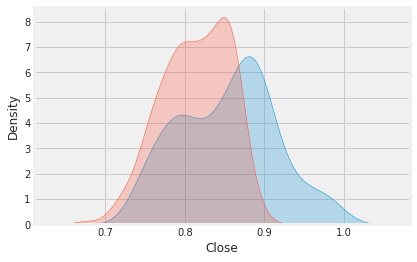

In [117]:
sns.kdeplot(y_test, shade=True)
sns.kdeplot(y_pred, shade=True)

In [118]:
np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))

0.059237315141841086

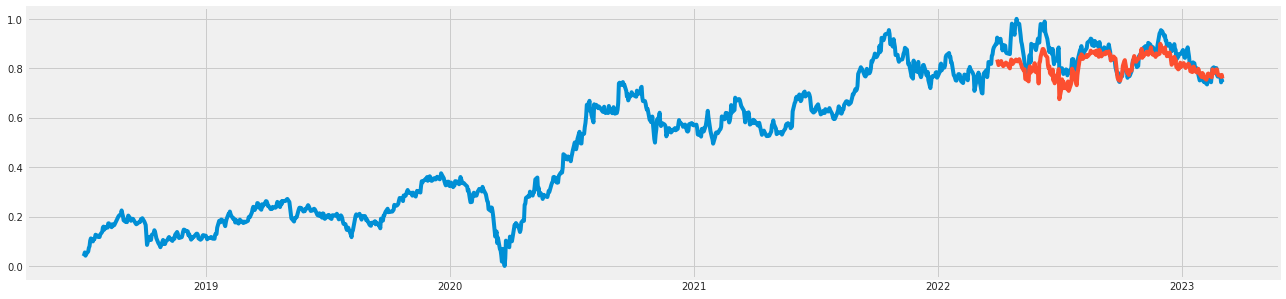

In [119]:
plt.figure(figsize=(20, 5))
plt.plot(y)
plt.plot(y_test.index, y_pred)
plt.show()

In [120]:
from sklearn.metrics.pairwise import euclidean_distances
euc_l = euclidean_distances(X_test, X_train)
euc_l

array([[2.07486517, 2.02934229, 2.00006996, ..., 0.47772701, 0.47880502,
        0.25244811],
       [2.130646  , 2.05932909, 2.00307945, ..., 0.24512073, 0.70941345,
        0.47484555],
       [2.20786144, 2.11224426, 2.03016773, ..., 0.13096909, 0.94831165,
        0.71371477],
       ...,
       [1.71595712, 1.6959752 , 1.69757287, ..., 0.7796266 , 0.43377828,
        0.38017609],
       [1.74313467, 1.68928516, 1.65755948, ..., 0.56077271, 0.57357003,
        0.41425574],
       [1.81366544, 1.7298784 , 1.66597826, ..., 0.39365847, 0.78245702,
        0.58589212]])

In [121]:
euclidean_distances(X_test[1:2], X_train[2:3])[0][0]

2.0030794542105874

In [122]:
print(X_test.shape)
print(X_train.shape)
print(euc_l.shape)

(232, 11)
(926, 11)
(232, 926)


In [123]:
def get_val(x_train, test_r, y_test, n_neighbors):
    distances = []
    for i in range(len(x_train)):
        dist = euclidean_distances([test_r], [x_train[i]] )[0][0]
        distances.append((i, dist))
    distances.sort(key=lambda tup: tup[1])
    v = 0
    for i in range(n_neighbors):
        v += y_test[distances[i][0]]
    return v/n_neighbors

In [124]:
y_pred = []
for i in X_test.values:
    y_pred.append(get_val(X_train.values, i, y_train, 2))
y_pred

[0.8765497468746772,
 0.8503590246926336,
 0.8798429589833662,
 0.8578494679202397,
 0.8744705031511522,
 0.8765497468746772,
 0.8503590246926336,
 0.8798429589833662,
 0.8578494679202397,
 0.8744705031511522,
 0.8199323277198057,
 0.8578494679202397,
 0.8744705031511522,
 0.8765497468746772,
 0.8798429589833662,
 0.8798429589833662,
 0.8979233391879328,
 0.8979233391879328,
 0.8765497468746772,
 0.8798429589833662,
 0.8798429589833662,
 0.8979233391879328,
 0.8765497468746772,
 0.8798429589833662,
 0.8798429589833662,
 0.8578494679202397,
 0.8075472672796777,
 0.8199323277198057,
 0.7550495918999897,
 0.8334796983159418,
 0.8053905362124187,
 0.8744705031511522,
 0.8199323277198057,
 0.8503590246926336,
 0.8798429589833662,
 0.8578494679202397,
 0.8744705031511522,
 0.8765497468746772,
 0.8503590246926336,
 0.8798429589833662,
 0.8578494679202397,
 0.7595696869511314,
 0.8765497468746772,
 0.8798429589833662,
 0.8798429589833662,
 0.8979233391879328,
 0.8979233391879328,
 0.8765497468

In [127]:
num_folds = 10
kfold = KFold(n_splits=10)

In [128]:
model = KNeighborsRegressor(n_neighbors=17)
results = cross_val_score(model, X, y, cv=kfold)

In [129]:
print(results.mean())

-0.11998561901886036


# Grid Search for Algorithm Tuning

In [132]:
array = reliance.values
X = array[:, 0:-1]
Y = array[:, -1]

In [133]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [134]:
model = KNeighborsRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [135]:
print(grid.best_score_)
print(grid.best_params_)

0.33371024892839296
{'n_neighbors': 6}


# Visualizing the CV results

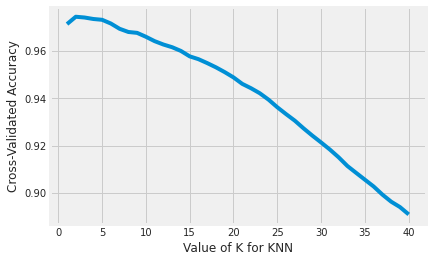

In [136]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [137]:
close_df=pd.DataFrame(reliance['Close'])
close_df

Close
Date                
2018-07-02  0.039544
2018-07-03  0.045072
2018-07-04  0.054784
2018-07-05  0.041559
2018-07-06  0.048300
...              ...
2023-02-24  0.774693
2023-02-27  0.766505
2023-02-28  0.743104
2023-03-01  0.754133
2023-03-02  0.744912

[1158 rows x 1 columns]

In [138]:
close_df=close_df.reset_index()

In [139]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(1158, 1)


In [140]:
training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (926, 1)
test_data:  (232, 1)


In [141]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [142]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (915, 10)
y_train:  (915,)
X_test:  (221, 10)
y_test (221,)


In [143]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [144]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (915, 1)
Test data prediction: (221, 1)


In [145]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [147]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.02024470667508669
Train data MSE:  0.00040984814836029956
Test data MAE:  0.014456806663290531
-------------------------------------------------------------------------------------
Test data RMSE:  0.02908107217230301
Test data MSE:  0.0008457087586906966
Test data MAE:  0.022541547474847583


In [148]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.993326467205075
Test data explained variance regression score: 0.7786066768171006


In [149]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.9933260514563073
Test data R2 score: 0.7723860294955458


In [150]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  font_size=15, font_color='white',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1158, 1)
Test predicted data:  (1158, 1)


In [151]:

x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 365
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  365


In [152]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  font_size=15, font_color='white',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## KNN for ADANIGREENS

In [153]:
# Printing the dataframe
adanigreen.reset_index(level=0, inplace=True)
adanigreen

Date      Symbol Series  Prev Close    Open    High     Low  \
0     2018-07-02  ADANIGREEN     EQ       26.80   27.20   27.25   22.80   
1     2018-07-03  ADANIGREEN     EQ       25.20   26.95   26.95   24.50   
2     2018-07-04  ADANIGREEN     EQ       26.35   26.00   29.95   25.80   
3     2018-07-05  ADANIGREEN     EQ       29.60   29.80   31.95   28.60   
4     2018-07-06  ADANIGREEN     EQ       29.80   29.00   30.90   28.85   
...          ...         ...    ...         ...     ...     ...     ...   
1088  2023-02-24  ADANIGREEN     EQ      512.10  486.50  510.00  486.50   
1089  2023-02-27  ADANIGREEN     EQ      486.50  468.00  474.30  462.20   
1090  2023-02-28  ADANIGREEN     EQ      462.20  439.10  485.30  439.10   
1091  2023-03-01  ADANIGREEN     EQ      485.30  509.00  509.55  501.90   
1092  2023-03-02  ADANIGREEN     EQ      509.55  535.00  535.00  535.00   

        Last   Close    VWAP   Volume      Turnover  Trades  \
0      25.40   25.20   24.94  1369795  3.415722e+12    5274   
1      26.60   26.35   25.82   519628  1.341658e+12    3205   
2      29.80   29.60   28.10  1033451  2.903786e+12    6363   
3      29.75   29.80   30.54  1546192  4.722083e+12    6516   
4      30.45   30.35   30.32   523472  1.587208e+12    3042   
...      ...     ...     ...      ...           ...     ...   
1088  486.50  486.50  488.07  1417656  6.919207e+13   25644   
1089  462.20  462.20  464.71  1064159  4.945267e+13   23135   
1090  485.30  485.30  465.50  8613869  4.009739e+14  133312   
1091  509.55  509.55  508.94   387360  1.971434e+13    5319   
1092  535.00  535.00  535.00   206751  1.106118e+13    3563   

      Deliverable Volume  %Deliverble company_name  MA for 30 days  \
0                1032401       0.7537   ADANIGREEN             NaN   
1                 419282       0.8069   ADANIGREEN             NaN   
2                 592525       0.5733   ADANIGREEN             NaN   
3                 942016       0.6092   ADANIGREEN             NaN   
4                 308139       0.5886   ADANIGREEN             NaN   
...                  ...          ...          ...             ...   
1088              673748       0.4753   ADANIGREEN     1162.261667   
1089              493862       0.4641   ADANIGREEN     1113.813333   
1090             2771307       0.3217   ADANIGREEN     1060.330000   
1091              288821       0.7456   ADANIGREEN     1005.110000   
1092              206546       0.9990   ADANIGREEN      953.046667   

      MA for 60 days  MA for 90 days  Daily Return  
0                NaN             NaN           NaN  
1                NaN             NaN     -0.059701  
2                NaN             NaN      0.045635  
3                NaN             NaN      0.123340  
4                NaN             NaN      0.006757  
...              ...             ...           ...  
1088     1560.140000     1741.467778     -0.049995  
1089     1533.471667     1723.050000     -0.049990  
1090     1507.525000     1704.676667     -0.049949  
1091     1481.629167     1686.946111      0.049978  
1092     1456.667500     1669.321111      0.049969  

[1093 rows x 20 columns]

In [154]:
adanigreen['Date'] = pd.to_datetime(adanigreen.Date,format='%Y-%m-%d')
adanigreen.set_index("Date", drop=False, inplace=True)
adanigreen.drop(["Series","Symbol","Trades","Deliverable Volume","%Deliverble"], axis=1, inplace=True)
adanigreen

Date  Prev Close    Open    High     Low    Last   Close  \
Date                                                                        
2018-07-02 2018-07-02       26.80   27.20   27.25   22.80   25.40   25.20   
2018-07-03 2018-07-03       25.20   26.95   26.95   24.50   26.60   26.35   
2018-07-04 2018-07-04       26.35   26.00   29.95   25.80   29.80   29.60   
2018-07-05 2018-07-05       29.60   29.80   31.95   28.60   29.75   29.80   
2018-07-06 2018-07-06       29.80   29.00   30.90   28.85   30.45   30.35   
...               ...         ...     ...     ...     ...     ...     ...   
2023-02-24 2023-02-24      512.10  486.50  510.00  486.50  486.50  486.50   
2023-02-27 2023-02-27      486.50  468.00  474.30  462.20  462.20  462.20   
2023-02-28 2023-02-28      462.20  439.10  485.30  439.10  485.30  485.30   
2023-03-01 2023-03-01      485.30  509.00  509.55  501.90  509.55  509.55   
2023-03-02 2023-03-02      509.55  535.00  535.00  535.00  535.00  535.00   

              VWAP   Volume      Turnover company_name  MA for 30 days  \
Date                                                                     
2018-07-02   24.94  1369795  3.415722e+12   ADANIGREEN             NaN   
2018-07-03   25.82   519628  1.341658e+12   ADANIGREEN             NaN   
2018-07-04   28.10  1033451  2.903786e+12   ADANIGREEN             NaN   
2018-07-05   30.54  1546192  4.722083e+12   ADANIGREEN             NaN   
2018-07-06   30.32   523472  1.587208e+12   ADANIGREEN             NaN   
...            ...      ...           ...          ...             ...   
2023-02-24  488.07  1417656  6.919207e+13   ADANIGREEN     1162.261667   
2023-02-27  464.71  1064159  4.945267e+13   ADANIGREEN     1113.813333   
2023-02-28  465.50  8613869  4.009739e+14   ADANIGREEN     1060.330000   
2023-03-01  508.94   387360  1.971434e+13   ADANIGREEN     1005.110000   
2023-03-02  535.00   206751  1.106118e+13   ADANIGREEN      953.046667   

            MA for 60 days  MA for 90 days  Daily Return  
Date                                                      
2018-07-02             NaN             NaN           NaN  
2018-07-03             NaN             NaN     -0.059701  
2018-07-04             NaN             NaN      0.045635  
2018-07-05             NaN             NaN      0.123340  
2018-07-06             NaN             NaN      0.006757  
...                    ...             ...           ...  
2023-02-24     1560.140000     1741.467778     -0.049995  
2023-02-27     1533.471667     1723.050000     -0.049990  
2023-02-28     1507.525000     1704.676667     -0.049949  
2023-03-01     1481.629167     1686.946111      0.049978  
2023-03-02     1456.667500     1669.321111      0.049969  

[1093 rows x 15 columns]

In [157]:
adanigreen.drop(["company_name"], axis=1, inplace=True)

In [155]:
adanigreen.drop(['MA for 30 days', 'MA for 60 days','MA for 90 days','Daily Return'], axis=1, inplace=True)

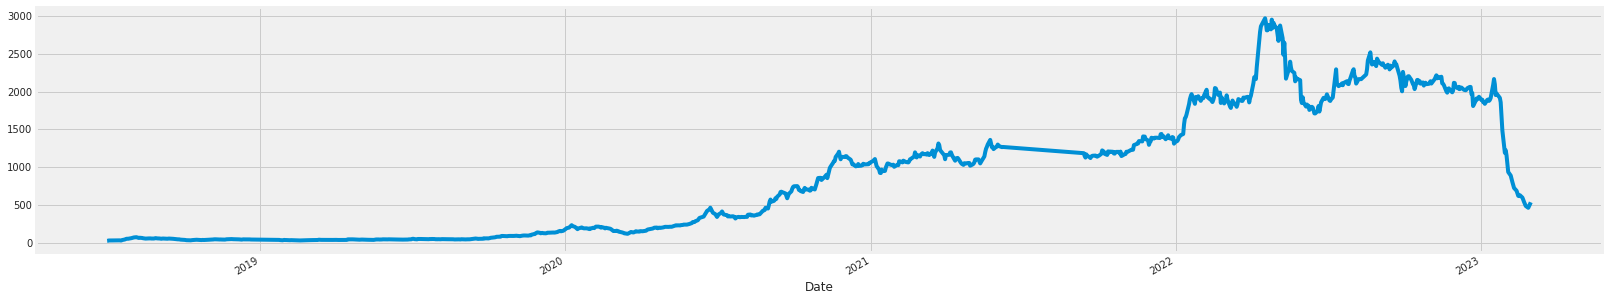

In [158]:
adanigreen.Close.plot(figsize=(25, 5))
plt.show()

<ipython-input-159-e034cf2cbde4>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




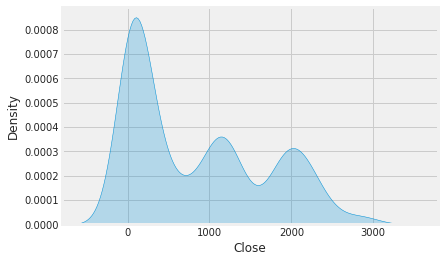

In [159]:
sns.kdeplot(adanigreen.Close, shade=True)
plt.show()

In [160]:
adanigreen["month"] = adanigreen.Date.dt.month
adanigreen["week"] = adanigreen.Date.dt.isocalendar().week
adanigreen["day"] = adanigreen.Date.dt.isocalendar().day
adanigreen["day_of_week"] = adanigreen.Date.dt.dayofweek
adanigreen.drop(['Date'], axis=1, inplace=True)
adanigreen

Prev Close    Open    High     Low    Last   Close    VWAP  \
Date                                                                     
2018-07-02       26.80   27.20   27.25   22.80   25.40   25.20   24.94   
2018-07-03       25.20   26.95   26.95   24.50   26.60   26.35   25.82   
2018-07-04       26.35   26.00   29.95   25.80   29.80   29.60   28.10   
2018-07-05       29.60   29.80   31.95   28.60   29.75   29.80   30.54   
2018-07-06       29.80   29.00   30.90   28.85   30.45   30.35   30.32   
...                ...     ...     ...     ...     ...     ...     ...   
2023-02-24      512.10  486.50  510.00  486.50  486.50  486.50  488.07   
2023-02-27      486.50  468.00  474.30  462.20  462.20  462.20  464.71   
2023-02-28      462.20  439.10  485.30  439.10  485.30  485.30  465.50   
2023-03-01      485.30  509.00  509.55  501.90  509.55  509.55  508.94   
2023-03-02      509.55  535.00  535.00  535.00  535.00  535.00  535.00   

             Volume      Turnover  month  week  day  day_of_week  
Date                                                              
2018-07-02  1369795  3.415722e+12      7    27    1            0  
2018-07-03   519628  1.341658e+12      7    27    2            1  
2018-07-04  1033451  2.903786e+12      7    27    3            2  
2018-07-05  1546192  4.722083e+12      7    27    4            3  
2018-07-06   523472  1.587208e+12      7    27    5            4  
...             ...           ...    ...   ...  ...          ...  
2023-02-24  1417656  6.919207e+13      2     8    5            4  
2023-02-27  1064159  4.945267e+13      2     9    1            0  
2023-02-28  8613869  4.009739e+14      2     9    2            1  
2023-03-01   387360  1.971434e+13      3     9    3            2  
2023-03-02   206751  1.106118e+13      3     9    4            3  

[1093 rows x 13 columns]

In [161]:
indx = adanigreen.index
cols = adanigreen.columns
(indx, cols)

(DatetimeIndex(['2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05',
                '2018-07-06', '2018-07-09', '2018-07-10', '2018-07-11',
                '2018-07-12', '2018-07-13',
                ...
                '2023-02-17', '2023-02-20', '2023-02-21', '2023-02-22',
                '2023-02-23', '2023-02-24', '2023-02-27', '2023-02-28',
                '2023-03-01', '2023-03-02'],
               dtype='datetime64[ns]', name='Date', length=1093, freq=None),
 Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume',
        'Turnover', 'month', 'week', 'day', 'day_of_week'],
       dtype='object'))

In [162]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(adanigreen)
data = pd.DataFrame(data, index=indx, columns=cols)
adanigreen= data
adanigreen

Prev Close      Open      High       Low      Last     Close  \
Date                                                                       
2018-07-02    0.000543  0.000399  0.000099  0.000000  0.000000  0.000000   
2018-07-03    0.000000  0.000316  0.000000  0.000601  0.000407  0.000390   
2018-07-04    0.000390  0.000000  0.000992  0.001061  0.001493  0.001494   
2018-07-05    0.001494  0.001263  0.001654  0.002051  0.001476  0.001562   
2018-07-06    0.001562  0.000997  0.001307  0.002140  0.001713  0.001749   
...                ...       ...       ...       ...       ...       ...   
2023-02-24    0.165314  0.153041  0.159789  0.164014  0.156432  0.156622   
2023-02-27    0.156622  0.146893  0.147980  0.155419  0.148188  0.148372   
2023-02-28    0.148372  0.137288  0.151618  0.147248  0.156025  0.156215   
2023-03-01    0.156215  0.160518  0.159640  0.169461  0.164252  0.164448   
2023-03-02    0.164448  0.169159  0.168059  0.181169  0.172886  0.173089   

                VWAP    Volume  Turnover     month      week       day  \
Date                                                                     
2018-07-02  0.000000  0.029764  0.000611  0.545455  0.500000  0.000000   
2018-07-03  0.000298  0.010922  0.000208  0.545455  0.500000  0.166667   
2018-07-04  0.001070  0.022309  0.000511  0.545455  0.500000  0.333333   
2018-07-05  0.001895  0.033673  0.000864  0.545455  0.500000  0.500000   
2018-07-06  0.001821  0.011007  0.000256  0.545455  0.500000  0.666667   
...              ...       ...       ...       ...       ...       ...   
2023-02-24  0.156759  0.030824  0.013384  0.090909  0.134615  0.666667   
2023-02-27  0.148853  0.022990  0.009551  0.090909  0.153846  0.000000   
2023-02-28  0.149120  0.190310  0.077814  0.090909  0.153846  0.166667   
2023-03-01  0.163823  0.007990  0.003776  0.181818  0.153846  0.333333   
2023-03-02  0.172644  0.003988  0.002095  0.181818  0.153846  0.500000   

            day_of_week  
Date                     
2018-07-02     0.000000  
2018-07-03     0.166667  
2018-07-04     0.333333  
2018-07-05     0.500000  
2018-07-06     0.666667  
...                 ...  
2023-02-24     0.666667  
2023-02-27     0.000000  
2023-02-28     0.166667  
2023-03-01     0.333333  
2023-03-02     0.500000  

[1093 rows x 13 columns]

In [163]:
# y = df['VWAP']
# y.index = indx
# df.drop(['VWAP'], axis=1, inplace=True)
y = adanigreen['Close']
y.index = indx
adanigreen.drop(['VWAP', 'Prev Close'], axis=1, inplace=True)
adanigreen

Open      High       Low      Last     Close    Volume  \
Date                                                                     
2018-07-02  0.000399  0.000099  0.000000  0.000000  0.000000  0.029764   
2018-07-03  0.000316  0.000000  0.000601  0.000407  0.000390  0.010922   
2018-07-04  0.000000  0.000992  0.001061  0.001493  0.001494  0.022309   
2018-07-05  0.001263  0.001654  0.002051  0.001476  0.001562  0.033673   
2018-07-06  0.000997  0.001307  0.002140  0.001713  0.001749  0.011007   
...              ...       ...       ...       ...       ...       ...   
2023-02-24  0.153041  0.159789  0.164014  0.156432  0.156622  0.030824   
2023-02-27  0.146893  0.147980  0.155419  0.148188  0.148372  0.022990   
2023-02-28  0.137288  0.151618  0.147248  0.156025  0.156215  0.190310   
2023-03-01  0.160518  0.159640  0.169461  0.164252  0.164448  0.007990   
2023-03-02  0.169159  0.168059  0.181169  0.172886  0.173089  0.003988   

            Turnover     month      week       day  day_of_week  
Date                                                             
2018-07-02  0.000611  0.545455  0.500000  0.000000     0.000000  
2018-07-03  0.000208  0.545455  0.500000  0.166667     0.166667  
2018-07-04  0.000511  0.545455  0.500000  0.333333     0.333333  
2018-07-05  0.000864  0.545455  0.500000  0.500000     0.500000  
2018-07-06  0.000256  0.545455  0.500000  0.666667     0.666667  
...              ...       ...       ...       ...          ...  
2023-02-24  0.013384  0.090909  0.134615  0.666667     0.666667  
2023-02-27  0.009551  0.090909  0.153846  0.000000     0.000000  
2023-02-28  0.077814  0.090909  0.153846  0.166667     0.166667  
2023-03-01  0.003776  0.181818  0.153846  0.333333     0.333333  
2023-03-02  0.002095  0.181818  0.153846  0.500000     0.500000  

[1093 rows x 11 columns]

In [164]:
X = adanigreen
X.head()

Open      High       Low      Last     Close    Volume  \
Date                                                                     
2018-07-02  0.000399  0.000099  0.000000  0.000000  0.000000  0.029764   
2018-07-03  0.000316  0.000000  0.000601  0.000407  0.000390  0.010922   
2018-07-04  0.000000  0.000992  0.001061  0.001493  0.001494  0.022309   
2018-07-05  0.001263  0.001654  0.002051  0.001476  0.001562  0.033673   
2018-07-06  0.000997  0.001307  0.002140  0.001713  0.001749  0.011007   

            Turnover     month  week       day  day_of_week  
Date                                                         
2018-07-02  0.000611  0.545455   0.5  0.000000     0.000000  
2018-07-03  0.000208  0.545455   0.5  0.166667     0.166667  
2018-07-04  0.000511  0.545455   0.5  0.333333     0.333333  
2018-07-05  0.000864  0.545455   0.5  0.500000     0.500000  
2018-07-06  0.000256  0.545455   0.5  0.666667     0.666667

In [165]:
cut = int(len(X)*0.8)

X_train = X[:cut]
X_test = X[cut:]
y_train = y[:cut]
y_test = y[cut:]
(X_test, y_test)

(                Open      High       Low      Last     Close    Volume  \
 Date                                                                     
 2022-04-20  0.977252  0.980169  0.968980  0.954200  0.945795  0.023020   
 2022-04-21  0.941509  0.940457  0.964629  0.948823  0.946016  0.024283   
 2022-04-22  0.931871  0.976679  0.985852  0.961324  0.970224  0.167936   
 2022-04-25  0.930259  0.936753  0.982315  0.949111  0.950260  0.014541   
 2022-04-26  0.942173  0.975521  1.000000  0.997286  0.993872  0.030465   
 ...              ...       ...       ...       ...       ...       ...   
 2023-02-24  0.153041  0.159789  0.164014  0.156432  0.156622  0.030824   
 2023-02-27  0.146893  0.147980  0.155419  0.148188  0.148372  0.022990   
 2023-02-28  0.137288  0.151618  0.147248  0.156025  0.156215  0.190310   
 2023-03-01  0.160518  0.159640  0.169461  0.164252  0.164448  0.007990   
 2023-03-02  0.169159  0.168059  0.181169  0.172886  0.173089  0.003988   
 
             Turnover  

In [166]:
print(X_train.shape)
print(X_test.shape)

(874, 11)
(219, 11)


In [167]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [170]:
y_pred = knn.predict(X_test)
y_pred

array([0.84251859, 0.78878383, 0.77946898, 0.82947408, 0.8331664 ,
       0.84251859, 0.82340169, 0.74897634, 0.82862357, 0.84251859,
       0.78878383, 0.74897634, 0.82628934, 0.8331664 , 0.84027943,
       0.71192918, 0.66802703, 0.68075578, 0.68714902, 0.70118324,
       0.67857264, 0.66802703, 0.68075578, 0.65723016, 0.66080535,
       0.67428276, 0.66633959, 0.65401148, 0.71109225, 0.63963603,
       0.65851017, 0.66090721, 0.59473738, 0.6266034 , 0.59998302,
       0.60536448, 0.55332564, 0.55760194, 0.56515465, 0.57930432,
       0.53310868, 0.50950497, 0.53533766, 0.56515465, 0.5256069 ,
       0.58539028, 0.61094965, 0.62614165, 0.63597426, 0.66080535,
       0.65851017, 0.64037959, 0.60801446, 0.59355414, 0.61756358,
       0.63914372, 0.61994024, 0.67193834, 0.7953655 , 0.67754728,
       0.67210641, 0.67296201, 0.67042237, 0.65658846, 0.66080535,
       0.67210641, 0.66325162, 0.67042237, 0.65658846, 0.66178488,
       0.67428276, 0.66325162, 0.72106916, 0.73260788, 0.71088

<ipython-input-171-d65662b3caca>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-171-d65662b3caca>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='Close', ylabel='Density'>

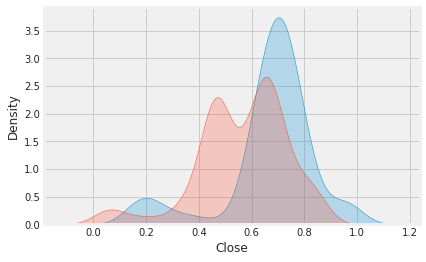

In [171]:
sns.kdeplot(y_test, shade=True)
sns.kdeplot(y_pred, shade=True)

In [172]:
np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))

0.14451586957877463

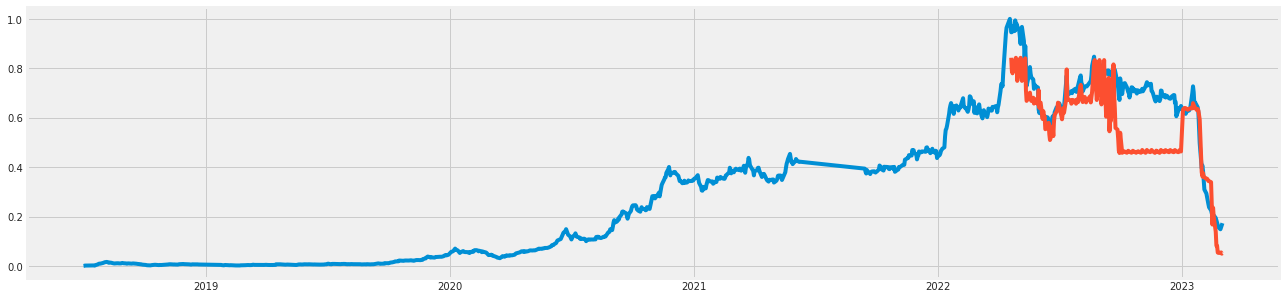

In [173]:
plt.figure(figsize=(20, 5))
plt.plot(y)
plt.plot(y_test.index, y_pred)
plt.show()

In [174]:
from sklearn.metrics.pairwise import euclidean_distances
euc_l = euclidean_distances(X_test, X_train)
euc_l

array([[2.23687343, 2.19880907, 2.18463985, ..., 0.08591696, 0.48688019,
        0.25795999],
       [2.26241086, 2.19968063, 2.15995727, ..., 0.25020675, 0.71788743,
        0.48898671],
       [2.42203593, 2.34113149, 2.27880129, ..., 0.57001795, 0.99576874,
        0.7722518 ],
       ...,
       [0.72515587, 0.69021028, 0.72588944, ..., 1.85379642, 1.87252853,
        1.88429412],
       [0.78012236, 0.66411933, 0.62016788, ..., 1.79964388, 1.87977201,
        1.86151997],
       [0.94978033, 0.78946703, 0.67508011, ..., 1.79493796, 1.93352381,
        1.88624361]])

In [175]:
euclidean_distances(X_test[1:2], X_train[2:3])[0][0]

2.159957273733305

In [176]:
print(X_test.shape)
print(X_train.shape)
print(euc_l.shape)

(219, 11)
(874, 11)
(219, 874)


In [177]:
def get_val(x_train, test_r, y_test, n_neighbors):
    distances = []
    for i in range(len(x_train)):
        dist = euclidean_distances([test_r], [x_train[i]] )[0][0]
        distances.append((i, dist))
    distances.sort(key=lambda tup: tup[1])
    v = 0
    for i in range(n_neighbors):
        v += y_test[distances[i][0]]
    return v/n_neighbors

In [178]:
y_pred = []
for i in X_test.values:
    y_pred.append(get_val(X_train.values, i, y_train, 2))
y_pred

[0.9720317115404202,
 0.871855159066988,
 0.871855159066988,
 0.9900604352697516,
 0.9720317115404202,
 0.9720317115404202,
 0.9720317115404202,
 0.871855159066988,
 0.9900604352697516,
 0.9720317115404202,
 0.871855159066988,
 0.871855159066988,
 0.9481631752283297,
 0.8575272467999863,
 0.8507282789529079,
 0.7533103588768545,
 0.7533103588768545,
 0.7214630088615759,
 0.736223814212474,
 0.7321834787627745,
 0.7321834787627745,
 0.7533103588768545,
 0.7214630088615759,
 0.736223814212474,
 0.736223814212474,
 0.7321834787627745,
 0.7158099344718702,
 0.7214630088615759,
 0.7214630088615759,
 0.6328981767561878,
 0.6841917631480663,
 0.6478032798017179,
 0.677503140596883,
 0.6366668930159916,
 0.6328981767561878,
 0.6409703595559025,
 0.6478032798017179,
 0.5807557803958848,
 0.5410569381726819,
 0.6328981767561878,
 0.5349539944997114,
 0.42882728414762505,
 0.43720503853597253,
 0.5410569381726819,
 0.4267816521237225,
 0.5349539944997114,
 0.6478032798017179,
 0.677503140596883,


In [179]:
num_folds = 10
kfold = KFold(n_splits=10)

In [180]:
model = KNeighborsRegressor(n_neighbors=17)
results = cross_val_score(model, X, y, cv=kfold)

In [181]:
print(results.mean())

-103.499317087891


In [183]:
array = adanigreen.values
X = array[:, 0:-1]
Y = array[:, -1]

In [184]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [185]:
model = KNeighborsRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [186]:
print(grid.best_score_)
print(grid.best_params_)

-17.829183870791553
{'n_neighbors': 1}


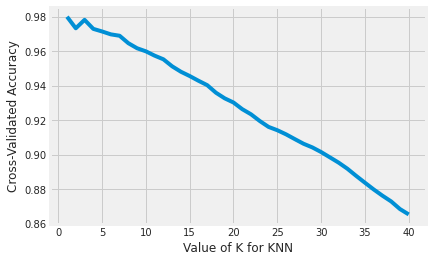

In [187]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [188]:
close_df=pd.DataFrame(adanigreen['Close'])
close_df

Close
Date                
2018-07-02  0.000000
2018-07-03  0.000390
2018-07-04  0.001494
2018-07-05  0.001562
2018-07-06  0.001749
...              ...
2023-02-24  0.156622
2023-02-27  0.148372
2023-02-28  0.156215
2023-03-01  0.164448
2023-03-02  0.173089

[1093 rows x 1 columns]

In [189]:
close_df=close_df.reset_index()

In [190]:
close_df['Date']

0      2018-07-02
1      2018-07-03
2      2018-07-04
3      2018-07-05
4      2018-07-06
          ...    
1088   2023-02-24
1089   2023-02-27
1090   2023-02-28
1091   2023-03-01
1092   2023-03-02
Name: Date, Length: 1093, dtype: datetime64[ns]

In [191]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(1093, 1)


In [192]:
training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (874, 1)
test_data:  (219, 1)


In [193]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [194]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (863, 10)
y_train:  (863,)
X_test:  (208, 10)
y_test (208,)


In [195]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [196]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (863, 1)
Test data prediction: (208, 1)


In [197]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [198]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.01526308599871671
Train data MSE:  0.00023296179420422204
Test data MAE:  0.006187348628069332
-------------------------------------------------------------------------------------
Test data RMSE:  0.05659187645751139
Test data MSE:  0.003202640480982232
Test data MAE:  0.035272951168615445


In [199]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9947436231223996
Test data explained variance regression score: 0.8804895077858936


In [200]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.9947115447017351
Test data R2 score: 0.8785354667971885


In [201]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  font_size=15, font_color='white',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (1093, 1)
Test predicted data:  (1093, 1)


In [202]:

x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 365
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  365


In [203]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  font_size=15, font_color='white',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## KNN for ADANITRANS

In [204]:
# Printing the dataframe
adanitrans.reset_index(level=0, inplace=True)
adanitrans.head()

Date      Symbol Series  Prev Close    Open    High     Low    Last  \
0  2018-07-02  ADANITRANS     EQ      156.15  158.80  161.55  150.70  154.25   
1  2018-07-03  ADANITRANS     EQ      154.75  154.00  154.80  148.30  153.40   
2  2018-07-04  ADANITRANS     EQ      153.65  151.25  159.50  151.25  156.90   
3  2018-07-05  ADANITRANS     EQ      156.85  155.20  160.00  155.20  158.60   
4  2018-07-06  ADANITRANS     EQ      159.10  158.00  162.70  157.15  159.75   

    Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  154.75  154.63  537963  8.318331e+12    5125               89673   
1  153.65  152.69  594571  9.078341e+12    4843               99893   
2  156.85  153.84  593481  9.129942e+12    3515               66512   
3  159.10  157.61  568007  8.952607e+12    4253               86442   
4  160.30  160.21  625598  1.002246e+13    5192               98138   

   %Deliverble company_name  MA for 30 days  MA for 60 days  MA for 90 days  \
0       0.1667   ADANITRANS             NaN             NaN             NaN   
1       0.1680   ADANITRANS             NaN             NaN             NaN   
2       0.1121   ADANITRANS             NaN             NaN             NaN   
3       0.1522   ADANITRANS             NaN             NaN             NaN   
4       0.1569   ADANITRANS             NaN             NaN             NaN   

   Daily Return  
0           NaN  
1     -0.008966  
2     -0.007108  
3      0.020827  
4      0.014345

In [205]:
adanitrans['Date'] = pd.to_datetime(adanitrans.Date,format='%Y-%m-%d')
adanitrans.set_index("Date", drop=False, inplace=True)
adanitrans.drop(["Series","Symbol","Trades","Deliverable Volume","%Deliverble","company_name","MA for 30 days","MA for 60 days","MA for 90 days","Daily Return"], axis=1, inplace=True)
adanitrans

Date  Prev Close    Open    High     Low    Last   Close  \
Date                                                                        
2018-07-02 2018-07-02      156.15  158.80  161.55  150.70  154.25  154.75   
2018-07-03 2018-07-03      154.75  154.00  154.80  148.30  153.40  153.65   
2018-07-04 2018-07-04      153.65  151.25  159.50  151.25  156.90  156.85   
2018-07-05 2018-07-05      156.85  155.20  160.00  155.20  158.60  159.10   
2018-07-06 2018-07-06      159.10  158.00  162.70  157.15  159.75  160.30   
...               ...         ...     ...     ...     ...     ...     ...   
2023-02-24 2023-02-24      749.75  712.30  712.30  712.30  712.30  712.30   
2023-02-27 2023-02-27      712.30  676.70  676.70  676.70  676.70  676.70   
2023-02-28 2023-02-28      676.70  642.90  674.40  642.90  642.90  642.90   
2023-03-01 2023-03-01      642.90  631.50  675.00  631.50  675.00  675.00   
2023-03-02 2023-03-02      675.00  700.00  708.75  685.00  708.75  708.75   

              VWAP   Volume      Turnover  
Date                                       
2018-07-02  154.63   537963  8.318331e+12  
2018-07-03  152.69   594571  9.078341e+12  
2018-07-04  153.84   593481  9.129942e+12  
2018-07-05  157.61   568007  8.952607e+12  
2018-07-06  160.21   625598  1.002246e+13  
...            ...      ...           ...  
2023-02-24  712.30   111971  7.975694e+12  
2023-02-27  676.70    73016  4.940993e+12  
2023-02-28  653.42  4607943  3.010922e+14  
2023-03-01  669.27  2628313  1.759053e+14  
2023-03-02  704.73  1300464  9.164721e+13  

[973 rows x 10 columns]

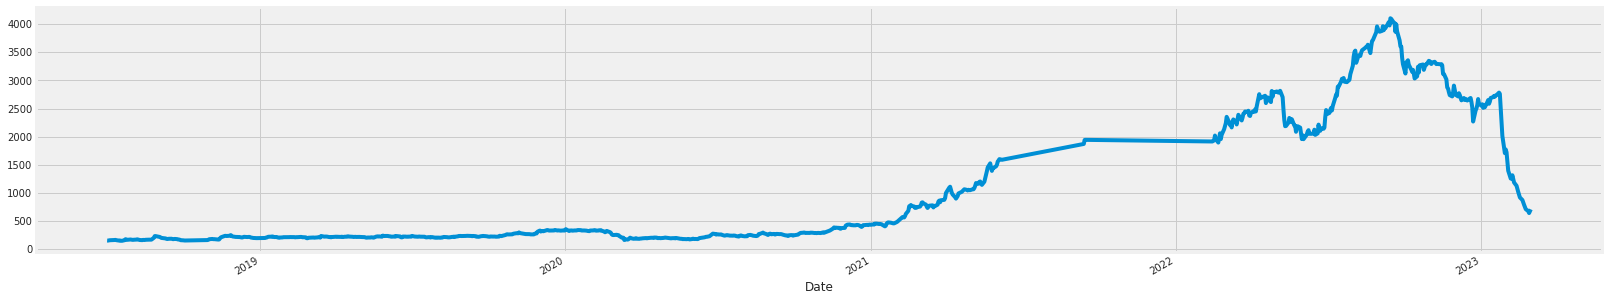

In [206]:
adanitrans.Close.plot(figsize=(25, 5))
plt.show()

<ipython-input-207-6b1b6eb2752d>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




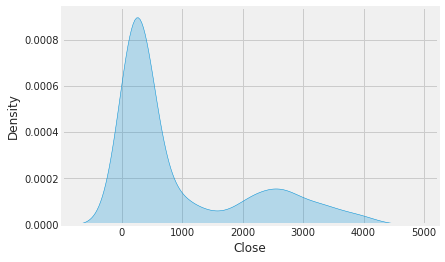

In [207]:
sns.kdeplot(adanitrans.Close, shade=True)
plt.show()

In [208]:
adanitrans["month"] = adanitrans.Date.dt.month
adanitrans["week"] = adanitrans.Date.dt.isocalendar().week
adanitrans["day"] = adanitrans.Date.dt.isocalendar().day
adanitrans["day_of_week"] = adanitrans.Date.dt.dayofweek
adanitrans.drop(['Date'], axis=1, inplace=True)
adanitrans

Prev Close    Open    High     Low    Last   Close    VWAP  \
Date                                                                     
2018-07-02      156.15  158.80  161.55  150.70  154.25  154.75  154.63   
2018-07-03      154.75  154.00  154.80  148.30  153.40  153.65  152.69   
2018-07-04      153.65  151.25  159.50  151.25  156.90  156.85  153.84   
2018-07-05      156.85  155.20  160.00  155.20  158.60  159.10  157.61   
2018-07-06      159.10  158.00  162.70  157.15  159.75  160.30  160.21   
...                ...     ...     ...     ...     ...     ...     ...   
2023-02-24      749.75  712.30  712.30  712.30  712.30  712.30  712.30   
2023-02-27      712.30  676.70  676.70  676.70  676.70  676.70  676.70   
2023-02-28      676.70  642.90  674.40  642.90  642.90  642.90  653.42   
2023-03-01      642.90  631.50  675.00  631.50  675.00  675.00  669.27   
2023-03-02      675.00  700.00  708.75  685.00  708.75  708.75  704.73   

             Volume      Turnover  month  week  day  day_of_week  
Date                                                              
2018-07-02   537963  8.318331e+12      7    27    1            0  
2018-07-03   594571  9.078341e+12      7    27    2            1  
2018-07-04   593481  9.129942e+12      7    27    3            2  
2018-07-05   568007  8.952607e+12      7    27    4            3  
2018-07-06   625598  1.002246e+13      7    27    5            4  
...             ...           ...    ...   ...  ...          ...  
2023-02-24   111971  7.975694e+12      2     8    5            4  
2023-02-27    73016  4.940993e+12      2     9    1            0  
2023-02-28  4607943  3.010922e+14      2     9    2            1  
2023-03-01  2628313  1.759053e+14      3     9    3            2  
2023-03-02  1300464  9.164721e+13      3     9    4            3  

[973 rows x 13 columns]

In [209]:
indx = adanitrans.index
cols = adanitrans.columns
(indx, cols)

(DatetimeIndex(['2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05',
                '2018-07-06', '2018-07-09', '2018-07-10', '2018-07-11',
                '2018-07-12', '2018-07-13',
                ...
                '2023-02-17', '2023-02-20', '2023-02-21', '2023-02-22',
                '2023-02-23', '2023-02-24', '2023-02-27', '2023-02-28',
                '2023-03-01', '2023-03-02'],
               dtype='datetime64[ns]', name='Date', length=973, freq=None),
 Index(['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume',
        'Turnover', 'month', 'week', 'day', 'day_of_week'],
       dtype='object'))

In [210]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(adanitrans)
data = pd.DataFrame(data, index=indx, columns=cols)
adanitrans= data
adanitrans

Prev Close      Open      High       Low      Last     Close  \
Date                                                                       
2018-07-02    0.001757  0.002391  0.002314  0.001456  0.001367  0.001403   
2018-07-03    0.001403  0.001195  0.000661  0.000832  0.001154  0.001125   
2018-07-04    0.001125  0.000510  0.001812  0.001599  0.002032  0.001934   
2018-07-05    0.001934  0.001494  0.001934  0.002626  0.002458  0.002502   
2018-07-06    0.002502  0.002191  0.002595  0.003133  0.002747  0.002806   
...                ...       ...       ...       ...       ...       ...   
2023-02-24    0.151800  0.140221  0.137148  0.147478  0.141363  0.142334   
2023-02-27    0.142334  0.131356  0.128432  0.138222  0.132432  0.133335   
2023-02-28    0.133335  0.122939  0.127869  0.129433  0.123953  0.124791   
2023-03-01    0.124791  0.120101  0.128016  0.126469  0.132005  0.132905   
2023-03-02    0.132905  0.137158  0.136279  0.140380  0.140472  0.141436   

                VWAP    Volume  Turnover     month      week       day  \
Date                                                                     
2018-07-02  0.001506  0.016857  0.001769  0.545455  0.500000  0.000000   
2018-07-03  0.001016  0.018719  0.001942  0.545455  0.500000  0.166667   
2018-07-04  0.001307  0.018683  0.001954  0.545455  0.500000  0.333333   
2018-07-05  0.002259  0.017845  0.001913  0.545455  0.500000  0.500000   
2018-07-06  0.002916  0.019739  0.002158  0.545455  0.500000  0.666667   
...              ...       ...       ...       ...       ...       ...   
2023-02-24  0.142442  0.002852  0.001691  0.090909  0.134615  0.666667   
2023-02-27  0.133445  0.001571  0.000998  0.090909  0.153846  0.000000   
2023-02-28  0.127562  0.150672  0.068558  0.090909  0.153846  0.166667   
2023-03-01  0.131568  0.085585  0.040000  0.181818  0.153846  0.333333   
2023-03-02  0.140529  0.041927  0.020778  0.181818  0.153846  0.500000   

            day_of_week  
Date                     
2018-07-02     0.000000  
2018-07-03     0.166667  
2018-07-04     0.333333  
2018-07-05     0.500000  
2018-07-06     0.666667  
...                 ...  
2023-02-24     0.666667  
2023-02-27     0.000000  
2023-02-28     0.166667  
2023-03-01     0.333333  
2023-03-02     0.500000  

[973 rows x 13 columns]

In [211]:
# y = df['VWAP']
# y.index = indx
# df.drop(['VWAP'], axis=1, inplace=True)
y = adanitrans['Close']
y.index = indx
adanitrans.drop(['VWAP', 'Prev Close'], axis=1, inplace=True)
adanitrans

Open      High       Low      Last     Close    Volume  \
Date                                                                     
2018-07-02  0.002391  0.002314  0.001456  0.001367  0.001403  0.016857   
2018-07-03  0.001195  0.000661  0.000832  0.001154  0.001125  0.018719   
2018-07-04  0.000510  0.001812  0.001599  0.002032  0.001934  0.018683   
2018-07-05  0.001494  0.001934  0.002626  0.002458  0.002502  0.017845   
2018-07-06  0.002191  0.002595  0.003133  0.002747  0.002806  0.019739   
...              ...       ...       ...       ...       ...       ...   
2023-02-24  0.140221  0.137148  0.147478  0.141363  0.142334  0.002852   
2023-02-27  0.131356  0.128432  0.138222  0.132432  0.133335  0.001571   
2023-02-28  0.122939  0.127869  0.129433  0.123953  0.124791  0.150672   
2023-03-01  0.120101  0.128016  0.126469  0.132005  0.132905  0.085585   
2023-03-02  0.137158  0.136279  0.140380  0.140472  0.141436  0.041927   

            Turnover     month      week       day  day_of_week  
Date                                                             
2018-07-02  0.001769  0.545455  0.500000  0.000000     0.000000  
2018-07-03  0.001942  0.545455  0.500000  0.166667     0.166667  
2018-07-04  0.001954  0.545455  0.500000  0.333333     0.333333  
2018-07-05  0.001913  0.545455  0.500000  0.500000     0.500000  
2018-07-06  0.002158  0.545455  0.500000  0.666667     0.666667  
...              ...       ...       ...       ...          ...  
2023-02-24  0.001691  0.090909  0.134615  0.666667     0.666667  
2023-02-27  0.000998  0.090909  0.153846  0.000000     0.000000  
2023-02-28  0.068558  0.090909  0.153846  0.166667     0.166667  
2023-03-01  0.040000  0.181818  0.153846  0.333333     0.333333  
2023-03-02  0.020778  0.181818  0.153846  0.500000     0.500000  

[973 rows x 11 columns]

In [212]:
X = adanitrans
X

Open      High       Low      Last     Close    Volume  \
Date                                                                     
2018-07-02  0.002391  0.002314  0.001456  0.001367  0.001403  0.016857   
2018-07-03  0.001195  0.000661  0.000832  0.001154  0.001125  0.018719   
2018-07-04  0.000510  0.001812  0.001599  0.002032  0.001934  0.018683   
2018-07-05  0.001494  0.001934  0.002626  0.002458  0.002502  0.017845   
2018-07-06  0.002191  0.002595  0.003133  0.002747  0.002806  0.019739   
...              ...       ...       ...       ...       ...       ...   
2023-02-24  0.140221  0.137148  0.147478  0.141363  0.142334  0.002852   
2023-02-27  0.131356  0.128432  0.138222  0.132432  0.133335  0.001571   
2023-02-28  0.122939  0.127869  0.129433  0.123953  0.124791  0.150672   
2023-03-01  0.120101  0.128016  0.126469  0.132005  0.132905  0.085585   
2023-03-02  0.137158  0.136279  0.140380  0.140472  0.141436  0.041927   

            Turnover     month      week       day  day_of_week  
Date                                                             
2018-07-02  0.001769  0.545455  0.500000  0.000000     0.000000  
2018-07-03  0.001942  0.545455  0.500000  0.166667     0.166667  
2018-07-04  0.001954  0.545455  0.500000  0.333333     0.333333  
2018-07-05  0.001913  0.545455  0.500000  0.500000     0.500000  
2018-07-06  0.002158  0.545455  0.500000  0.666667     0.666667  
...              ...       ...       ...       ...          ...  
2023-02-24  0.001691  0.090909  0.134615  0.666667     0.666667  
2023-02-27  0.000998  0.090909  0.153846  0.000000     0.000000  
2023-02-28  0.068558  0.090909  0.153846  0.166667     0.166667  
2023-03-01  0.040000  0.181818  0.153846  0.333333     0.333333  
2023-03-02  0.020778  0.181818  0.153846  0.500000     0.500000  

[973 rows x 11 columns]

In [213]:
cut = int(len(X)*0.8)

X_train = X[:cut]
X_test = X[cut:]
y_train = y[:cut]
y_test = y[cut:]
(X_test, y_test)

(                Open      High       Low      Last     Close    Volume  \
 Date                                                                     
 2022-05-25  0.512177  0.502834  0.504836  0.486152  0.490054  0.004189   
 2022-05-26  0.485781  0.499480  0.478029  0.512644  0.505258  0.010112   
 2022-05-27  0.513173  0.506261  0.506487  0.509056  0.514901  0.005079   
 2022-05-30  0.510434  0.510656  0.518747  0.503914  0.508771  0.008661   
 2022-05-31  0.498232  0.489124  0.496308  0.477924  0.481725  0.038319   
 ...              ...       ...       ...       ...       ...       ...   
 2023-02-24  0.140221  0.137148  0.147478  0.141363  0.142334  0.002852   
 2023-02-27  0.131356  0.128432  0.138222  0.132432  0.133335  0.001571   
 2023-02-28  0.122939  0.127869  0.129433  0.123953  0.124791  0.150672   
 2023-03-01  0.120101  0.128016  0.126469  0.132005  0.132905  0.085585   
 2023-03-02  0.137158  0.136279  0.140380  0.140472  0.141436  0.041927   
 
             Turnover  

In [214]:
print(X_train.shape)
print(X_test.shape)

(778, 11)
(195, 11)


In [215]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [216]:
y_pred = knn.predict(X_test)
y_pred

array([0.54176862, 0.54543628, 0.56016   , 0.55002528, 0.52665563,
       0.46062509, 0.45997548, 0.467671  , 0.44542996, 0.4833881 ,
       0.4882147 , 0.50733911, 0.4892422 , 0.4653885 , 0.50850437,
       0.4882147 , 0.50733911, 0.4892422 , 0.45483166, 0.53627344,
       0.51996487, 0.50733911, 0.53279157, 0.54650675, 0.51970831,
       0.56972347, 0.5768452 , 0.59373894, 0.58832086, 0.56435216,
       0.57549037, 0.5768452 , 0.59373894, 0.60247586, 0.6121733 ,
       0.60905541, 0.62709418, 0.62013296, 0.62912643, 0.63460012,
       0.6290683 , 0.65578712, 0.62013296, 0.62912643, 0.63460012,
       0.6290683 , 0.64502553, 0.62013296, 0.62912643, 0.64458192,
       0.64848466, 0.65578712, 0.63582731, 0.6438906 , 0.64848466,
       0.65578712, 0.64246373, 0.64458192, 0.64848466, 0.65578712,
       0.64246373, 0.6438906 , 0.64458192, 0.64848466, 0.65578712,
       0.64246373, 0.6438906 , 0.64363278, 0.65578712, 0.64246373,
       0.6438906 , 0.64651686, 0.64848466, 0.65578712, 0.65206

<ipython-input-217-d65662b3caca>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-217-d65662b3caca>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='Close', ylabel='Density'>

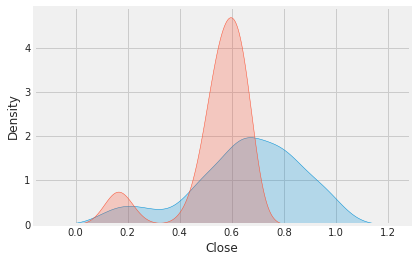

In [217]:
sns.kdeplot(y_test, shade=True)
sns.kdeplot(y_pred, shade=True)

In [218]:
np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))

0.15306775000618125

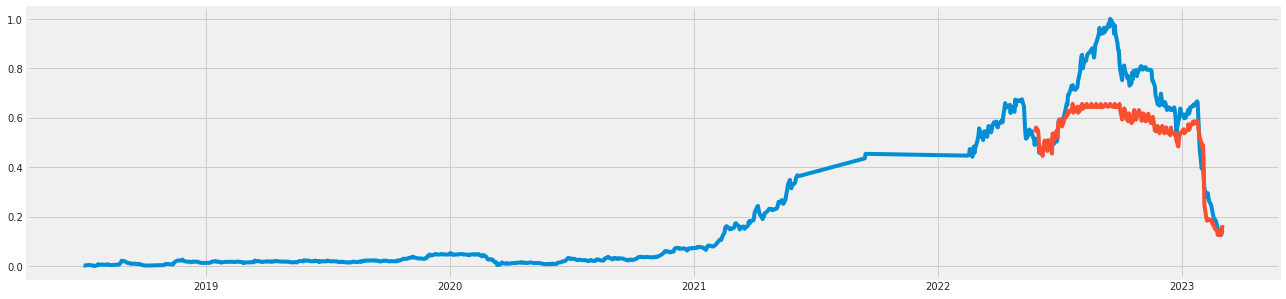

In [219]:
plt.figure(figsize=(20, 5))
plt.plot(y)
plt.plot(y_test.index, y_pred)
plt.show()

In [220]:
from sklearn.metrics.pairwise import euclidean_distances
euc_l = euclidean_distances(X_test, X_train)
euc_l

array([[1.22734429, 1.15919818, 1.13371773, ..., 0.48284323, 0.47549512,
        0.23962103],
       [1.3303539 , 1.22310424, 1.15169013, ..., 0.26278951, 0.71205442,
        0.47404827],
       [1.4922446 , 1.3571933 , 1.24949488, ..., 0.08034141, 0.94387378,
        0.70720923],
       ...,
       [0.69374555, 0.65283842, 0.69356058, ..., 1.23234659, 1.00611684,
        0.95300162],
       [0.74840187, 0.62782122, 0.58124495, ..., 1.08350481, 1.05487587,
        0.94714406],
       [0.92054981, 0.75539257, 0.63493678, ..., 0.9773168 , 1.15767918,
        1.00743009]])

In [221]:
euclidean_distances(X_test[1:2], X_train[2:3])[0][0]

1.1516901277209373

In [222]:
print(X_test.shape)
print(X_train.shape)
print(euc_l.shape)

(195, 11)
(778, 11)
(195, 778)


In [223]:
def get_val(x_train, test_r, y_test, n_neighbors):
    distances = []
    for i in range(len(x_train)):
        dist = euclidean_distances([test_r], [x_train[i]] )[0][0]
        distances.append((i, dist))
    distances.sort(key=lambda tup: tup[1])
    v = 0
    for i in range(n_neighbors):
        v += y_test[distances[i][0]]
    return v/n_neighbors

In [224]:
y_pred = []
for i in X_test.values:
    y_pred.append(get_val(X_train.values, i, y_train, 2))
y_pred

[0.5451696071988272,
 0.5249545017946515,
 0.5312105050300794,
 0.5245816692786007,
 0.5347934887012791,
 0.4519298822102018,
 0.5249545017946515,
 0.5312105050300794,
 0.5245816692786007,
 0.5347934887012791,
 0.5451696071988272,
 0.5249545017946515,
 0.5312105050300794,
 0.5245816692786007,
 0.5347934887012791,
 0.5451696071988272,
 0.5249545017946515,
 0.5312105050300794,
 0.5245816692786007,
 0.5347934887012791,
 0.5451696071988272,
 0.5249545017946515,
 0.5312105050300794,
 0.5245816692786007,
 0.5347934887012791,
 0.5451696071988272,
 0.5249545017946515,
 0.5312105050300794,
 0.5245816692786007,
 0.5709456043678278,
 0.5451696071988272,
 0.5249545017946515,
 0.6103141903847127,
 0.6583969465648856,
 0.5709456043678278,
 0.6067564834942623,
 0.6698220514635257,
 0.67079520752237,
 0.6583969465648856,
 0.6315024518477328,
 0.6568297861584349,
 0.6698220514635257,
 0.67079520752237,
 0.6583969465648856,
 0.6278057226631617,
 0.6681348263485163,
 0.6698220514635257,
 0.67079520752237

In [225]:
num_folds = 10
kfold = KFold(n_splits=10)

In [226]:
model = KNeighborsRegressor(n_neighbors=17)
results = cross_val_score(model, X, y, cv=kfold)

In [228]:
print(results.mean())

-15.35259825419177


In [230]:
array = adanitrans.values
X = array[:, 0:-1]
Y = array[:, -1]

In [231]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [232]:
model = KNeighborsRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [233]:
print(grid.best_score_)
print(grid.best_params_)

-1.4469497183401543
{'n_neighbors': 2}


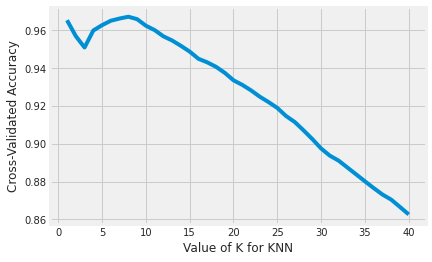

In [234]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [235]:
close_df=pd.DataFrame(adanitrans['Close'])
close_df

Close
Date                
2018-07-02  0.001403
2018-07-03  0.001125
2018-07-04  0.001934
2018-07-05  0.002502
2018-07-06  0.002806
...              ...
2023-02-24  0.142334
2023-02-27  0.133335
2023-02-28  0.124791
2023-03-01  0.132905
2023-03-02  0.141436

[973 rows x 1 columns]

In [236]:
print(close_df.shape)

(973, 1)


In [237]:
close_df=close_df.reset_index()

In [238]:
close_df['Date']

0     2018-07-02
1     2018-07-03
2     2018-07-04
3     2018-07-05
4     2018-07-06
         ...    
968   2023-02-24
969   2023-02-27
970   2023-02-28
971   2023-03-01
972   2023-03-02
Name: Date, Length: 973, dtype: datetime64[ns]

In [239]:
close_stock = close_df.copy()
del close_df['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(close_df).reshape(-1,1))
print(closedf.shape)

(973, 1)


In [240]:
training_size=int(len(closedf)*0.80)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (778, 1)
test_data:  (195, 1)


In [241]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [242]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (767, 10)
y_train:  (767,)
X_test:  (184, 10)
y_test (184,)


In [243]:
from sklearn import neighbors

K = time_step
neighbor = neighbors.KNeighborsRegressor(n_neighbors = K)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [244]:
# Lets Do the prediction 

train_predict=neighbor.predict(X_train)
test_predict=neighbor.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (767, 1)
Test data prediction: (184, 1)


In [245]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [246]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.010169629209962823
Train data MSE:  0.00010342135826812906
Test data MAE:  0.004536269280301177
-------------------------------------------------------------------------------------
Test data RMSE:  0.15302315377497658
Test data MSE:  0.023416085591240126
Test data MAE:  0.11558324523093086


In [247]:
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9960297243459126
Test data explained variance regression score: 0.5825596318349822


In [248]:
train_r2_knn=r2_score(original_ytrain, train_predict)
test_r2_knn=r2_score(original_ytest, test_predict)
print("Train data R2 score:", train_r2_knn)
print("Test data R2 score:", test_r2_knn)

Train data R2 score: 0.9960293027908542
Test data R2 score: 0.4572022332783223


In [249]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'Date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['Date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','Date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  font_size=15, font_color='white',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (973, 1)
Test predicted data:  (973, 1)


In [250]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 365
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = neighbor.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = neighbor.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  365


In [251]:
knndf=closedf.tolist()
knndf.extend((np.array(lst_output).reshape(-1,1)).tolist())
knndf=scaler.inverse_transform(knndf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(knndf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  font_size=15, font_color='white',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# LSTM Model
## LSTM for ADANIGREEN

In [253]:
abc=adanigreen.reset_index()
abc=abc.drop(["Date","Open","High","Low","Last","Turnover","month","week","day","day_of_week"],axis=1)
abc.head(3)

Close    Volume
0  0.000000  0.029764
1  0.000390  0.010922
2  0.001494  0.022309

In [254]:
# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
data_prices_scaled = sc.fit_transform(abc)

In [255]:
# Creating a data structure (it does not work when you have only one feature)
def create_data(df, n_future, n_past, train_test_split_percentage, validation_split_percentage):
    n_feature = df.shape[1]
    x_data, y_data = [], []
    
    for i in range(n_past, len(df) - n_future + 1):
        x_data.append(df[i - n_past:i, 0:n_feature])
        y_data.append(df[i + n_future - 1:i + n_future, 0])
    
    split_training_test_starting_point = int(round(train_test_split_percentage*len(x_data)))
    split_train_validation_starting_point = int(round(split_training_test_starting_point*(1-validation_split_percentage)))
    
    x_train = x_data[:split_train_validation_starting_point]
    y_train = y_data[:split_train_validation_starting_point]
    # if you want to choose the validation set by yourself, uncomment the below code.
    x_val = x_data[split_train_validation_starting_point:split_training_test_starting_point]
    y_val =  x_data[split_train_validation_starting_point:split_training_test_starting_point]                                             
    
    x_test = x_data[split_training_test_starting_point:]
    y_test = y_data[split_training_test_starting_point:]
    
    return np.array(x_train), np.array(x_test), np.array(x_val), np.array(y_train), np.array(y_test), np.array(y_val)


In [256]:
# Number of days you want to predict into the future
# Number of past days you want to use to predict the future

X_train, X_test, X_val, y_train, y_test, y_val = create_data(data_prices_scaled, n_future=1, n_past=30, train_test_split_percentage=0.8,
                                               validation_split_percentage = 0)

In [257]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(850, 30, 2)
(213, 30, 2)
(850, 1)
(213, 1)


In [258]:
# ------------------LSTM-----------------------
import tensorflow as tf

regressor = Sequential()
regressor.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=64, return_sequences=False))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1, activation='linear'))
regressor.compile(optimizer='RMSprop', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

regressor.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           67072     
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 116,545
Trainable params: 116,545
Non-trainable params: 0
_________________________________________________________________


In [259]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
#mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit model
history = regressor.fit(X_train, y_train, validation_split=0.3, epochs=50, batch_size=64, callbacks=[es])

Epoch 1/50
10/10 [==============================] - 11s 215ms/step - loss: 0.0038 - root_mean_squared_error: 0.0616 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0731
Epoch 2/50
10/10 [==============================] - 1s 113ms/step - loss: 6.6026e-04 - root_mean_squared_error: 0.0257 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0587
Epoch 3/50
10/10 [==============================] - 1s 110ms/step - loss: 9.3139e-04 - root_mean_squared_error: 0.0305 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0824
Epoch 4/50
10/10 [==============================] - 1s 110ms/step - loss: 4.0310e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0200 - val_root_mean_squared_error: 0.1413
Epoch 5/50
10/10 [==============================] - 2s 175ms/step - loss: 6.5215e-04 - root_mean_squared_error: 0.0255 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0525
Epoch 6/50
10/10 [==============================] - 2s 223ms/step - loss: 7.6023e-04 - root_mean_squared_error: 0.0276 - va

In [260]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

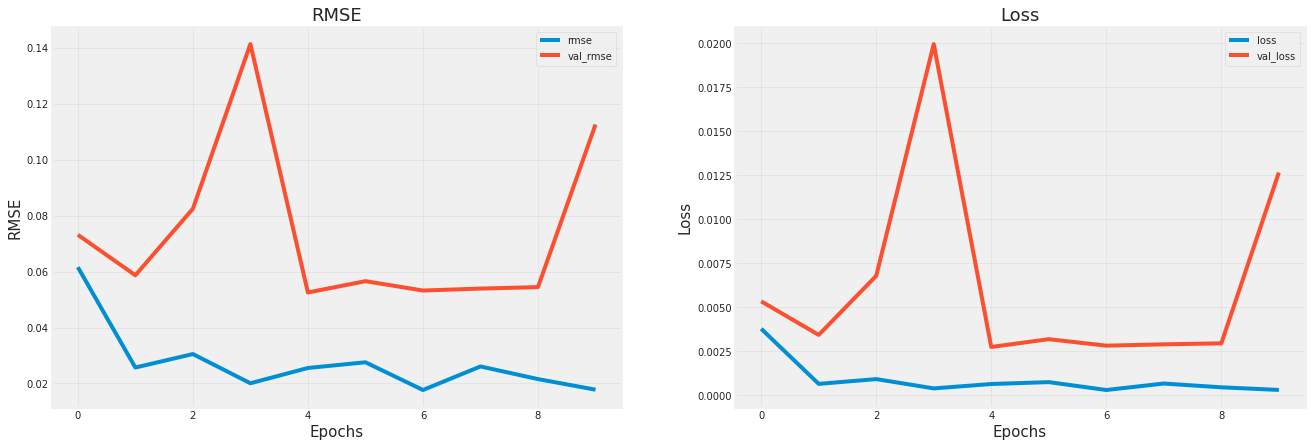

In [261]:
fig = plt.figure(figsize=(20,7))
fig.add_subplot(121)

# Accuracy
plt.plot(history.epoch, history.history['root_mean_squared_error'], label = "rmse")
plt.plot(history.epoch, history.history['val_root_mean_squared_error'], label = "val_rmse")

plt.title("RMSE", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

#Adding Subplot 1 (For Loss)
fig.add_subplot(122)

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()

In [262]:
results = regressor.evaluate(X_test, y_test)
print("test loss, test acc:", np.round(results, 4))

7/7 [==============================] - 0s 41ms/step - loss: 0.0146 - root_mean_squared_error: 0.1208
test loss, test acc: [0.0146 0.1208]


In [265]:
def LSTM_HyperParameter_Tuning(config, x_train, y_train, x_test, y_test):
    
    first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = config
    possible_combinations = list(itertools.product(first_additional_layer, second_additional_layer, third_additional_layer,
                                                  n_neurons, n_batch_size, dropout))
    
    print(possible_combinations)
    print('\n')
    
    hist = []
    for i in range(0, len(possible_combinations)):
        
        print(f'{i+1}th combination: \n')
        print('--------------------------------------------------------------------')
        
        first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = possible_combinations[i]
        
        # instantiating the model in the strategy scope creates the model on the TPU
        #with tpu_strategy.scope():
        regressor = Sequential()
        regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
        regressor.add(Dropout(dropout))
        if first_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if second_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if third_additional_layer:
            regressor.add(GRU(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        regressor.add(LSTM(units=n_neurons, return_sequences=False))
        regressor.add(Dropout(dropout))
        regressor.add(Dense(units=1, activation='linear'))
        regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
        '''''
        From the mentioned article above --> If a validation dataset is specified to the fit() function via the validation_data or v
        alidation_split arguments,then the loss on the validation dataset will be made available via the name “val_loss.”
        '''''

        file_path = 'best_model.h5'

        mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)
        '''''
        cb = Callback(...)  # First, callbacks must be instantiated.
        cb_list = [cb, ...]  # Then, one or more callbacks that you intend to use must be added to a Python list.
        model.fit(..., callbacks=cb_list)  # Finally, the list of callbacks is provided to the callback argument when fitting the model.
        '''''

        regressor.fit(x_train, y_train, validation_split=0.3, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)

        # load the best model
        # regressor = load_model('best_model.h5')

        train_accuracy = regressor.evaluate(x_train, y_train, verbose=0)
        test_accuracy = regressor.evaluate(x_test, y_test, verbose=0)
        hist.append(list((first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout,
                          train_accuracy, test_accuracy)))

        print(f'{str(i)}-th combination = {possible_combinations[i]} \n train accuracy: {train_accuracy} and test accuracy: {test_accuracy}')
        
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
         
    return hist

In [266]:
config = [[False], [False], [False], [64, 128], [32, 64, 128], [0.2]]  

# list of lists --> [[first_additional_layer], [second_additional_layer], [third_additional_layer], [n_neurons], [n_batch_size], [dropout]]

hist = LSTM_HyperParameter_Tuning(config, X_train, y_train, X_test, y_test)  # change x_train shape

[(False, False, False, 64, 32, 0.2), (False, False, False, 64, 64, 0.2), (False, False, False, 64, 128, 0.2), (False, False, False, 128, 32, 0.2), (False, False, False, 128, 64, 0.2), (False, False, False, 128, 128, 0.2)]


1th combination: 

--------------------------------------------------------------------

Epoch 1: val_loss improved from inf to 0.00696, saving model to best_model.h5

Epoch 2: val_loss improved from 0.00696 to 0.00324, saving model to best_model.h5

Epoch 3: val_loss improved from 0.00324 to 0.00251, saving model to best_model.h5

Epoch 4: val_loss improved from 0.00251 to 0.00251, saving model to best_model.h5

Epoch 5: val_loss improved from 0.00251 to 0.00246, saving model to best_model.h5

Epoch 6: val_loss improved from 0.00246 to 0.00245, saving model to best_model.h5

Epoch 7: val_loss did not improve from 0.00245

Epoch 8: val_loss did not improve from 0.00245

Epoch 9: val_loss improved from 0.00245 to 0.00227, saving model to best_model.h5

Epoch 10: val_

In [267]:
hist = pd.DataFrame(hist)
hist = hist.sort_values(by=[7], ascending=True)
hist

0      1      2    3    4    5  \
3  False  False  False  128   32  0.2   
5  False  False  False  128  128  0.2   
4  False  False  False  128   64  0.2   
1  False  False  False   64   64  0.2   
0  False  False  False   64   32  0.2   
2  False  False  False   64  128  0.2   

                                               6  \
3  [0.0005074184155091643, 0.022525949403643608]   
5   [0.000555794860702008, 0.023575302213430405]   
4   [0.0009198600891977549, 0.03032919578254223]   
1  [0.0007049777777865529, 0.026551418006420135]   
0  [0.0013547904090955853, 0.036807477474212646]   
2   [0.0006859094719402492, 0.02618987299501896]   

                                              7  
3  [0.0025404582265764475, 0.05040295794606209]  
5   [0.002953247632831335, 0.05434378981590271]  
4    [0.00407513277605176, 0.06383676826953888]  
1   [0.004523922223597765, 0.06726010888814926]  
0   [0.006362820044159889, 0.07976728677749634]  
2   [0.007349950261414051, 0.08573184907436371]

In [268]:
print(f'Best Combination: \n first_additional_layer = {hist.iloc[0, 0]}\n second_additional_layer = {hist.iloc[0, 1]}\n third_additional_layer = {hist.iloc[0, 2]}\n n_neurons = {hist.iloc[0, 3]}\n n_batch_size = {hist.iloc[0, 4]}\n dropout = {hist.iloc[0, 5]}')
print('**************************')
print(f'Results Before Tunning:\n Test Set RMSE: {np.round(results, 4)[1]}\n')
print(f'Results After Tunning:\n Test Set RMSE: {np.round(hist.iloc[0, -1], 4)[1]}\n')
print(f'{np.round((results[1] - hist.iloc[0, -1][1])*100/np.round(results, 4)[1])}% Improvement')

Best Combination: 
 first_additional_layer = False
 second_additional_layer = False
 third_additional_layer = False
 n_neurons = 128
 n_batch_size = 32
 dropout = 0.2
**************************
Results Before Tunning:
 Test Set RMSE: 0.1208

Results After Tunning:
 Test Set RMSE: 0.0504

58.0% Improvement


In [269]:
first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = list(hist.iloc[0, :-2])

In [270]:
regressor = Sequential()
regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(dropout))

if first_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

if second_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

if third_additional_layer:
    regressor.add(GRU(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))
regressor.add(LSTM(units=n_neurons, return_sequences=False))
regressor.add(Dropout(dropout))
regressor.add(Dense(units=1, activation='linear'))
regressor.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

file_path = 'best_model.h5'

mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

regressor.fit(X_train, y_train, validation_split=0.3, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)


Epoch 1: val_loss improved from inf to 0.00562, saving model to best_model.h5

Epoch 2: val_loss improved from 0.00562 to 0.00209, saving model to best_model.h5

Epoch 3: val_loss did not improve from 0.00209

Epoch 4: val_loss improved from 0.00209 to 0.00173, saving model to best_model.h5

Epoch 5: val_loss did not improve from 0.00173

Epoch 6: val_loss did not improve from 0.00173

Epoch 7: val_loss did not improve from 0.00173

Epoch 8: val_loss improved from 0.00173 to 0.00168, saving model to best_model.h5

Epoch 9: val_loss did not improve from 0.00168

Epoch 10: val_loss did not improve from 0.00168

Epoch 11: val_loss did not improve from 0.00168

Epoch 12: val_loss did not improve from 0.00168

Epoch 13: val_loss did not improve from 0.00168
Epoch 13: early stopping


In [271]:
regressor.evaluate(X_test, y_test)

7/7 [==============================] - 0s 60ms/step - loss: 0.0031


0.0030919783748686314

7/7 [==============================] - 2s 50ms/step


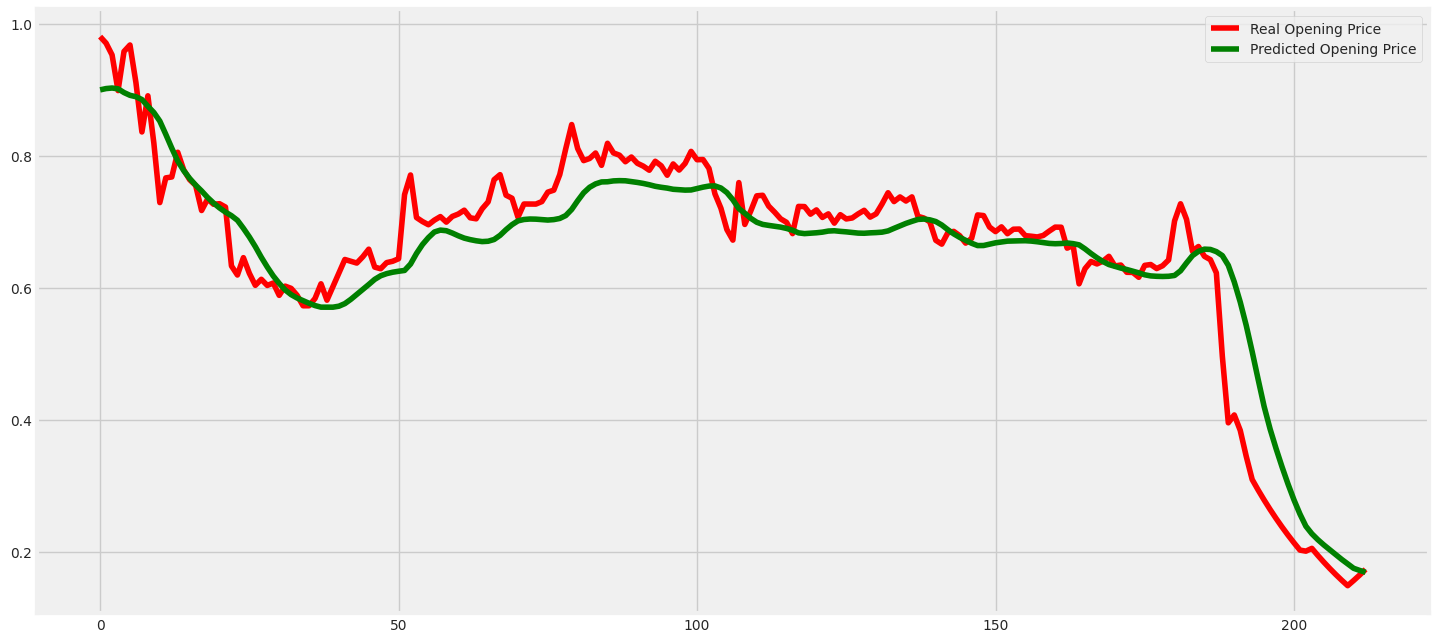

In [272]:
y_pred = regressor.predict(X_test)

plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(y_test, color='red', label = 'Real Opening Price')
plt.plot(y_pred, color='green', label = 'Predicted Opening Price')
plt.legend(loc='best')

## LSTM for Reliance

In [273]:
abc=reliance.reset_index()
abc=abc.drop(["Date","Open","High","Low","Last","Turnover","month","week","day","day_of_week"],axis=1)
# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
data_prices_scaled = sc.fit_transform(abc)
data_prices_scaled.shape

(1158, 2)

In [274]:
# Creating a data structure (it does not work when you have only one feature)
def create_data(df, n_future, n_past, train_test_split_percentage, validation_split_percentage):
    n_feature = df.shape[1]
    x_data, y_data = [], []
    
    for i in range(n_past, len(df) - n_future + 1):
        x_data.append(df[i - n_past:i, 0:n_feature])
        y_data.append(df[i + n_future - 1:i + n_future, 0])
    
    split_training_test_starting_point = int(round(train_test_split_percentage*len(x_data)))
    split_train_validation_starting_point = int(round(split_training_test_starting_point*(1-validation_split_percentage)))
    
    x_train = x_data[:split_train_validation_starting_point]
    y_train = y_data[:split_train_validation_starting_point]
    # if you want to choose the validation set by yourself, uncomment the below code.
    x_val = x_data[split_train_validation_starting_point:split_training_test_starting_point]
    y_val =  x_data[split_train_validation_starting_point:split_training_test_starting_point]                                             
    
    x_test = x_data[split_training_test_starting_point:]
    y_test = y_data[split_training_test_starting_point:]
    
    return np.array(x_train), np.array(x_test), np.array(x_val), np.array(y_train), np.array(y_test), np.array(y_val)


In [275]:
# Number of days you want to predict into the future
# Number of past days you want to use to predict the future

X_train, X_test, X_val, y_train, y_test, y_val = create_data(data_prices_scaled, n_future=1, n_past=30, train_test_split_percentage=0.8,
                                               validation_split_percentage = 0)


print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(902, 30, 2)
(226, 30, 2)
(902, 1)
(226, 1)


In [276]:
# ------------------LSTM-----------------------
import tensorflow as tf

regressor = Sequential()
regressor.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=64, return_sequences=False))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1, activation='relu'))
regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

regressor.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 30, 128)           67072     
                                                                 
 dropout_16 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_17 (Dropout)        (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 116,545
Trainable params: 116,545
Non-trainable params: 0
_________________________________________________________________


In [277]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
#mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit model
history = regressor.fit(X_train, y_train, validation_split=0.3, epochs=40, batch_size=64, callbacks=[es])

Epoch 1/40
10/10 [==============================] - 12s 419ms/step - loss: 0.0391 - root_mean_squared_error: 0.1978 - val_loss: 0.0576 - val_root_mean_squared_error: 0.2399
Epoch 2/40
10/10 [==============================] - 2s 205ms/step - loss: 0.0083 - root_mean_squared_error: 0.0913 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0495
Epoch 3/40
10/10 [==============================] - 4s 444ms/step - loss: 0.0038 - root_mean_squared_error: 0.0620 - val_loss: 0.0102 - val_root_mean_squared_error: 0.1010
Epoch 4/40
10/10 [==============================] - 2s 225ms/step - loss: 0.0026 - root_mean_squared_error: 0.0514 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0445
Epoch 5/40
10/10 [==============================] - 2s 254ms/step - loss: 0.0026 - root_mean_squared_error: 0.0511 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0670
Epoch 6/40
10/10 [==============================] - 2s 234ms/step - loss: 0.0026 - root_mean_squared_error: 0.0509 - val_loss: 0.0032 - val

In [278]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

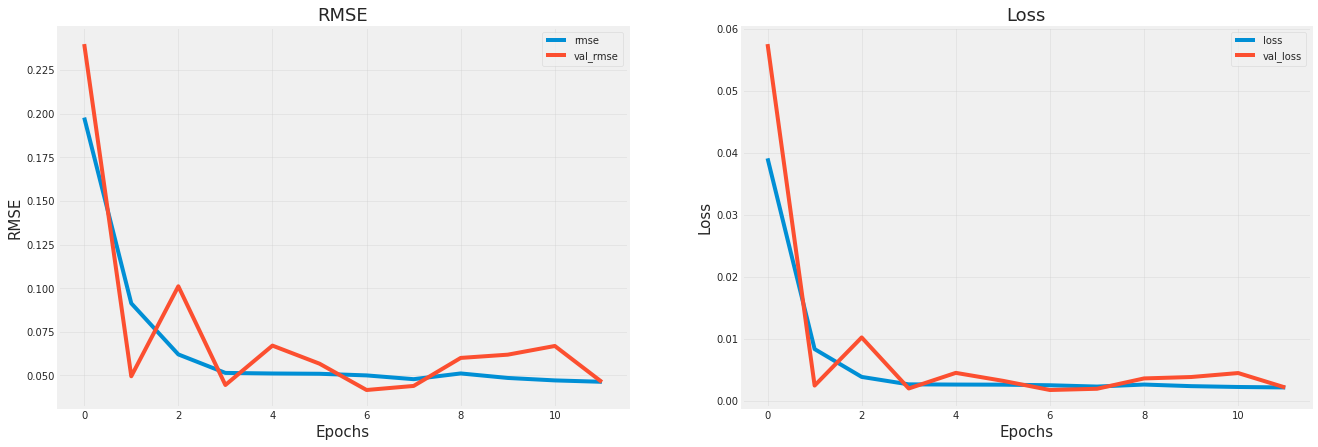

In [279]:
fig = plt.figure(figsize=(20,7))
fig.add_subplot(121)

# Accuracy
plt.plot(history.epoch, history.history['root_mean_squared_error'], label = "rmse")
plt.plot(history.epoch, history.history['val_root_mean_squared_error'], label = "val_rmse")

plt.title("RMSE", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

#Adding Subplot 1 (For Loss)
fig.add_subplot(122)

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()


In [280]:
results = regressor.evaluate(X_test, y_test)
print("test loss, test acc:", np.round(results, 4))

8/8 [==============================] - 0s 39ms/step - loss: 0.0023 - root_mean_squared_error: 0.0481
test loss, test acc: [0.0023 0.0481]


In [281]:
def LSTM_HyperParameter_Tuning(config, x_train, y_train, x_test, y_test):
    
    first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = config
    possible_combinations = list(itertools.product(first_additional_layer, second_additional_layer, third_additional_layer,
                                                  n_neurons, n_batch_size, dropout))
    
    print(possible_combinations)
    print('\n')
    
    hist = []
    for i in range(0, len(possible_combinations)):
        
        print(f'{i+1}th combination: \n')
        print('--------------------------------------------------------------------')
        
        first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = possible_combinations[i]
        
        # instantiating the model in the strategy scope creates the model on the TPU
        #with tpu_strategy.scope():
        regressor = Sequential()
        regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
        regressor.add(Dropout(dropout))
        if first_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if second_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if third_additional_layer:
            regressor.add(GRU(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        regressor.add(LSTM(units=n_neurons, return_sequences=False))
        regressor.add(Dropout(dropout))
        regressor.add(Dense(units=1, activation='relu'))
        regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
        '''''
        From the mentioned article above --> If a validation dataset is specified to the fit() function via the validation_data or v
        alidation_split arguments,then the loss on the validation dataset will be made available via the name “val_loss.”
        '''''

        file_path = 'best_model.h5'

        mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)
        '''''
        cb = Callback(...)  # First, callbacks must be instantiated.
        cb_list = [cb, ...]  # Then, one or more callbacks that you intend to use must be added to a Python list.
        model.fit(..., callbacks=cb_list)  # Finally, the list of callbacks is provided to the callback argument when fitting the model.
        '''''

        regressor.fit(x_train, y_train, validation_split=0.3, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)

        # load the best model
        # regressor = load_model('best_model.h5')

        train_accuracy = regressor.evaluate(x_train, y_train, verbose=0)
        test_accuracy = regressor.evaluate(x_test, y_test, verbose=0)
        hist.append(list((first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout,
                          train_accuracy, test_accuracy)))

        print(f'{str(i)}-th combination = {possible_combinations[i]} \n train accuracy: {train_accuracy} and test accuracy: {test_accuracy}')
        
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
         
    return hist

In [282]:
config = [[False], [False], [False], [64, 128], [32, 64, 128], [0.2]]  

# list of lists --> [[first_additional_layer], [second_additional_layer], [third_additional_layer], [n_neurons], [n_batch_size], [dropout]]

hist = LSTM_HyperParameter_Tuning(config, X_train, y_train, X_test, y_test)  # change x_train shape

[(False, False, False, 64, 32, 0.2), (False, False, False, 64, 64, 0.2), (False, False, False, 64, 128, 0.2), (False, False, False, 128, 32, 0.2), (False, False, False, 128, 64, 0.2), (False, False, False, 128, 128, 0.2)]


1th combination: 

--------------------------------------------------------------------

Epoch 1: val_loss improved from inf to 0.05108, saving model to best_model.h5

Epoch 2: val_loss improved from 0.05108 to 0.00354, saving model to best_model.h5

Epoch 3: val_loss improved from 0.00354 to 0.00222, saving model to best_model.h5

Epoch 4: val_loss did not improve from 0.00222

Epoch 5: val_loss did not improve from 0.00222

Epoch 6: val_loss did not improve from 0.00222

Epoch 7: val_loss did not improve from 0.00222

Epoch 8: val_loss improved from 0.00222 to 0.00190, saving model to best_model.h5

Epoch 9: val_loss did not improve from 0.00190

Epoch 10: val_loss did not improve from 0.00190

Epoch 11: val_loss did not improve from 0.00190

Epoch 12: val_loss im

In [283]:
hist = pd.DataFrame(hist)
hist = hist.sort_values(by=[7], ascending=True)
hist

0      1      2    3    4    5  \
4  False  False  False  128   64  0.2   
2  False  False  False   64  128  0.2   
1  False  False  False   64   64  0.2   
0  False  False  False   64   32  0.2   
5  False  False  False  128  128  0.2   
3  False  False  False  128   32  0.2   

                                               6  \
4    [0.0015508816577494144, 0.0393812358379364]   
2  [0.0020698360167443752, 0.045495450496673584]   
1   [0.0018406379967927933, 0.04290265589952469]   
0   [0.0013269538758322597, 0.03642737865447998]   
5   [0.001617206260561943, 0.040214501321315765]   
3  [0.0027177990414202213, 0.052132513374090195]   

                                              7  
4  [0.0023801461793482304, 0.04878674075007439]  
2   [0.002546638250350952, 0.05046422779560089]  
1  [0.0026183880399912596, 0.05117018520832062]  
0  [0.0026705204509198666, 0.05167707800865173]  
5  [0.0028587940614670515, 0.05346769094467163]  
3   [0.007962261326611042, 0.08923150599002838]

In [284]:
print(f'Best Combination: \n first_additional_layer = {hist.iloc[0, 0]}\n second_additional_layer = {hist.iloc[0, 1]}\n third_additional_layer = {hist.iloc[0, 2]}\n n_neurons = {hist.iloc[0, 3]}\n n_batch_size = {hist.iloc[0, 4]}\n dropout = {hist.iloc[0, 5]}')
print('**************************')
print(f'Results Before Tunning:\n Test Set RMSE: {np.round(results, 4)[1]}\n')
print(f'Results After Tunning:\n Test Set RMSE: {np.round(hist.iloc[0, -1], 4)[1]}\n')
print(f'{np.round((results[1] - hist.iloc[0, -1][1])*100/np.round(results, 4)[1])}% Improvement')

Best Combination: 
 first_additional_layer = False
 second_additional_layer = False
 third_additional_layer = False
 n_neurons = 128
 n_batch_size = 64
 dropout = 0.2
**************************
Results Before Tunning:
 Test Set RMSE: 0.0481

Results After Tunning:
 Test Set RMSE: 0.0488

-1.0% Improvement


In [285]:
first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = list(hist.iloc[0, :-2])

In [286]:
regressor = Sequential()
regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(dropout))

if first_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

if second_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

if third_additional_layer:
    regressor.add(GRU(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))
regressor.add(LSTM(units=n_neurons, return_sequences=False))
regressor.add(Dropout(dropout))
regressor.add(Dense(units=1, activation='relu'))
regressor.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

file_path = 'best_model.h5'

mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

regressor.fit(X_train, y_train, validation_split=0.3, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)


Epoch 1: val_loss improved from inf to 0.07074, saving model to best_model.h5

Epoch 2: val_loss improved from 0.07074 to 0.00218, saving model to best_model.h5

Epoch 3: val_loss did not improve from 0.00218

Epoch 4: val_loss did not improve from 0.00218

Epoch 5: val_loss improved from 0.00218 to 0.00168, saving model to best_model.h5

Epoch 6: val_loss did not improve from 0.00168

Epoch 7: val_loss did not improve from 0.00168

Epoch 8: val_loss did not improve from 0.00168

Epoch 9: val_loss did not improve from 0.00168

Epoch 10: val_loss did not improve from 0.00168
Epoch 10: early stopping


In [287]:
regressor.evaluate(X_test, y_test)


8/8 [==============================] - 0s 31ms/step - loss: 0.0019


0.001921238610520959

8/8 [==============================] - 1s 30ms/step


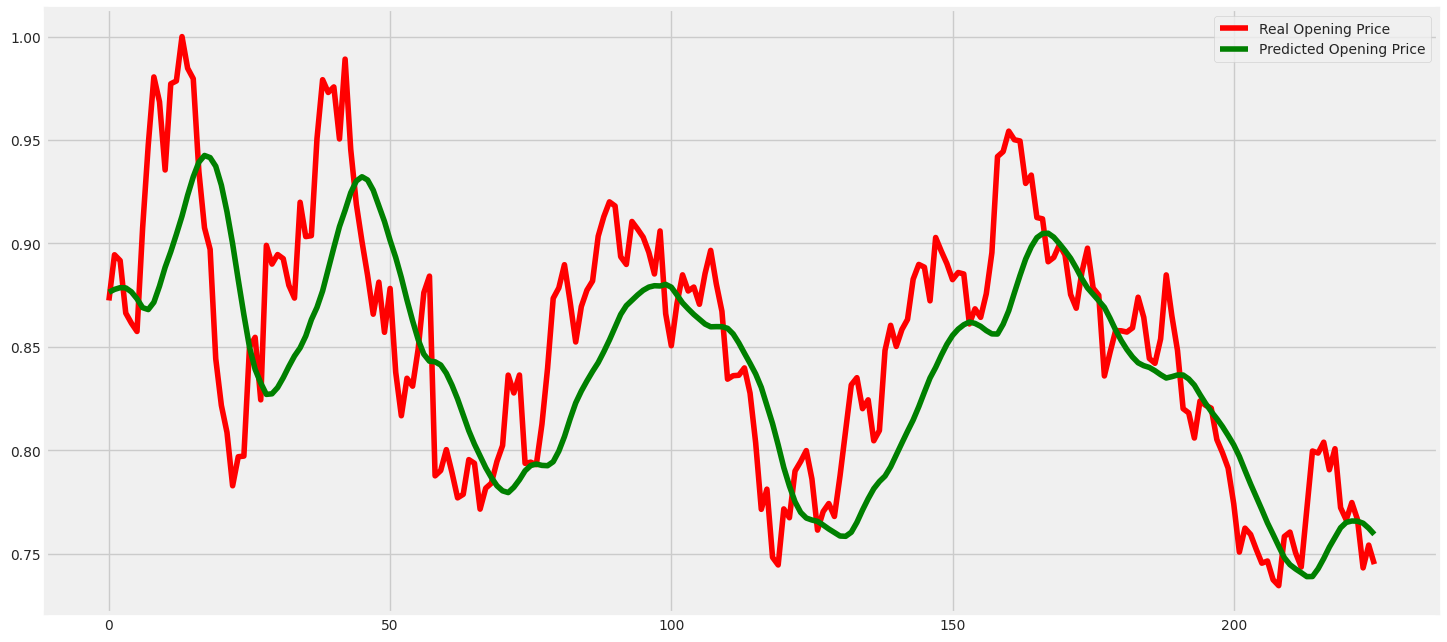

In [288]:
y_pred = regressor.predict(X_test)

plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(y_test, color='red', label = 'Real Opening Price')
plt.plot(y_pred, color='green', label = 'Predicted Opening Price')
plt.legend(loc='best')

## LSTM for Adanitrans

In [292]:
adanitrans.columns

Index(['Open', 'High', 'Low', 'Last', 'Close', 'Volume', 'Turnover', 'month',
       'week', 'day', 'day_of_week'],
      dtype='object')

In [294]:
abc=adanitrans.reset_index()
abc=abc.drop(["Date","Open","High","Low","Last","Turnover","month",'week', 'day', 'day_of_week'],axis=1)
# Feature Scaling
sc = MinMaxScaler(feature_range=(0, 1))
data_prices_scaled = sc.fit_transform(abc)
data_prices_scaled.shape


(973, 2)

In [295]:
# Creating a data structure (it does not work when you have only one feature)
def create_data(df, n_future, n_past, train_test_split_percentage, validation_split_percentage):
    n_feature = df.shape[1]
    x_data, y_data = [], []
    
    for i in range(n_past, len(df) - n_future + 1):
        x_data.append(df[i - n_past:i, 0:n_feature])
        y_data.append(df[i + n_future - 1:i + n_future, 0])
    
    split_training_test_starting_point = int(round(train_test_split_percentage*len(x_data)))
    split_train_validation_starting_point = int(round(split_training_test_starting_point*(1-validation_split_percentage)))
    
    x_train = x_data[:split_train_validation_starting_point]
    y_train = y_data[:split_train_validation_starting_point]
    # if you want to choose the validation set by yourself, uncomment the below code.
    x_val = x_data[split_train_validation_starting_point:split_training_test_starting_point]
    y_val =  x_data[split_train_validation_starting_point:split_training_test_starting_point]                                             
    
    x_test = x_data[split_training_test_starting_point:]
    y_test = y_data[split_training_test_starting_point:]
    
    return np.array(x_train), np.array(x_test), np.array(x_val), np.array(y_train), np.array(y_test), np.array(y_val)


In [296]:
# Number of days you want to predict into the future
# Number of past days you want to use to predict the future

X_train, X_test, X_val, y_train, y_test, y_val = create_data(data_prices_scaled, n_future=1, n_past=30, train_test_split_percentage=0.8,
                                               validation_split_percentage = 0)


print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(754, 30, 2)
(189, 30, 2)
(754, 1)
(189, 1)


In [297]:
# ------------------LSTM-----------------------
import tensorflow as tf

regressor = Sequential()
regressor.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=64, return_sequences=False))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1, activation='linear'))
regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

regressor.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 30, 128)           67072     
                                                                 
 dropout_32 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_33 (LSTM)              (None, 64)                49408     
                                                                 
 dropout_33 (Dropout)        (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 116,545
Trainable params: 116,545
Non-trainable params: 0
_________________________________________________________________


In [298]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
#mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit model
history = regressor.fit(X_train, y_train, validation_split=0.3, epochs=50, batch_size=64, callbacks=[es])

Epoch 1/50
9/9 [==============================] - 12s 456ms/step - loss: 2.0799e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0639 - val_root_mean_squared_error: 0.2528
Epoch 2/50
9/9 [==============================] - 3s 291ms/step - loss: 7.7832e-05 - root_mean_squared_error: 0.0088 - val_loss: 0.0347 - val_root_mean_squared_error: 0.1862
Epoch 3/50
9/9 [==============================] - 3s 357ms/step - loss: 4.6230e-05 - root_mean_squared_error: 0.0068 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0819
Epoch 4/50
9/9 [==============================] - 2s 227ms/step - loss: 3.1067e-05 - root_mean_squared_error: 0.0056 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0366
Epoch 5/50
9/9 [==============================] - 2s 233ms/step - loss: 3.2546e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0496
Epoch 6/50
9/9 [==============================] - 2s 207ms/step - loss: 2.5795e-05 - root_mean_squared_error: 0.0051 - val_loss: 

In [299]:
history.history.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

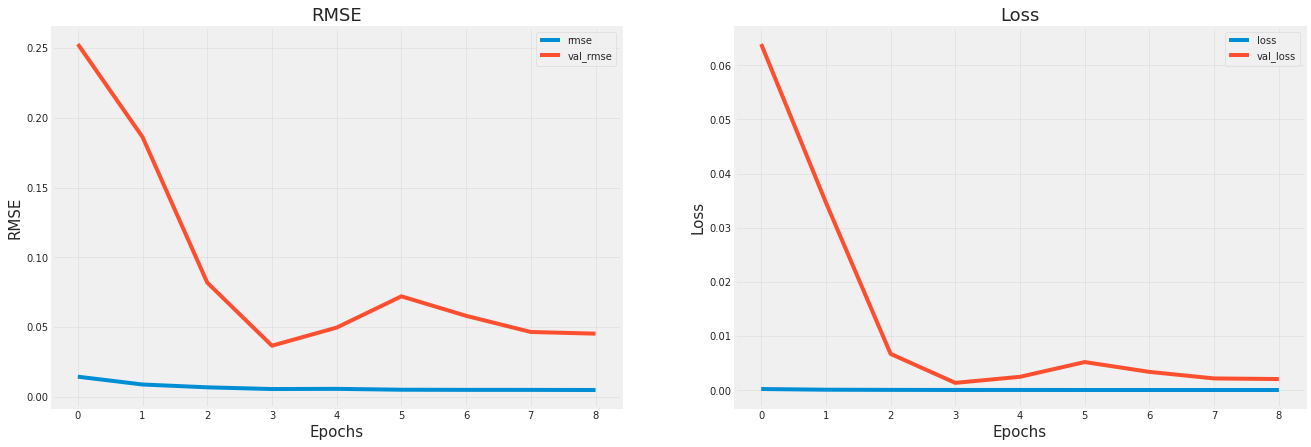

In [300]:
fig = plt.figure(figsize=(20,7))
fig.add_subplot(121)

# Accuracy
plt.plot(history.epoch, history.history['root_mean_squared_error'], label = "rmse")
plt.plot(history.epoch, history.history['val_root_mean_squared_error'], label = "val_rmse")

plt.title("RMSE", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

#Adding Subplot 1 (For Loss)
fig.add_subplot(122)

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.show()


In [301]:
results = regressor.evaluate(X_test, y_test)
print("test loss, test acc:", np.round(results, 4))

6/6 [==============================] - 0s 52ms/step - loss: 0.0073 - root_mean_squared_error: 0.0854
test loss, test acc: [0.0073 0.0854]


In [302]:
def LSTM_HyperParameter_Tuning(config, x_train, y_train, x_test, y_test):
    
    first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = config
    possible_combinations = list(itertools.product(first_additional_layer, second_additional_layer, third_additional_layer,
                                                  n_neurons, n_batch_size, dropout))
    
    print(possible_combinations)
    print('\n')
    
    hist = []
    for i in range(0, len(possible_combinations)):
        
        print(f'{i+1}th combination: \n')
        print('--------------------------------------------------------------------')
        
        first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = possible_combinations[i]
        
        # instantiating the model in the strategy scope creates the model on the TPU
        #with tpu_strategy.scope():
        regressor = Sequential()
        regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
        regressor.add(Dropout(dropout))
        if first_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if second_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if third_additional_layer:
            regressor.add(GRU(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        regressor.add(LSTM(units=n_neurons, return_sequences=False))
        regressor.add(Dropout(dropout))
        regressor.add(Dense(units=1, activation='relu'))
        regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
        '''''
        From the mentioned article above --> If a validation dataset is specified to the fit() function via the validation_data or v
        alidation_split arguments,then the loss on the validation dataset will be made available via the name “val_loss.”
        '''''

        file_path = 'best_model.h5'

        mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)
        '''''
        cb = Callback(...)  # First, callbacks must be instantiated.
        cb_list = [cb, ...]  # Then, one or more callbacks that you intend to use must be added to a Python list.
        model.fit(..., callbacks=cb_list)  # Finally, the list of callbacks is provided to the callback argument when fitting the model.
        '''''

        regressor.fit(x_train, y_train, validation_split=0.3, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)

        # load the best model
        # regressor = load_model('best_model.h5')

        train_accuracy = regressor.evaluate(x_train, y_train, verbose=0)
        test_accuracy = regressor.evaluate(x_test, y_test, verbose=0)
        hist.append(list((first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout,
                          train_accuracy, test_accuracy)))

        print(f'{str(i)}-th combination = {possible_combinations[i]} \n train accuracy: {train_accuracy} and test accuracy: {test_accuracy}')
        
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
        print('--------------------------------------------------------------------')
         
    return hist

In [303]:
config = [[False], [False], [False], [64, 128], [32, 64, 128], [0.2]]  

# list of lists --> [[first_additional_layer], [second_additional_layer], [third_additional_layer], [n_neurons], [n_batch_size], [dropout]]

hist = LSTM_HyperParameter_Tuning(config, X_train, y_train, X_test, y_test)  # change x_train shape

[(False, False, False, 64, 32, 0.2), (False, False, False, 64, 64, 0.2), (False, False, False, 64, 128, 0.2), (False, False, False, 128, 32, 0.2), (False, False, False, 128, 64, 0.2), (False, False, False, 128, 128, 0.2)]


1th combination: 

--------------------------------------------------------------------

Epoch 1: val_loss improved from inf to 0.06281, saving model to best_model.h5

Epoch 2: val_loss improved from 0.06281 to 0.01951, saving model to best_model.h5

Epoch 3: val_loss improved from 0.01951 to 0.00168, saving model to best_model.h5

Epoch 4: val_loss did not improve from 0.00168

Epoch 5: val_loss did not improve from 0.00168

Epoch 6: val_loss did not improve from 0.00168

Epoch 7: val_loss did not improve from 0.00168

Epoch 8: val_loss did not improve from 0.00168
Epoch 8: early stopping
0-th combination = (False, False, False, 64, 32, 0.2) 
 train accuracy: [0.0006861255969852209, 0.026193998754024506] and test accuracy: [0.008656333200633526, 0.09303941577672958

In [304]:
hist = pd.DataFrame(hist)
hist = hist.sort_values(by=[7], ascending=True)
hist

0      1      2    3    4    5  \
5  False  False  False  128  128  0.2   
4  False  False  False  128   64  0.2   
0  False  False  False   64   32  0.2   
3  False  False  False  128   32  0.2   
1  False  False  False   64   64  0.2   
2  False  False  False   64  128  0.2   

                                               6  \
5  [0.0003613456792663783, 0.019009094685316086]   
4     [0.000678325945045799, 0.0260446909815073]   
0  [0.0006861255969852209, 0.026193998754024506]   
3  [0.0008306796662509441, 0.028821513056755066]   
1  [0.0010638847015798092, 0.032617244869470596]   
2   [0.0013263578293845057, 0.03641919419169426]   

                                             7  
5   [0.00399946141988039, 0.06324129551649094]  
4   [0.008037295192480087, 0.0896509662270546]  
0  [0.008656333200633526, 0.09303941577672958]  
3  [0.010256879962980747, 0.10127625614404678]  
1  [0.011546988040208817, 0.10745691508054733]  
2  [0.017359290271997452, 0.13175466656684875]

In [305]:
print(f'Best Combination: \n first_additional_layer = {hist.iloc[0, 0]}\n second_additional_layer = {hist.iloc[0, 1]}\n third_additional_layer = {hist.iloc[0, 2]}\n n_neurons = {hist.iloc[0, 3]}\n n_batch_size = {hist.iloc[0, 4]}\n dropout = {hist.iloc[0, 5]}')
print('**************************')
print(f'Results Before Tunning:\n Test Set RMSE: {np.round(results, 4)[1]}\n')
print(f'Results After Tunning:\n Test Set RMSE: {np.round(hist.iloc[0, -1], 4)[1]}\n')
print(f'{np.round((results[1] - hist.iloc[0, -1][1])*100/np.round(results, 4)[1])}% Improvement')

Best Combination: 
 first_additional_layer = False
 second_additional_layer = False
 third_additional_layer = False
 n_neurons = 128
 n_batch_size = 128
 dropout = 0.2
**************************
Results Before Tunning:
 Test Set RMSE: 0.0854

Results After Tunning:
 Test Set RMSE: 0.0632

26.0% Improvement


In [306]:
first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = list(hist.iloc[0, :-2])

In [307]:
regressor = Sequential()
regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(dropout))

if first_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

if second_additional_layer:
    regressor.add(LSTM(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))

if third_additional_layer:
    regressor.add(GRU(units=n_neurons, return_sequences=True))
    regressor.add(Dropout(dropout))
regressor.add(LSTM(units=n_neurons, return_sequences=False))
regressor.add(Dropout(dropout))
regressor.add(Dense(units=1, activation='relu'))
regressor.compile(optimizer='adam', loss='mse')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

file_path = 'best_model.h5'

mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

regressor.fit(X_train, y_train, validation_split=0.3, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)


Epoch 1: val_loss improved from inf to 0.07037, saving model to best_model.h5

Epoch 2: val_loss improved from 0.07037 to 0.05377, saving model to best_model.h5

Epoch 3: val_loss improved from 0.05377 to 0.04971, saving model to best_model.h5

Epoch 4: val_loss improved from 0.04971 to 0.03102, saving model to best_model.h5

Epoch 5: val_loss improved from 0.03102 to 0.01611, saving model to best_model.h5

Epoch 6: val_loss improved from 0.01611 to 0.00375, saving model to best_model.h5

Epoch 7: val_loss improved from 0.00375 to 0.00124, saving model to best_model.h5

Epoch 8: val_loss did not improve from 0.00124

Epoch 9: val_loss did not improve from 0.00124

Epoch 10: val_loss did not improve from 0.00124

Epoch 11: val_loss did not improve from 0.00124

Epoch 12: val_loss did not improve from 0.00124
Epoch 12: early stopping


In [308]:
regressor.evaluate(X_test, y_test)


6/6 [==============================] - 0s 35ms/step - loss: 0.0192


0.019159948453307152

6/6 [==============================] - 2s 86ms/step


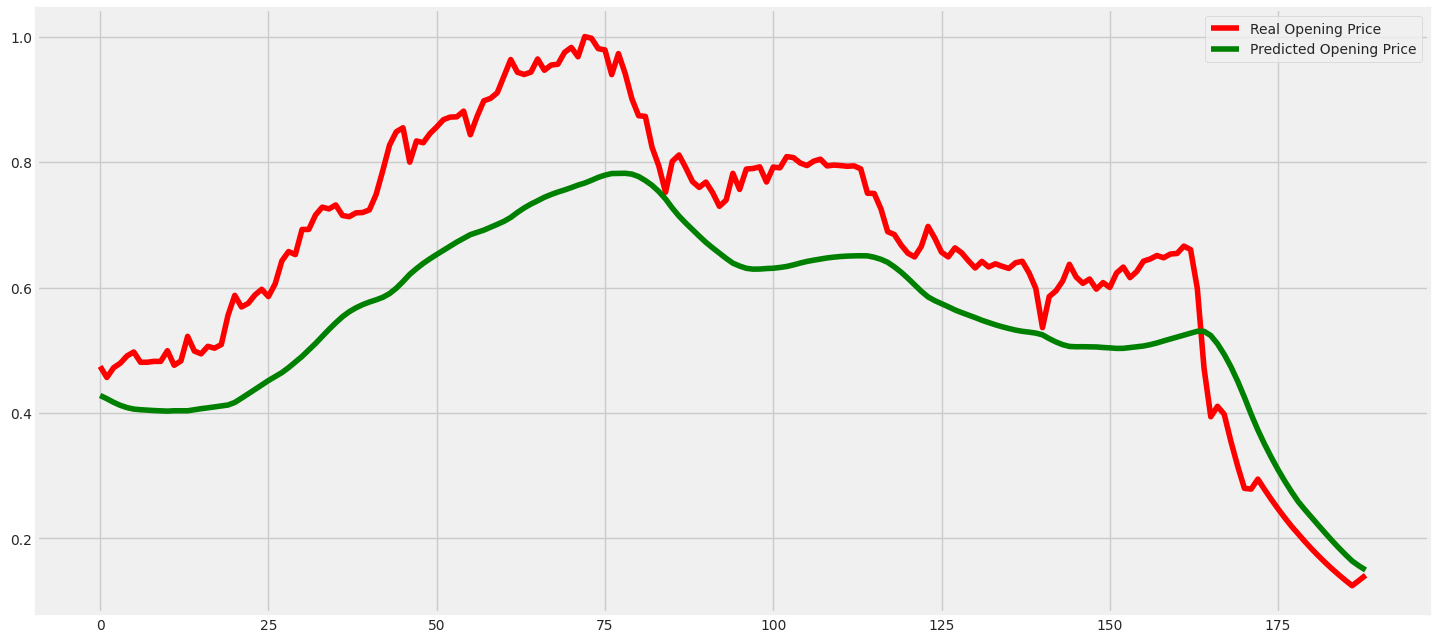

In [309]:
y_pred = regressor.predict(X_test)

plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(y_test, color='red', label = 'Real Opening Price')
plt.plot(y_pred, color='green', label = 'Predicted Opening Price')
plt.legend(loc='best')

# FBPROPHET MODEL
## Fbprophet model for ADANIGREEN

In [315]:
#web scraping of Adanigreen
symbol = "ADANIGREEN"
start = date(2018, 7, 2)
end = date(2023, 3, 2)
adanigreen = get_history(symbol=symbol, start=start, end=end)

#web scraping of ADANITRANS
symbol = "ADANITRANS"
start = date(2018, 7, 2)
end = date(2023, 3, 2)
adanitrans = get_history(symbol=symbol, start=start, end=end)

#web scraping of RELIANCE
symbol = "RELIANCE"
start = date(2018, 7, 2)
end = date(2023, 3, 2)
reliance = get_history(symbol=symbol, start=start, end=end)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu72o57r0/f4ujzjxv.json


Training data size : (874, 17)
Testing data size : (219, 17)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpu72o57r0/5amiredz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32113', 'data', 'file=/tmp/tmpu72o57r0/f4ujzjxv.json', 'init=/tmp/tmpu72o57r0/5amiredz.json', 'output', 'file=/tmp/tmpu72o57r0/prophet_model1inlkgz9/prophet_model-20230322181844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:18:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:18:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


17966.263378995434
Accuracy of the model is : 93.13329718824134


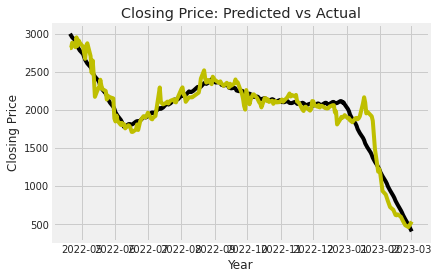

In [316]:
df_adanigreen=adanigreen.reset_index()

df_adanigreen[["ds","y"]]=df_adanigreen[["Date","Close"]]

train_set_adanigreen, test_set_adanigreen= np.split(df_adanigreen, [int(.8 *len(df_adanigreen))])
print(f'Training data size : {train_set_adanigreen.shape}')
print(f'Testing data size : {test_set_adanigreen.shape}')

from sklearn.metrics import mean_squared_error,accuracy_score

model=Prophet(growth="linear",daily_seasonality=True,seasonality_mode="multiplicative")
model.fit(test_set_adanigreen)
y_actual=test_set_adanigreen["y"]
prediction=model.predict(pd.DataFrame({"ds":test_set_adanigreen["ds"]}))
y_predicted=prediction["yhat"]
y_predicted=y_predicted.astype(int)
print(mean_squared_error(y_actual,y_predicted))


from sklearn.metrics import r2_score
r2_score(y_actual,y_predicted)
print("Accuracy of the model is :",100*r2_score(y_actual,y_predicted))

plt.plot(test_set_adanigreen['ds'], y_predicted, 'k')
plt.plot(test_set_adanigreen['ds'], y_actual, 'y')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Closing Price: Predicted vs Actual")
plt.show()

In [317]:
model = Prophet()                                                               
model.fit(df_adanigreen)                                              
future = model.make_future_dataframe(365)
forecast = model.predict(future)  
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(365)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu72o57r0/bxuyhy7h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu72o57r0/ofcqdkl4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2987', 'data', 'file=/tmp/tmpu72o57r0/bxuyhy7h.json', 'init=/tmp/tmpu72o57r0/ofcqdkl4.json', 'output', 'file=/tmp/tmpu72o57r0/prophet_modelujx9wv9m/prophet_model-20230322181858.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:18:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:18:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper
1093 2023-03-03  1404.261139  1172.584786  1616.655411
1094 2023-03-04  1495.138640  1260.431547  1716.459189
1095 2023-03-05  1394.326931  1160.227554  1620.930312
1096 2023-03-06  1422.865752  1197.777771  1659.782210
1097 2023-03-07  1430.641224  1201.704974  1675.717930
...         ...          ...          ...          ...
1453 2024-02-26   412.677114  -299.423662  1165.043469
1454 2024-02-27   422.128507  -299.400440  1143.495790
1455 2024-02-28   425.021408  -269.717742  1154.290553
1456 2024-02-29   432.298508  -318.308586  1203.660096
1457 2024-03-01   445.298136  -312.478912  1138.836502

[365 rows x 4 columns]

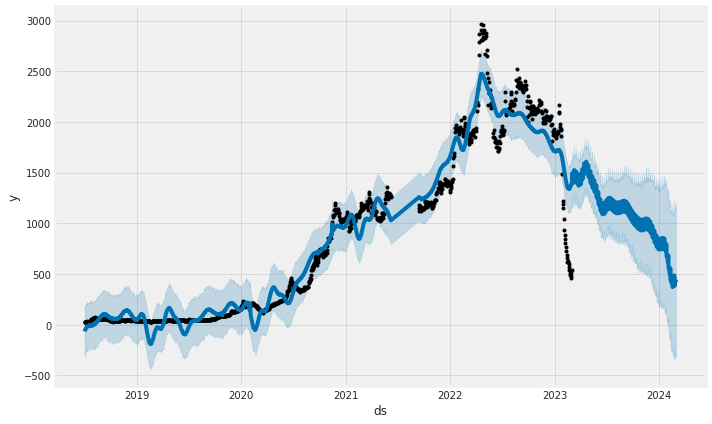

In [318]:
model.plot(forecast)
plt.show()   

## Fbprophet  model for Reliance

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu72o57r0/q28a6er2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu72o57r0/stzz2qsf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37289', 'data', 'file=/tmp/tmpu72o57r0/q28a6er2.json', 'init=/tmp/tmpu72o57r0/stzz2qsf.json', 'output', 'file=/tmp/tmpu72o57r0/prophet_model_41dy9rz/prophet_model-20230322182611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:26:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training data size : (926, 17)
Testing data size : (232, 17)


18:26:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


1990.7488469827588
Accuracy of the model is : 85.61818200748756


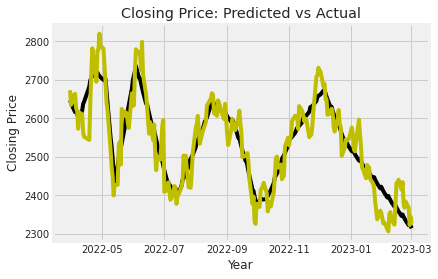

In [320]:
df_reliance=reliance.reset_index()

df_reliance[["ds","y"]]=df_reliance[["Date","Close"]]

train_set_reliance, test_set_reliance= np.split(df_reliance, [int(.8 *len(df_reliance))])
print(f'Training data size : {train_set_reliance.shape}')
print(f'Testing data size : {test_set_reliance.shape}')

model=Prophet(growth="linear",daily_seasonality=True,seasonality_mode="multiplicative")
model.fit(test_set_reliance)
y_actual=test_set_reliance["y"]
prediction=model.predict(pd.DataFrame({"ds":test_set_reliance["ds"]}))
y_predicted=prediction["yhat"]
y_predicted=y_predicted.astype(int)
print(mean_squared_error(y_actual,y_predicted))

from sklearn.metrics import r2_score
r2_score(y_actual,y_predicted)
print("Accuracy of the model is :",100*r2_score(y_actual,y_predicted))

plt.plot(test_set_reliance['ds'], y_predicted, 'k')
plt.plot(test_set_reliance['ds'], y_actual, 'y')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Closing Price: Predicted vs Actual")
plt.show()

In [321]:
model = Prophet()                                                               
model.fit(df_reliance)                                              
future = model.make_future_dataframe(365)
forecast = model.predict(future)  
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(365)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu72o57r0/ik5a8cu6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu72o57r0/5p5tuz16.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77551', 'data', 'file=/tmp/tmpu72o57r0/ik5a8cu6.json', 'init=/tmp/tmpu72o57r0/5p5tuz16.json', 'output', 'file=/tmp/tmpu72o57r0/prophet_model9uli0vua/prophet_model-20230322182633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:26:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:26:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper
1158 2023-03-03  2379.188920  2230.599640  2533.074214
1159 2023-03-04  2356.991281  2214.907694  2508.716847
1160 2023-03-05  2386.822737  2234.086908  2536.823765
1161 2023-03-06  2362.869112  2213.336893  2507.218375
1162 2023-03-07  2364.513686  2214.389946  2503.978296
...         ...          ...          ...          ...
1518 2024-02-26  2258.506328  1821.753703  2696.116659
1519 2024-02-27  2260.651235  1796.842761  2710.837142
1520 2024-02-28  2256.164048  1793.554088  2714.559360
1521 2024-02-29  2250.719885  1770.553419  2670.622967
1522 2024-03-01  2243.797309  1786.756985  2681.500265

[365 rows x 4 columns]

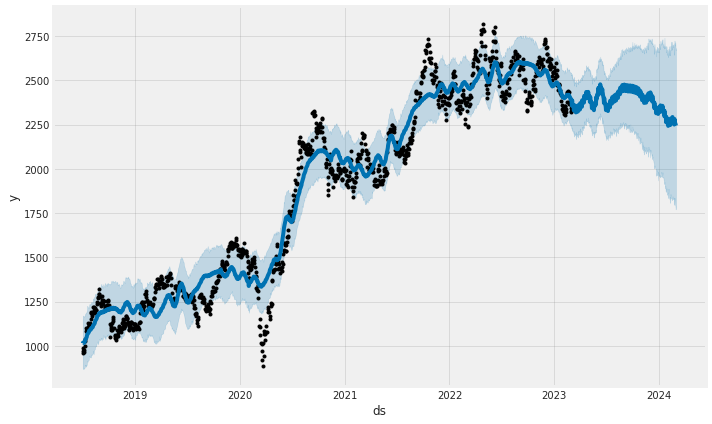

In [322]:
model.plot(forecast)
plt.show()   

## Fbprophet for ADANITRANS

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu72o57r0/y1_tvkoq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu72o57r0/x23mrq2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20624', 'data', 'file=/tmp/tmpu72o57r0/y1_tvkoq.json', 'init=/tmp/tmpu72o57r0/x23mrq2c.json', 'output', 'file=/tmp/tmpu72o57r0/prophet_model_3imei51/prophet_model-20230322182731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:27:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training data size : (778, 17)
Testing data size : (195, 17)


18:27:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


20772.998794871794
Accuracy of the model is : 96.95973414902888


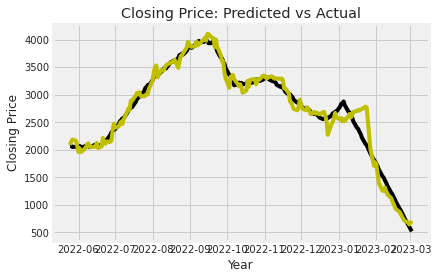

In [323]:
df_adanitrans=adanitrans.reset_index()

df_adanitrans[["ds","y"]]=df_adanitrans[["Date","Close"]]

train_set_adanitrans, test_set_adanitrans= np.split(df_adanitrans, [int(.8 *len(df_adanitrans))])
print(f'Training data size : {train_set_adanitrans.shape}')
print(f'Testing data size : {test_set_adanitrans.shape}')

model=Prophet(growth="linear",daily_seasonality=True,seasonality_mode="multiplicative")
model.fit(test_set_adanitrans)
y_actual=test_set_adanitrans["y"]
prediction=model.predict(pd.DataFrame({"ds":test_set_adanitrans["ds"]}))
y_predicted=prediction["yhat"]
y_predicted=y_predicted.astype(int)
print(mean_squared_error(y_actual,y_predicted))

from sklearn.metrics import r2_score
r2_score(y_actual,y_predicted)
print("Accuracy of the model is :",100*r2_score(y_actual,y_predicted))

plt.plot(test_set_adanitrans['ds'], y_predicted, 'k')
plt.plot(test_set_adanitrans['ds'], y_actual, 'y')
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Closing Price: Predicted vs Actual")
plt.show()

In [324]:
model = Prophet()                                                               
model.fit(df_adanitrans)                                              
future = model.make_future_dataframe(365)
forecast = model.predict(future)  
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(365)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu72o57r0/8384dak4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu72o57r0/z4u2lrp4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58203', 'data', 'file=/tmp/tmpu72o57r0/8384dak4.json', 'init=/tmp/tmpu72o57r0/z4u2lrp4.json', 'output', 'file=/tmp/tmpu72o57r0/prophet_modelf7lv9bng/prophet_model-20230322182749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:27:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:27:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper
973  2023-03-03  2186.512968  1777.067464  2582.570680
974  2023-03-04  2250.032791  1866.036334  2638.699411
975  2023-03-05  2047.221888  1663.938777  2406.740222
976  2023-03-06  2243.911693  1839.463947  2639.811483
977  2023-03-07  2263.914298  1898.364514  2670.072642
...         ...          ...          ...          ...
1333 2024-02-26  1658.826840  1137.244785  2222.303474
1334 2024-02-27  1676.070669  1156.952158  2235.190957
1335 2024-02-28  1682.003584  1176.531057  2270.444343
1336 2024-02-29  1715.082538  1178.011349  2299.849427
1337 2024-03-01  1728.552217  1217.148199  2309.297201

[365 rows x 4 columns]

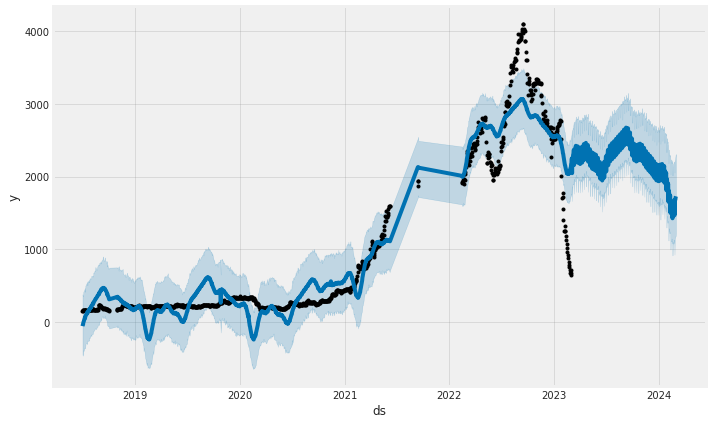

In [325]:
model.plot(forecast)
plt.show()   